Name : Sara Khosravi

Student ID: 97101586

**Important Note**

**If any of the models in Training models section does not reach the printed accuracy, please run the predicting Models section ( all of it cells) once again. I dont know wht some problems seldom happen but by this way it will be correct.**

Resources:

https://www.kite.com/python/answers/how-to-delete-columns-from-a-pandas-%60dataframe%60-by-index-in-python#:~:text=drop()%20to%20delete%20columns,with%20labels%20set%20to%20pd.

https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/

https://en.wikipedia.org/wiki/F-score

https://towardsdatascience.com/a-6-step-field-guide-for-building-machine-learning-projects-6e4554f6e3a1

https://medium.com/@srimalashish/why-eda-is-necessary-for-machine-learning-233b6e4d5083

https://www.forbes.com/sites/brentdykes/2016/03/31/data-storytelling-the-essential-data-science-skill-everyone-needs/

https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114

https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

https://towardsdatascience.com/4-methods-for-adding-columns-to-pandas-dataframes-dd0696863c16

https://www.marsja.se/how-to-get-the-column-names-from-a-pandas-dataframe-print-and-list/#:~:text=To%20access%20the%20names%20of,columns%20of%20the%20Pandas%20dataframe.

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

https://blog.paperspace.com/adaboost-optimizer/

https://medium.com/@ruhi3929/bagging-and-boosting-method-c036236376eb

https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781788397872/1/ch01lvl1sec27/pros-and-cons-of-neural-networks

https://dhirajkumarblog.medium.com/top-4-advantages-and-disadvantages-of-support-vector-machine-or-svm-a3c06a2b107

https://www.fromthegenesis.com/pros-and-cons-of-k-nearest-neighbors/


In [793]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression   
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
import operator
import warnings                                            
warnings.filterwarnings('ignore') 
%matplotlib inline
sns.set()

In [864]:
data = pd.read_excel('ICUfinal.xlsx')
data.head()

Unnamed: 0  PATIENT_VISIT_IDENTIFIER  ...                           tags ICU
0           0                         0  ...  Motor Neurone Disease, Smoker   0
1           1                         0  ...  Motor Neurone Disease, Smoker   0
2           2                         0  ...  Motor Neurone Disease, Smoker   0
3           3                         0  ...  Motor Neurone Disease, Smoker   0
4           4                         0  ...  Motor Neurone Disease, Smoker   1

[5 rows x 227 columns]

# Preprocessing

In [ ]:
data.shape

(1925, 227)

In [ ]:
data.info

<bound method DataFrame.info of       AGE_ABOVE65 AGE_PERCENTIL  GENDER  HTN  IMMUNOCOMPROMISED  OTHER  \
0               1          60th       0  0.0                0.0    1.0   
1               1          60th       0  0.0                0.0    1.0   
2               1          60th       0  0.0                0.0    1.0   
3               1          60th       0  0.0                0.0    1.0   
4               1          60th       0  0.0                0.0    1.0   
5               1          90th       1  1.0                1.0    1.0   
6               1          90th       1  1.0                1.0    1.0   
7               1          90th       1  1.0                1.0    1.0   
8               1          90th       1  1.0                1.0    1.0   
9               1          90th       1  1.0                1.0    1.0   
10              0          10th       0  0.0                0.0    1.0   
11              0          10th       0  0.0                0.0    1.0   
12    

As we can see below, there are many null data in the dataset that should be replaced with values.

In [865]:
number_of_datum=data.shape[0]
null_percentage = [round(data[x].isnull().sum()/number_of_datum,3) for x in list(data.columns.tolist())]
print(null_percentage)
print()

[0.0, 0.0, 0.0, 0.0, 0.0, 0.003, 0.003, 0.003, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0.574, 0

In [866]:
#Let us first obtain some general information about the dataset, for example twhich columns are numerical
numerical_data = data.select_dtypes(exclude=['object'])
print(numerical_data.isna().sum())


Unnamed: 0                      0
PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
GENDER                          0
HTN                             5
                             ... 
HEART_RATE_DIFF_REL           685
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
ICU                             0
Length: 224, dtype: int64


In [867]:
numerical_data.info

<bound method DataFrame.info of       Unnamed: 0  PATIENT_VISIT_IDENTIFIER  ...  OXYGEN_SATURATION_DIFF_REL  ICU
0              0                         0  ...                   -1.000000    0
1              1                         0  ...                   -1.000000    0
2              2                         0  ...                         NaN    0
3              3                         0  ...                   -1.000000    0
4              4                         0  ...                   -0.814433    1
...          ...                       ...  ...                         ...  ...
1920        1920                       384  ...                   -1.000000    0
1921        1921                       384  ...                   -1.000000    0
1922        1922                       384  ...                   -1.000000    0
1923        1923                       384  ...                   -1.000000    0
1924        1924                       384  ...                   -0.835052  

In [868]:
# now lets gain some information about the numerical columns, such as mean , min , max and variance
numerical_data.describe().loc[["mean", "min", "max", "std"]]

Unnamed: 0  ...       ICU
mean   962.000000  ...  0.267532
min      0.000000  ...  0.000000
max   1924.000000  ...  1.000000
std    555.843953  ...  0.442787

[4 rows x 224 columns]

In [869]:
#Unique items of each feature
number_of_unique_items=[len(pd.unique(data[x])) for x in list(data.columns.tolist())]
print(number_of_unique_items)

[1925, 385, 2, 10, 2, 3, 3, 3, 33, 33, 33, 33, 2, 57, 57, 57, 57, 2, 64, 64, 64, 64, 2, 27, 27, 27, 27, 2, 27, 27, 27, 27, 2, 96, 96, 96, 96, 2, 9, 9, 9, 9, 2, 49, 49, 49, 49, 2, 159, 159, 159, 159, 2, 120, 120, 120, 120, 2, 176, 176, 176, 176, 2, 83, 83, 83, 83, 2, 236, 236, 236, 236, 2, 118, 118, 118, 118, 2, 29, 29, 29, 29, 2, 148, 148, 148, 148, 2, 527, 527, 527, 527, 2, 273, 273, 273, 273, 2, 493, 493, 493, 493, 2, 76, 76, 76, 76, 2, 75, 75, 75, 75, 2, 35, 35, 35, 35, 2, 43, 43, 43, 43, 2, 484, 484, 484, 484, 2, 36, 36, 36, 36, 2, 41, 41, 41, 41, 2, 324, 324, 324, 324, 2, 40, 40, 40, 40, 2, 27, 27, 27, 27, 2, 78, 78, 78, 78, 2, 34, 34, 34, 34, 2, 101, 101, 101, 101, 2, 131, 131, 131, 131, 2, 86, 86, 86, 86, 2, 113, 113, 113, 113, 2, 369, 369, 369, 369, 2, 543, 605, 587, 459, 571, 456, 92, 134, 122, 41, 87, 29, 85, 128, 96, 29, 62, 54, 91, 136, 111, 35, 56, 21, 91, 129, 102, 36, 92, 55, 424, 502, 531, 201, 499, 188, 5, 30, 2]


In [870]:
# Information about categorical columns, such as numm rows and unique ones
categorical_data = data.select_dtypes(include=['object']) 
print(categorical_data.isna().sum(), "\n")
print(categorical_data.nunique())

AGE_PERCENTIL       0
WINDOW              0
tags             1415
dtype: int64 

AGE_PERCENTIL    10
WINDOW            5
tags             29
dtype: int64


In [871]:
#First we remove the null values from numerical data in order to prevent numerical errors or bias
numerical_data = numerical_data.fillna(data.mean())
numerical_data.isnull().sum()

Unnamed: 0                    0
PATIENT_VISIT_IDENTIFIER      0
AGE_ABOVE65                   0
GENDER                        0
HTN                           0
                             ..
HEART_RATE_DIFF_REL           0
RESPIRATORY_RATE_DIFF_REL     0
TEMPERATURE_DIFF_REL          0
OXYGEN_SATURATION_DIFF_REL    0
ICU                           0
Length: 224, dtype: int64

In [ ]:
numerical_data.info

<bound method DataFrame.info of       Unnamed: 0  PATIENT_VISIT_IDENTIFIER  ...  OXYGEN_SATURATION_DIFF_REL  ICU
0              0                         0  ...                   -1.000000    0
1              1                         0  ...                   -1.000000    0
2              2                         0  ...                   -0.886982    0
3              3                         0  ...                   -1.000000    0
4              4                         0  ...                   -0.814433    1
...          ...                       ...  ...                         ...  ...
1920        1920                       384  ...                   -1.000000    0
1921        1921                       384  ...                   -1.000000    0
1922        1922                       384  ...                   -1.000000    0
1923        1923                       384  ...                   -1.000000    0
1924        1924                       384  ...                   -0.835052  

As you can compare the two times that I used info function, the null values are rplaced with mean of the deature.

In [872]:
#making all the data numerical in order to prepare it for machine to understand
# Converting categorical data to numerical data
#for window column, which shows when the patient was arrived to th hospital, we can simply sort values 
sorted_df = sorted(categorical_data['WINDOW'].unique())
df = [i for i in range(len(sorted_df))]
categorical_data['WINDOW'].replace(sorted_df, df, inplace=True)
# It is enough to just sort the values in AGE_PERCENTIL column
categorical_data = categorical_data.fillna('no-info')
sorted_df = sorted(categorical_data['AGE_PERCENTIL'].unique())
df = [x for x in range(len(sorted_df))]
categorical_data['AGE_PERCENTIL'].replace(sorted_df, df, inplace=True)

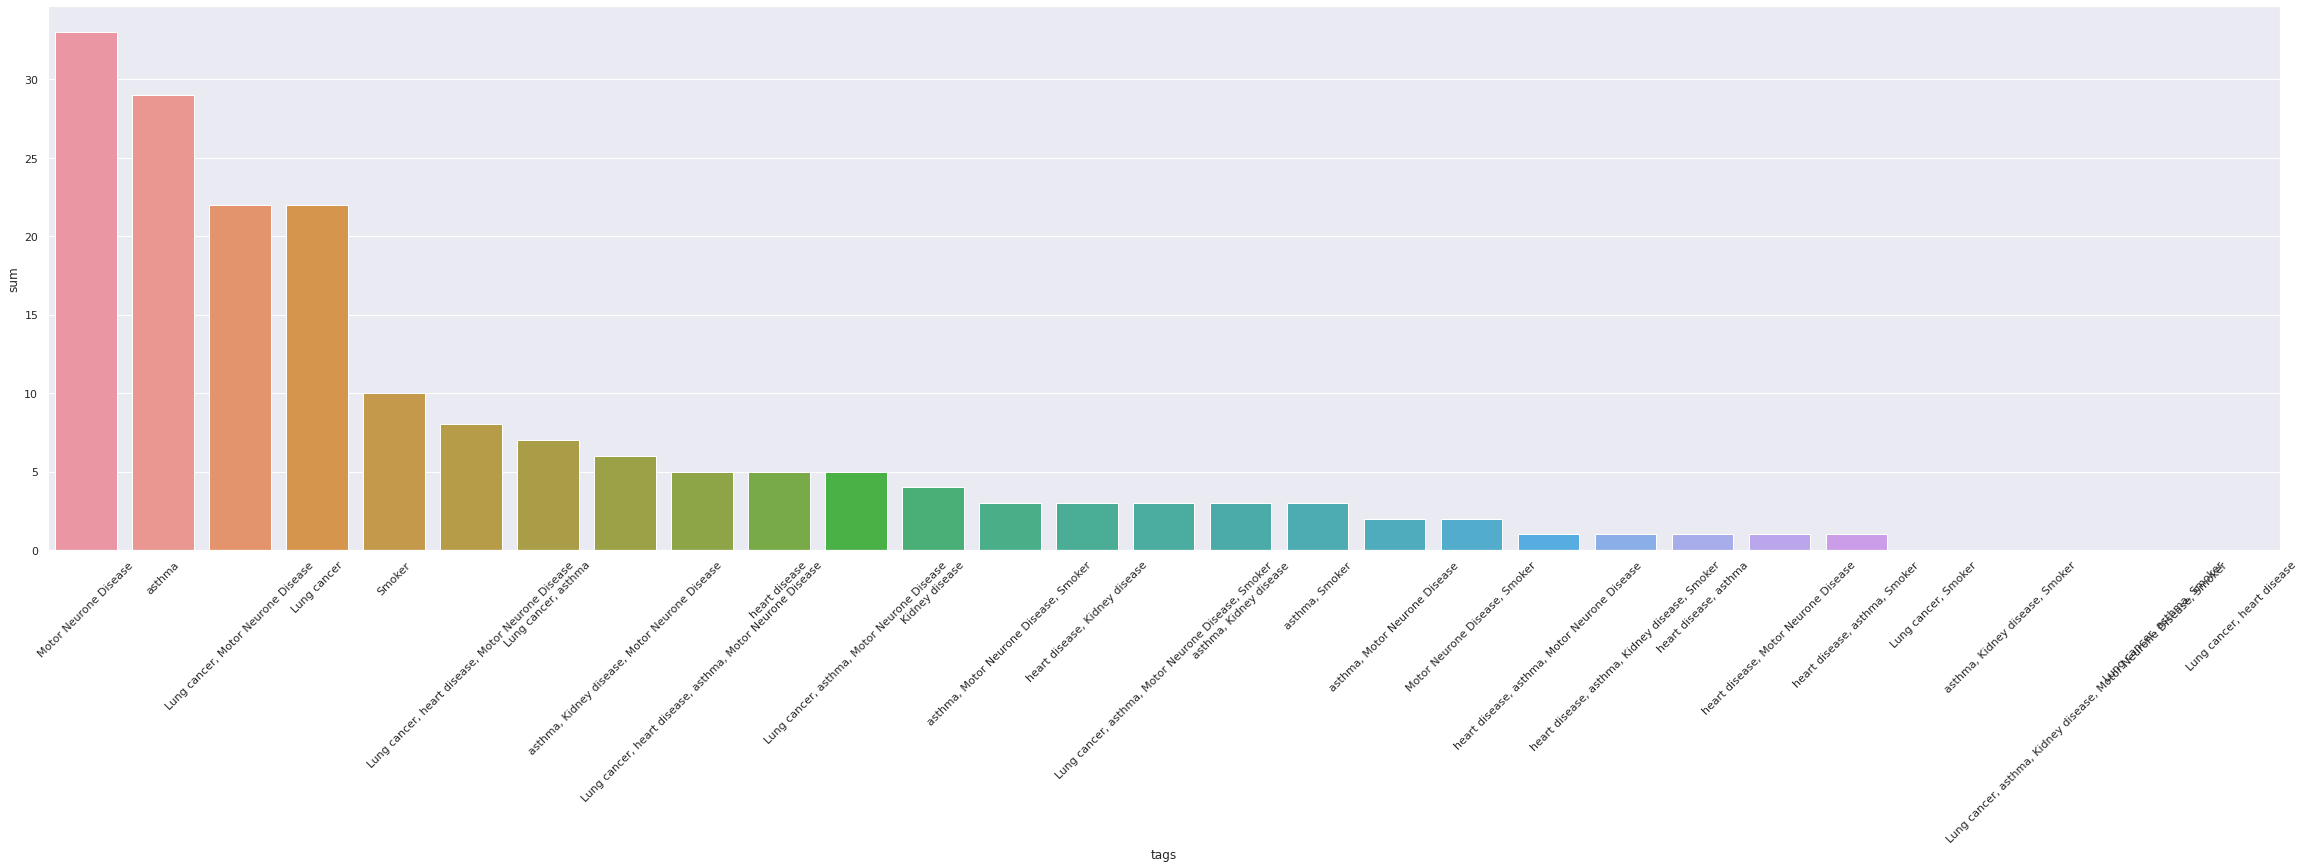

In [873]:
tag = data.groupby('tags')['ICU'].agg([np.sum, np.mean]).reset_index()
data_tag = tag.sort_values('sum', ascending=False)
data_tag.head()
plt.figure(figsize=(40, 10))
ax = sns.barplot(data=data_tag[:40], x='tags', y='sum')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

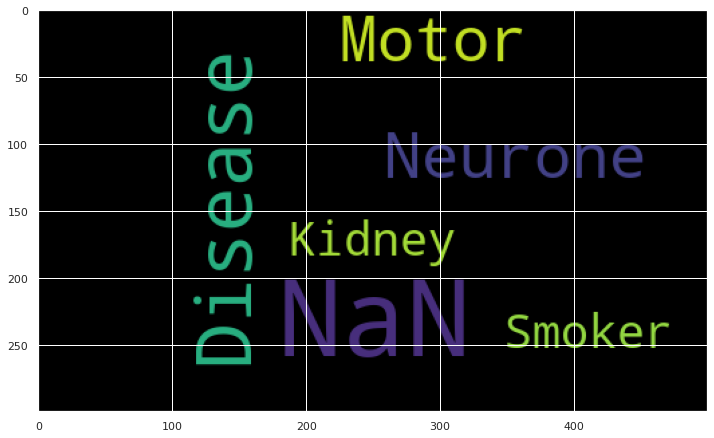

In [202]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud(background_color='black', stopwords = STOPWORDS,max_words = 6, max_font_size = 80,  random_state = 3, width =500, height= 300)
plt.figure(figsize=(12, 10))
wordcloud.generate(str(data.loc[data['ICU'] == 1 , 'tags']))
plt.imshow(wordcloud);

The above Cloud doesnot help that much but shows us the most common deases lead to ICU.

Note: The above plot makes sense when not encode data with onehot encoder so I plot here and agein I will tell about it in the EDA.

In [878]:
# # We can use one-hot encoding when data are not related to each other can
# #here we use one hot encoding for tag colmun
# #We drop no info columns
encoder = OneHotEncoder()
encoder_fit = encoder.fit_transform(categorical_data[["tags"]])
df = pd.DataFrame(encoder_fit.toarray(), columns=encoder.categories_).head()
df.drop('no-info', axis='columns', inplace=True)
categorical_data = pd.concat([categorical_data, df], axis=1)
# Boolean tags shows whether someone has a tag or not
categorical_data['boolean_tags'] = categorical_data['tags']
sorted_df = sorted(categorical_data['tags'].unique())
df1 = [1 if sorted_df[i] != 'no-info' else 0 for i in range(len(sorted_df))]
categorical_data['boolean_tags'].replace(sorted_df, df1, inplace=True)
ord_enc = OrdinalEncoder()
categorical_data['tags'] = ord_enc.fit_transform(categorical_data[["tags"]])
categorical_data.head()

Note: The above cell has drop so it must be run just once.

In [879]:
data = data.fillna(data.mean())
data.isnull().sum()

Unnamed: 0                       0
PATIENT_VISIT_IDENTIFIER         0
AGE_ABOVE65                      0
AGE_PERCENTIL                    0
GENDER                           0
                              ... 
TEMPERATURE_DIFF_REL             0
OXYGEN_SATURATION_DIFF_REL       0
WINDOW                           0
tags                          1415
ICU                              0
Length: 227, dtype: int64

As we can see the dataset has too many features and most of them are not really informative and can be removed

In [880]:
data = pd.concat([numerical_data, categorical_data], axis=1)
data.head()

Unnamed: 0  ...  boolean_tags
0           0  ...             1
1           1  ...             1
2           2  ...             1
3           3  ...             1
4           4  ...             1

[5 rows x 257 columns]

In [881]:
y = data["ICU"]
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: ICU, Length: 1925, dtype: int64


preprocessing is finished and all the data are now numerical and all the Nans are replaced.

# EDA

One import thing that we can understand intuitevely is that some columns are more important than the others and 
they should be treated in other way as an example, the oxygen level of blood is important because if a persons oxygen level is low, then he/she may need ICU with higher probability, so we observe all oxygen related columns

In [206]:
icu = data[data["ICU"]==1]
not_icu = data[data["ICU"]==0]
columns_names = {'k': ["OXYGEN_SATURATION_MEAN", "OXYGEN_SATURATION_MEDIAN"  , "OXYGEN_SATURATION_MIN" , "OXYGEN_SATURATION_MAX", "OXYGEN_SATURATION_DIFF" , "OXYGEN_SATURATION_DIFF_REL"]}
for k in columns_names['k']:
    print(k , round(icu[k].mean(), 3) , round(not_icu[k].mean(), 3))

OXYGEN_SATURATION_MEAN 0.744 0.743
OXYGEN_SATURATION_MEDIAN 0.751 0.748
OXYGEN_SATURATION_MIN 0.744 0.845
OXYGEN_SATURATION_MAX 0.858 0.804
OXYGEN_SATURATION_DIFF -0.798 -0.92
OXYGEN_SATURATION_DIFF_REL -0.798 -0.92


The column OXYGEN_SATURATION_MIN is only like it should be, because in this column the oxygen level is
less for ICU patients than other patients , as guessed. We will plot this later.

The other features that its difference can be seen between ICU needed people and others can be OXYGEN_SATURATION_MAX. 
It is more for ICU needed people and can be a candidate for feature selection, we will discuss it more in the 
following sections.

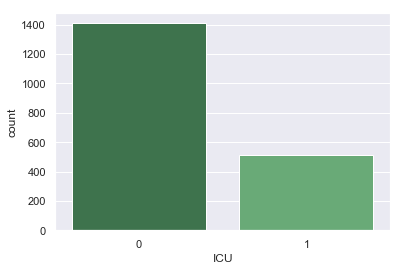

In [ ]:
sns.countplot(x=data["ICU"], palette='Greens_d');

As we can observe in the above count plot, most of the patients need ICU so it is important to predict the need to ICU as early as possible.

We draw the plot of ICU and not ICU based on the features that we assume are imortant and informative to compare the effect of them and know learn the model with whcich features.

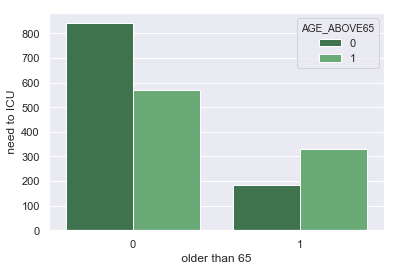

In [ ]:
nemoodar = sns.countplot(x=data["ICU"], hue=data["AGE_ABOVE65"], data=pd.melt(data), palette='Greens_d');
nemoodar.set(xlabel=" older than 65 ", ylabel=" need to ICU ");

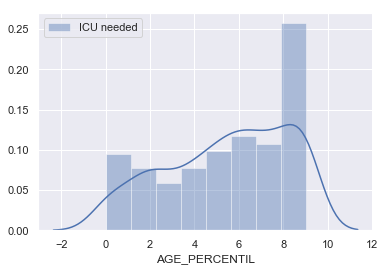

In [ ]:
heart_rate=data[data["ICU"]==1]['AGE_PERCENTIL']
sns.distplot(heart_rate,label="ICU needed",hist=True)
plt.legend();

The olther, the more need to ICU.

As seen above, most of the people older than 65 need ICU.
One هnteresting thing that was not so obvious before it, is that most of the people younger than 65 also need ICU. 
It means that age is not the most important thing to consider whether to send a person to ICU or not. 
The need for ICU depends on  many other factors such as oxygen level, and covid 19 can kill many people even the youngs 
and it is not that much proper to train a model with age feature.

Just being olther than 66 is not enough. We can see that the age it self is important more than only being young or old.

From all age columns, we just consider the AGE_PERCENTIL and all other related ones such as AGE and AGE_ABOVE65 can be ignored.

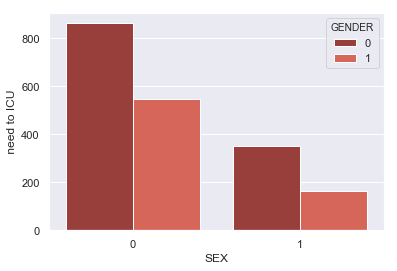

In [ ]:
nemoodar = sns.countplot(x=data["ICU"], hue=data["GENDER"], data=pd.melt(data), palette="Reds_d");
nemoodar.set(xlabel="SEX", ylabel=" need to ICU ");

In [ ]:
by_sex = data.groupby('GENDER')['ICU'].agg([np.sum, np.mean])
by_sex.head()


sum      mean
GENDER               
0       352  0.289712
1       163  0.229577

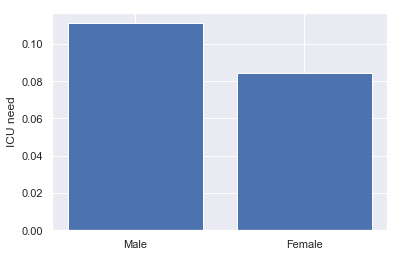

In [ ]:
first_icu = icu.groupby(by=["PATIENT_VISIT_IDENTIFIER"]).first()
fig,ax = plt.subplots()
ax.bar(["Male" , "Female"],[sum(first_icu["GENDER"]==0)/sum(data["GENDER"]==0),sum(first_icu["GENDER"]==1)/sum(data["GENDER"]==1)])
ax.set_ylabel("ICU need");

As predicted, there is not that much difference between genders when considering the proportion.
In Sex 0 , I guess male, we have more males and naturally more need to ICU for males and vice versa for females.

Here we plot two plots that show the proportion of ICU needed people to ICU. They are drawn for two previously selected 
oxygen features (more features will be checked later (such as heart deases or fever)).
Note that most of the paitients are located between 0.1 to 0.6 and others are considered as outliers or exceptions and we dont train the model based on them.


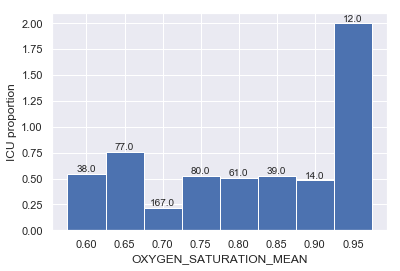

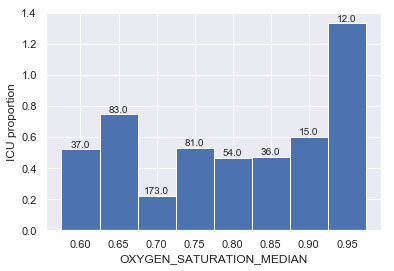

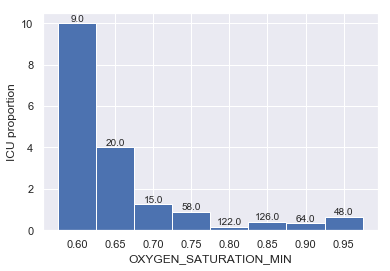

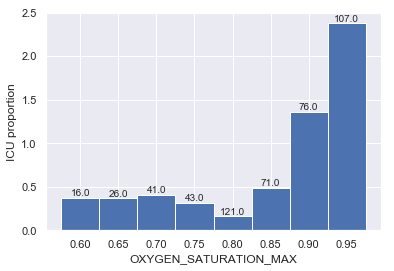

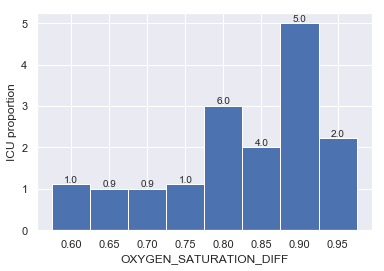

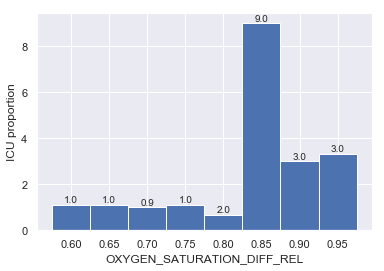

In [ ]:
bins = np.arange(0.6, 1.05, 0.05).tolist()
columns_names = {'k': ["OXYGEN_SATURATION_MEAN", "OXYGEN_SATURATION_MEDIAN"  , "OXYGEN_SATURATION_MIN" , "OXYGEN_SATURATION_MAX", "OXYGEN_SATURATION_DIFF" , "OXYGEN_SATURATION_DIFF_REL"]}
for k in columns_names['k']:
    icu_need, a , b = plt.hist(icu[k],bins=bins);
    no_icu_need,a ,b = plt.hist(not_icu[k],bins=bins);
    icu_need[icu_need == 0] = 0.9
    no_icu_need[no_icu_need==0] = 0.9
    plt.close()
    fig,ax = plt.subplots()
    ax.bar(bins[:-1], icu_need/no_icu_need ,width=0.05);
    ax.set_xlabel(k);
    ax.set_ylabel("ICU proportion");
    rects = ax.patches
    for rect,icu_need in zip(rects,icu_need):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), icu_need, ha='center', va='bottom')
    plt.show();

**Here I plot even more charts than needed because I wanted to prove my guess about the importance of oxygen charts.
As seen below, the only oxygen related features than we can obtain some information from them are the OXYGEN_SATURATION_MAX
and OXYGEN_SATURATION_MIN which are approximately totally increasing or decrasing and the proportion in some ranges in x are much more densed than the others. It is good because strongly shows that if we have OXYGEN_SATURATION_MAX or OXYGEN_SATURATION_MIn with special value, what does it mean.**

**OXYGEN_SATURATION_DIFF_REL and OXYGEN_SATURATION_DIFF and OXYGEN_SATURATION_MEDIAN are not even somehow increasing or decreasing or even very densed, I mean by having a special value from these plots we can not understand any special information and they should be omitted in the feature engineering phase.**

**The other feature is OXYGEN_SATURATION_MEAN which is some how incresing but the density for all x_s are approximately same and this feature is informative for just high x values, but we have other meanings obtained from other bars for high values of x too so we will put this feature to the trash too.**

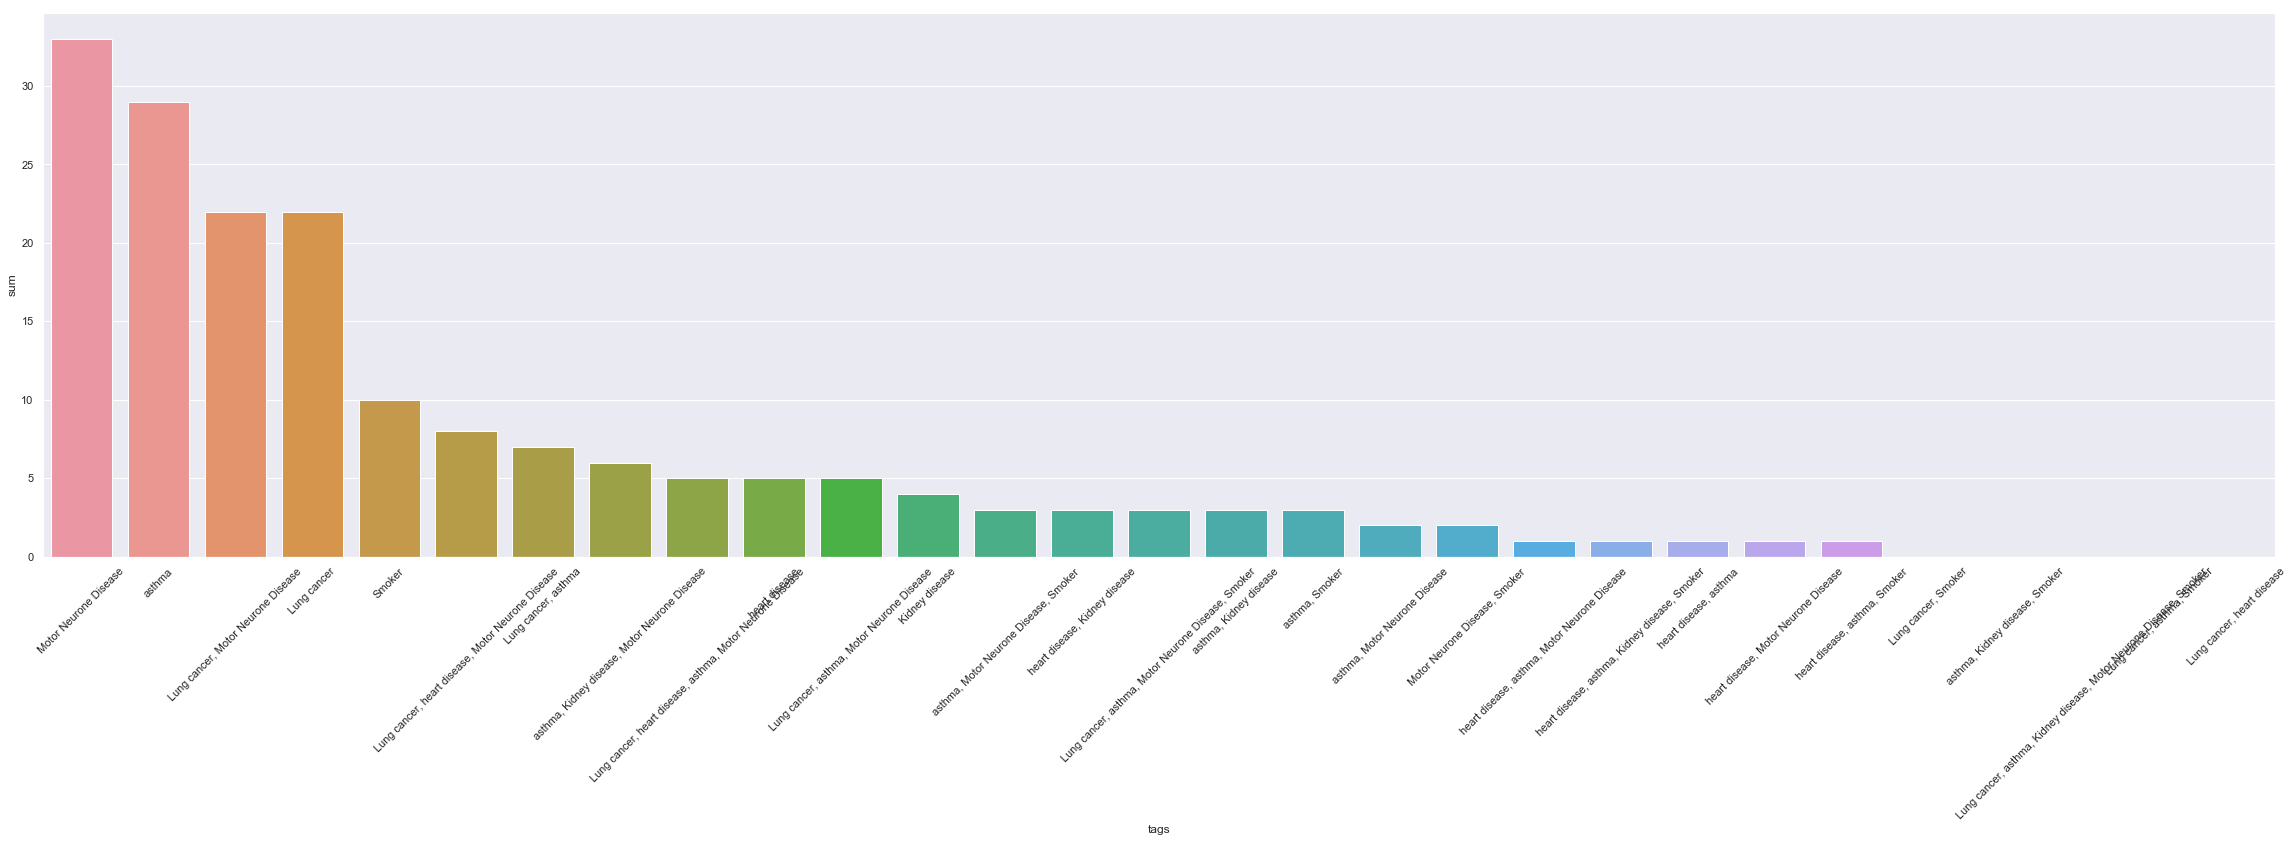

In [ ]:
tag = data.groupby('tags')['ICU'].agg([np.sum, np.mean]).reset_index()
data_tag = tag.sort_values('sum', ascending=False)
data_tag.head()
plt.figure(figsize=(40, 10))
ax = sns.barplot(data=data_tag[:40], x='tags', y='sum')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

Further more, we understand that above deaseses can lead to ICU more and we ignore other deaseses.

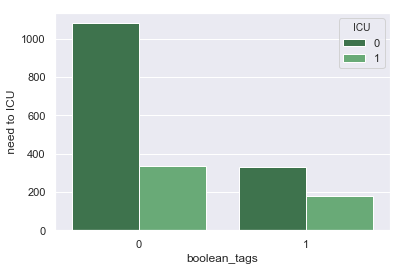

In [ ]:
nemoodar = sns.countplot(x="boolean_tags", hue="ICU", data=data ,palette='Greens_d');
nemoodar.set(xlabel="boolean_tags", ylabel=" need to ICU ");

This plot shows the proportion of each feature in need to ICU. It is shown that most of the data n tag column
are missed and they are null. we will delete them or even fill them later.
By ignoring null values, we can understand that Nueoron deasies and asthema and other deasieses can lead
to ICU need in case of covid 19. After some deases, the other effective feature is smoking.
Despite the idea that smoking is very important, it is not that much dangrous!
There are more other features except deases and smoking leading to ICU but their effect are very little and they equal to zero so we ignore them.

For column tags we know that number of null values are high: around 75% of data. 
It may contain some information; but it does not have much affect in our general estimation.
Yet we need to check if it can help our investigation.

As mentioned before, another feature that is important to ICU prediction is whether the patient has fever or not.
Intuietively we know that fever and high body temprature is a bad sign and now we want to check our guess. Like oxygen, there many features for the body temprature so we should use some of them that are more informative, but not all of them. We repeat the same procedure as we had for oxygen columns. 

In [ ]:
icu = data[data["ICU"]==1]
not_icu = data[data["ICU"]==0]
columns_names = {'k': ["TEMPERATURE_MEAN", "TEMPERATURE_MEDIAN" ,"TEMPERATURE_MIN" , "TEMPERATURE_MAX", "TEMPERATURE_DIFF" , "OXYGEN_SATURATION_DIFF_REL"]}
for k in columns_names['k']:
    print(k , round(icu[k].mean(), 3) , round(not_icu[k].mean(), 3))

TEMPERATURE_MEAN 0.037 0.078
TEMPERATURE_MEDIAN 0.035 0.074
TEMPERATURE_MIN 0.255 0.353
TEMPERATURE_MAX 0.068 -0.004
TEMPERATURE_DIFF -0.649 -0.815
OXYGEN_SATURATION_DIFF_REL -0.798 -0.92


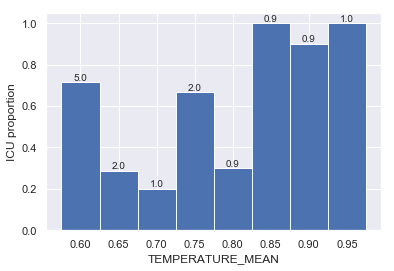

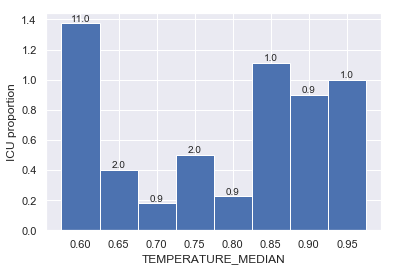

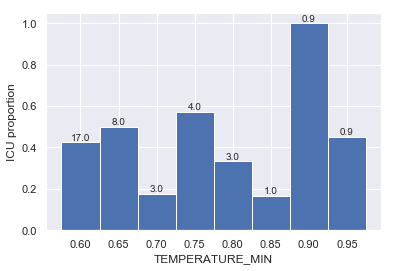

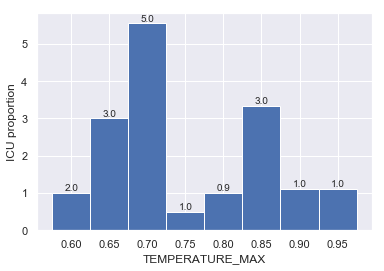

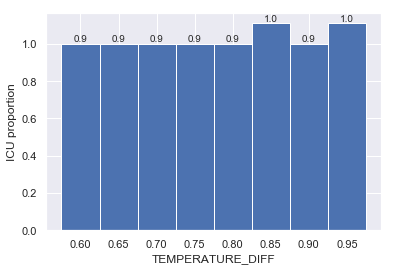

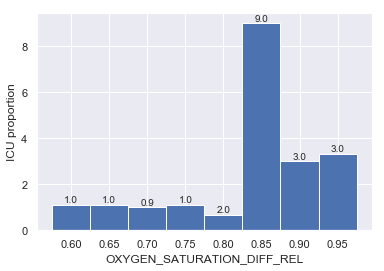

In [ ]:
bins = np.arange(0.6, 1.05, 0.05).tolist()
columns_names = {'k': ["TEMPERATURE_MEAN", "TEMPERATURE_MEDIAN" ,"TEMPERATURE_MIN" , "TEMPERATURE_MAX", "TEMPERATURE_DIFF" , "OXYGEN_SATURATION_DIFF_REL"]}
for k in columns_names['k']:
    icu_need, a , b = plt.hist(icu[k],bins=bins);
    no_icu_need,a ,b = plt.hist(not_icu[k],bins=bins);
    icu_need[icu_need == 0] = 0.9
    no_icu_need[no_icu_need==0] = 0.9
    plt.close()
    fig,ax = plt.subplots()
    ax.bar(bins[:-1], icu_need/no_icu_need ,width=0.05);
    ax.set_xlabel(k);
    ax.set_ylabel("ICU proportion");
    rects = ax.patches
    for rect,icu_need in zip(rects,icu_need):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), icu_need, ha='center', va='bottom')
    plt.show();

**To summerize the explonation, from both the plots and the values we can understand no temprature feature is uniquly informative and all of them tell us that the ICU needed patient has high body temprature so as a sample (for not making our model complicated and obeying the generalization to avoid overfitting) we use as TEMPRATURE_DIFF_REL which is more informative to some extent ( In the following models, I really doent care very much to even this one temprature selected feature for generalization and having less variance. Althogh in this case the bias will be more but the trade off between bias and variance persuaded me not to involve this feature in my model.**

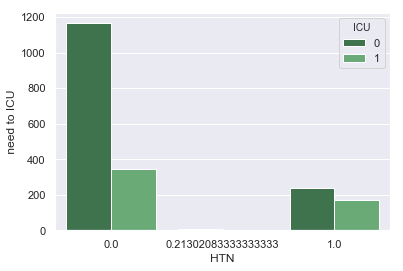

In [ ]:
nemoodar = sns.countplot(x="HTN", hue="ICU", data=data , palette='Greens_d');
nemoodar.set(xlabel="HTN", ylabel=" need to ICU ");

In [ ]:
by_HTN = data.groupby('HTN')['ICU'].agg([np.sum, np.mean])
by_HTN.head()

sum      mean
HTN                    
0.000000  346  0.228987
0.213021    0  0.000000
1.000000  169  0.413203

As we can see the HTN is a good feature because it sepereates ICUs and normals weel.
One interesting thing is that HTN = 0,2130 was nan data that i previously filled it in preprocessing.

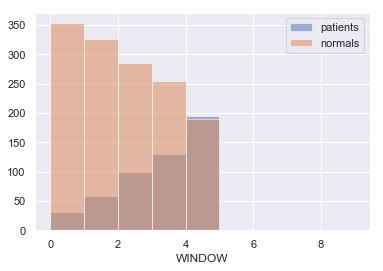

In [ ]:
# window seperated
patients = data[data["ICU"] == 1]["WINDOW"]
normals = data[data["ICU"] == 0]["WINDOW"]
bins = sorted(data['AGE_PERCENTIL'].unique())
plt.hist(patients, bins=bins, ec='w', density=False, alpha=0.5, label='patients');
plt.hist(normals, bins=bins, ec='w', density=False, alpha=0.5, label='normals');
plt.xlabel('WINDOW')
plt.legend();

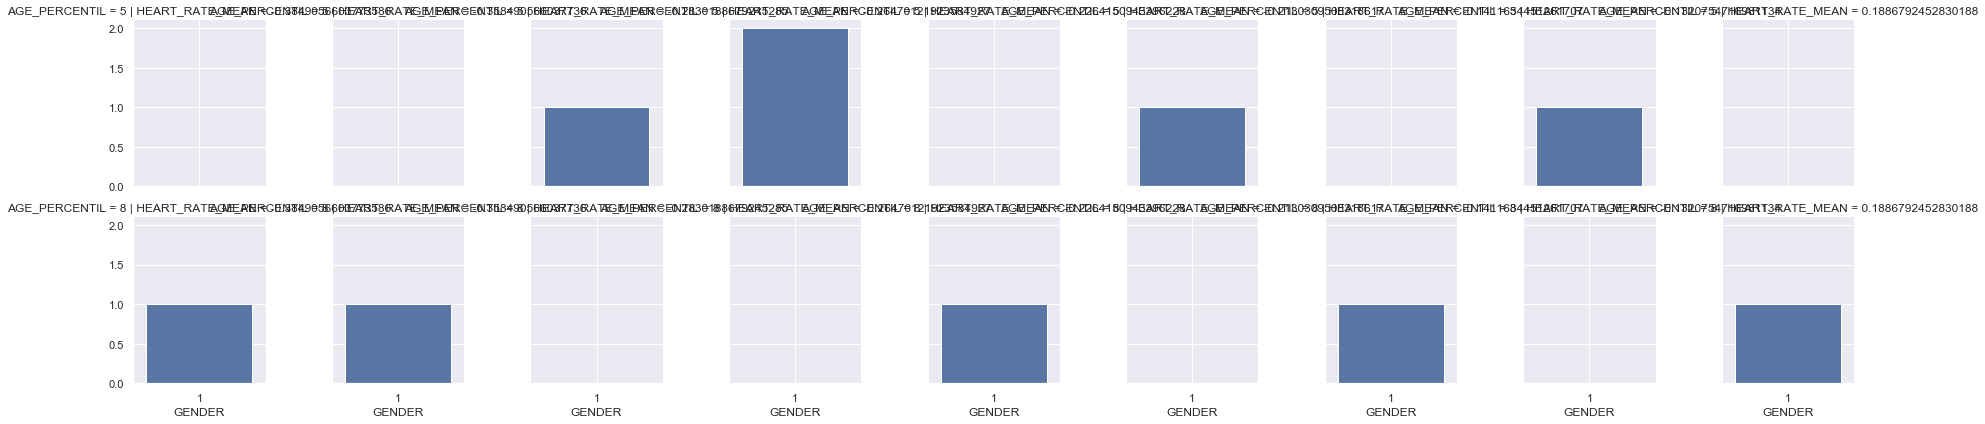

In [ ]:
g = sns.FacetGrid(data.head(10), col="HEART_RATE_MEAN",row="AGE_PERCENTIL")
g.map(sns.countplot, "GENDER")

The HEART_RATE_MEAN of different ages based on their gender is actuallt not informative but I just plotted it for fun:)

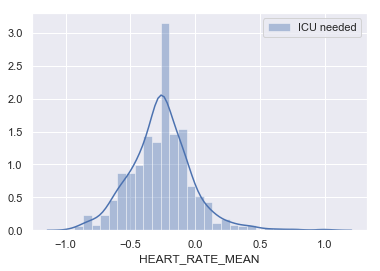

In [ ]:
heart_rate=data[data["ICU"]==1]['HEART_RATE_MEAN']
sns.distplot(heart_rate,label="ICU needed",hist=True)
plt.legend();

This plot shows most of the people that need ICU has low heart_rate but in practice, when a patient's heart beat is very low, he is very near to death and this actually does not really help to predict fast ICU need. But as plotted it is informative.

As you can see in all the cases it is important to visit doctor as fast as possible and any thing is suspicious related to covid 19 otherwise it will lead to ICU or even person's death. 
With the above plot we understand that the time of visiting doctor is one of the major features that we will consider.

I checked the dataset more and other features are not intuitively iportant or they are less important than mentioned features so I avoid to check or even consider them because I want to generalize my model and I want to prevent it from overfitting and working properly on train and validation dataset but workind poorly on the test dataset and I guess in the bias variance trade off between bias and variance here, I will reach a suitable bias rate ( although I ignored some features but the error will not be very high). Also the variance will be low because the model will be simple and it will be generalized so the result would not vary from on dataset to another one.

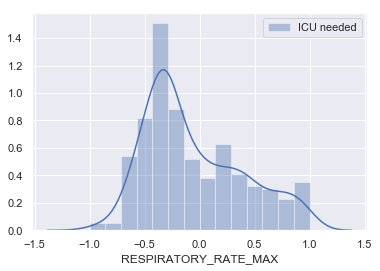

In [ ]:
heart_rate=data[data["ICU"]==1]['RESPIRATORY_RATE_MAX']
sns.distplot(heart_rate,label="ICU needed",hist=True)
plt.legend();

The description is like the above feature, HEART_RATE_MEAN.

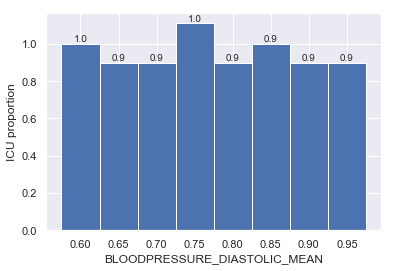

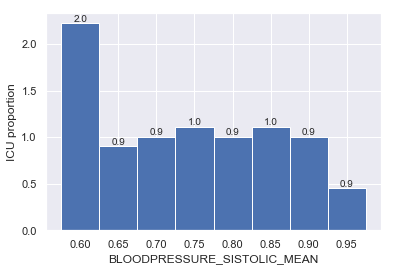

In [ ]:
bins = np.arange(0.6, 1.05, 0.05).tolist()
columns_names = {'k': ["BLOODPRESSURE_DIASTOLIC_MEAN", "BLOODPRESSURE_SISTOLIC_MEAN"]}
for k in columns_names['k']:
    icu_need, a , b = plt.hist(icu[k],bins=bins);
    no_icu_need,a ,b = plt.hist(not_icu[k],bins=bins);
    icu_need[icu_need == 0] = 0.9
    no_icu_need[no_icu_need==0] = 0.9
    plt.close()
    fig,ax = plt.subplots()
    ax.bar(bins[:-1], icu_need/no_icu_need ,width=0.05);
    ax.set_xlabel(k);
    ax.set_ylabel("ICU proportion");
    rects = ax.patches
    for rect,icu_need in zip(rects,icu_need):
        ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height(), icu_need, ha='center', va='bottom')
    plt.show();

Blood pressure is another factor that hepls us recognize patients need ICU from others. Like befor, e.g like oxygen or temprature we have several columns for the data here and by practice,I guess it is nore informative to use means. So I just handled them.
As seen above, "BLOODPRESSURE_SISTOLIC_MEAN" is more informative.

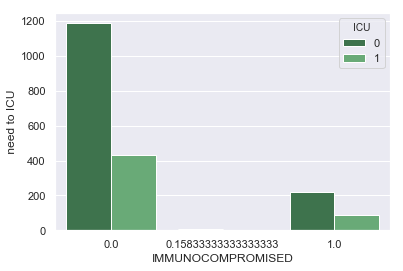

In [ ]:
nemoodar = sns.countplot(x="IMMUNOCOMPROMISED", hue="ICU", data=data ,palette='Greens_d');
nemoodar.set(xlabel="IMMUNOCOMPROMISED", ylabel=" need to ICU ");

The IMMUNOCOMPROMISED shows that if a person immune system is week, he will be in more gander rather than strong person and this is also an important feature which we can decide based on.

# Feature Engineering

We should be careful and rather than features that I previously said that are not informative and I will ignore them, I will igonre some of the features that previously I assumed are important. 

I order the features and try to have the most important ones and train the model.

Because the train dataset is small, I will use some techniques to prevent overfitting and having more generalization such as 
k-fold cross validation.

I also tested some times on the simplest and fastest model, logistic regression to know which features are more important.
Moreover I used the plots and also percentage of each important feature to decide between them . The more effect the feature has on sending a person to ICU, the more
cruicial to have it.

Note that because the dataset is small, we may have some few feature and this can cause bias and error and make the model less accurate.

First we drop columns that we understood are extra in EDA:

In [882]:
data.shape

(1925, 257)

In [883]:
data.drop('AGE_ABOVE65', axis='columns', inplace=True)
data.drop("OXYGEN_SATURATION_MEAN", axis='columns', inplace=True)
data.drop("OXYGEN_SATURATION_MEDIAN", axis='columns', inplace=True)
data.drop("OXYGEN_SATURATION_DIFF", axis='columns', inplace=True)
data.drop("OXYGEN_SATURATION_DIFF_REL", axis='columns', inplace=True)
data.drop("TEMPERATURE_MEAN", axis='columns', inplace=True)
data.drop("TEMPERATURE_MEDIAN", axis='columns', inplace=True)
data.drop("TEMPERATURE_MIN", axis='columns', inplace=True)
data.drop("TEMPERATURE_MAX", axis='columns', inplace=True)
data.drop("TEMPERATURE_DIFF", axis='columns', inplace=True)
data.drop("BLOODPRESSURE_DIASTOLIC_MEAN", axis='columns', inplace=True)
for x in range (5,7+1):
    data.drop(data.columns[x], axis='columns', inplace=True)
data.drop(data.columns[6], axis='columns', inplace=True)
data.drop("BIC_ARTERIAL_MEDIAN", axis='columns', inplace=True)
data.drop("BLAST_MIN", axis='columns', inplace=True)
data.drop("BLAST_MEAN", axis='columns', inplace=True)
data.drop("BLAST_MEDIAN", axis='columns', inplace=True)
data.drop("BILLIRUBIN_DIFF", axis='columns', inplace=True)
data.drop("BIC_VENOUS_DIFF", axis='columns', inplace=True)
data.drop("BIC_VENOUS_MIN", axis='columns', inplace=True)
data.drop("BIC_VENOUS_MEAN", axis='columns', inplace=True)
data.drop("BIC_VENOUS_MEDIAN", axis='columns', inplace=True)
data.drop("BIC_ARTERIAL_DIFF", axis='columns', inplace=True)
data.drop("BIC_ARTERIAL_MAX", axis='columns', inplace=True)
data.drop("BIC_ARTERIAL_MIN", axis='columns', inplace=True)
data.drop("BLAST_MAX", axis='columns', inplace=True)
data.drop("BLAST_DIFF", axis='columns', inplace=True)
data.drop("CREATININ_DIFF", axis='columns', inplace=True)
data.drop("FFA_DIFF", axis='columns', inplace=True)
data.drop("GGT_DIFF", axis='columns', inplace=True)
data.drop("GLUCOSE_DIFF", axis='columns', inplace=True)
data.drop("LEUKOCYTES_MEAN", axis='columns', inplace=True)
data.drop("LEUKOCYTES_MIN", axis='columns', inplace=True)
data.drop("LEUKOCYTES_MAX", axis='columns', inplace=True)
data.drop("LEUKOCYTES_DIFF", axis='columns', inplace=True)
data.drop("LINFOCITOS_MEAN", axis='columns', inplace=True)
data.drop("LINFOCITOS_MIN", axis='columns', inplace=True)
data.drop("LINFOCITOS_MAX", axis='columns', inplace=True)
data.drop("LINFOCITOS_DIFF", axis='columns', inplace=True)
data.drop("NEUTROPHILES_MEAN", axis='columns', inplace=True)
data.drop("NEUTROPHILES_MIN", axis='columns', inplace=True)
data.drop("NEUTROPHILES_MAX", axis='columns', inplace=True)
data.drop("NEUTROPHILES_DIFF", axis='columns', inplace=True)
data.drop("P02_ARTERIAL_DIFF", axis='columns', inplace=True)
data.drop("P02_VENOUS_MEDIAN",axis='columns', inplace=True)
data.drop("P02_VENOUS_MEAN", axis='columns', inplace=True)
data.drop("P02_VENOUS_MIN", axis='columns', inplace=True)
data.drop("BE_ARTERIAL_MEAN", axis='columns', inplace=True)
data.drop("BE_ARTERIAL_MIN", axis='columns', inplace=True)
data.drop("BE_ARTERIAL_MAX", axis='columns', inplace=True)
data.drop("BE_ARTERIAL_DIFF", axis='columns', inplace=True)
data.drop("BE_VENOUS_MEAN", axis='columns', inplace=True)
data.drop("BE_VENOUS_MAX", axis='columns', inplace=True)
data.drop("LACTATE_MEDIAN", axis='columns', inplace=True)
data.drop("LACTATE_MEAN", axis='columns', inplace=True)
data.drop("LACTATE_MIN", axis='columns', inplace=True)
data.drop("HEMOGLOBIN_MEDIAN", axis='columns', inplace=True)
data.drop("HEMOGLOBIN_MIN", axis='columns', inplace=True)
data.drop("HEMOGLOBIN_MEAN", axis='columns', inplace=True)
data.drop("BLOODPRESSURE_DIASTOLIC_MIN", axis='columns', inplace=True)
data.drop("BLOODPRESSURE_SISTOLIC_DIFF_REL", axis='columns', inplace=True)
data.drop("BLOODPRESSURE_SISTOLIC_DIFF", axis='columns', inplace=True)
data.drop("RESPIRATORY_RATE_MAX", axis='columns', inplace=True)
data.drop("RESPIRATORY_RATE_DIFF", axis='columns', inplace=True)
data.drop("RESPIRATORY_RATE_DIFF_REL", axis='columns', inplace=True)
data.drop("HEART_RATE_DIFF", axis='columns', inplace=True)
data.drop("RESPIRATORY_RATE_MEAN", axis='columns', inplace=True)
data.drop("BLOODPRESSURE_SISTOLIC_MAX", axis='columns', inplace=True)
data.drop("BLOODPRESSURE_DIASTOLIC_DIFF", axis='columns', inplace=True)
data.drop("BLOODPRESSURE_DIASTOLIC_DIFF_REL", axis='columns', inplace=True)
data.drop("HEART_RATE_DIFF_REL", axis='columns', inplace=True)
data.drop("BE_VENOUS_MIN", axis='columns', inplace=True)

The code is a bit dirty but I droped the repetetive or constant columns with high correlation to data to have best acc.

In [884]:
data.shape

(1925, 183)

I have features but I dont use all of them, I use about 15 of them with correlation matrix.

Also by a glance we can see that the dataset which has few samples is even smaller than it looks. Many rows are copy of each other and many rows are constant.
Morover as we faced before, many coluns have mean, std, max and min for 1 feature which in each case we only choosed one of them.

**Actually the best way to select the features was to see the below plots , for example with the hyper parameter = 0.1. This will show us many features than needed, but we dont need that much feature and we also want to select the features which are different from each other so between them we can select the different features instead of removing columns from dataset by hand.
But I did this because I though it might be better to work with a simpler and smaller dataset so I droped extra columns which were same or constant ( actually not all of them , just the effective one, those that were invovled in the result and had the most correlation)**

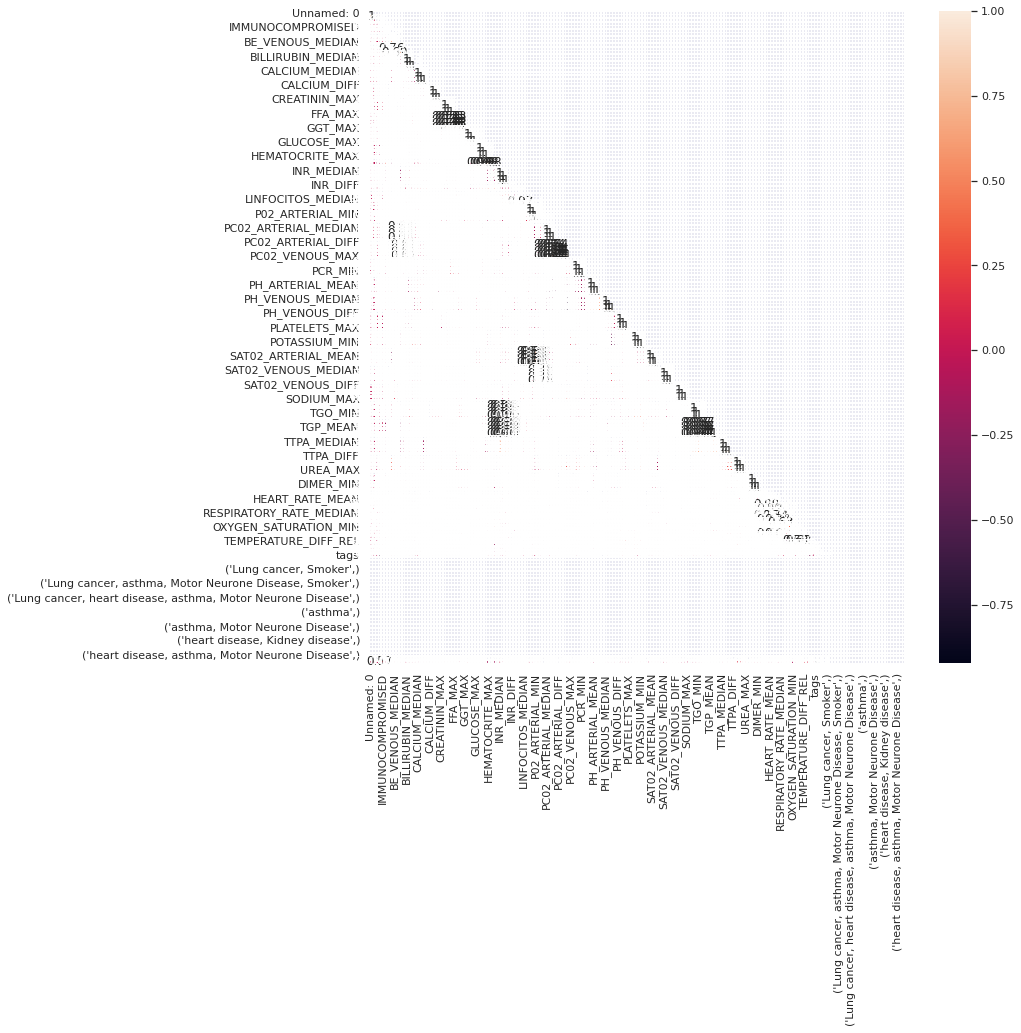

In [224]:
#Correlation matrix to show the relations between features and how are they related.
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(data.corr(), annot=True, mask=mask, linewidths=.6, ax=ax);

We see that most of the features are uncorrelated to ICU.

**Normalization**

First we use normalization to prevent numbers with same order cause correlation. Because only the range of numbers and even continioues or descrite ness of them should not leed to correlation.

In [885]:
for column in data.columns: 
    data[column] =round((data[column] - data[column].mean()) / data[column].std() , 3)
data.head()

Unnamed: 0  ...  boolean_tags
0      -1.731  ...         1.665
1      -1.729  ...         1.665
2      -1.727  ...         1.665
3      -1.725  ...         1.665
4      -1.724  ...         1.665

[5 rows x 183 columns]

We can delete unuseful columns or we can use the covariance matrix to delete those with minimum correlation.

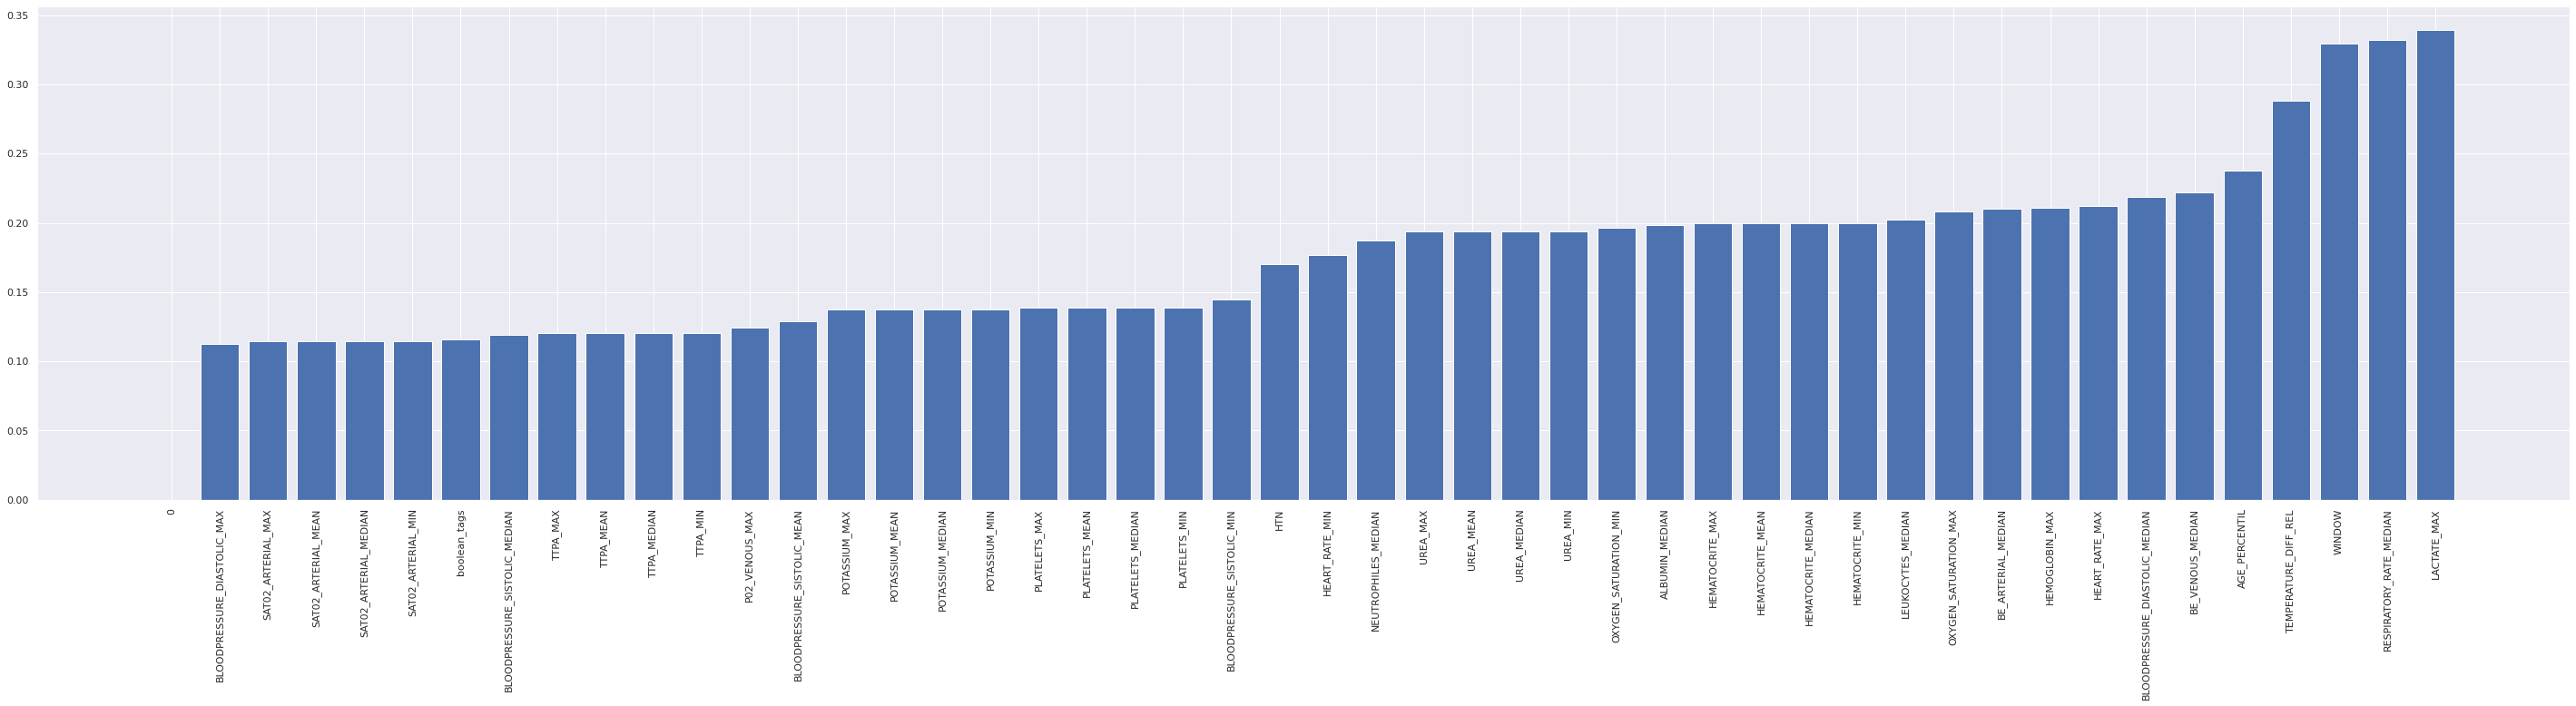

In [226]:
corr = abs(data.corr())
columns = corr['ICU'].index
figure = [[corr['ICU'][i], columns[i]] if corr['ICU'][i] > 0.1 else [0, '0'] for i in range(len(columns))]
figure = sorted(figure)[:-1]
relevant_features = [figure[i][0] for i in range(len(figure))]
selected_features = [figure[i][1] for i in range(len(figure))]
plt.figure(figsize=(50, 10))
plt.xticks(rotation=90)
plt.bar(selected_features, relevant_features);

The above model has too many features and it is very fit to the model, so it has high variance and may lead to overfitting. Especially because the dataset is small, we do not need these much features.

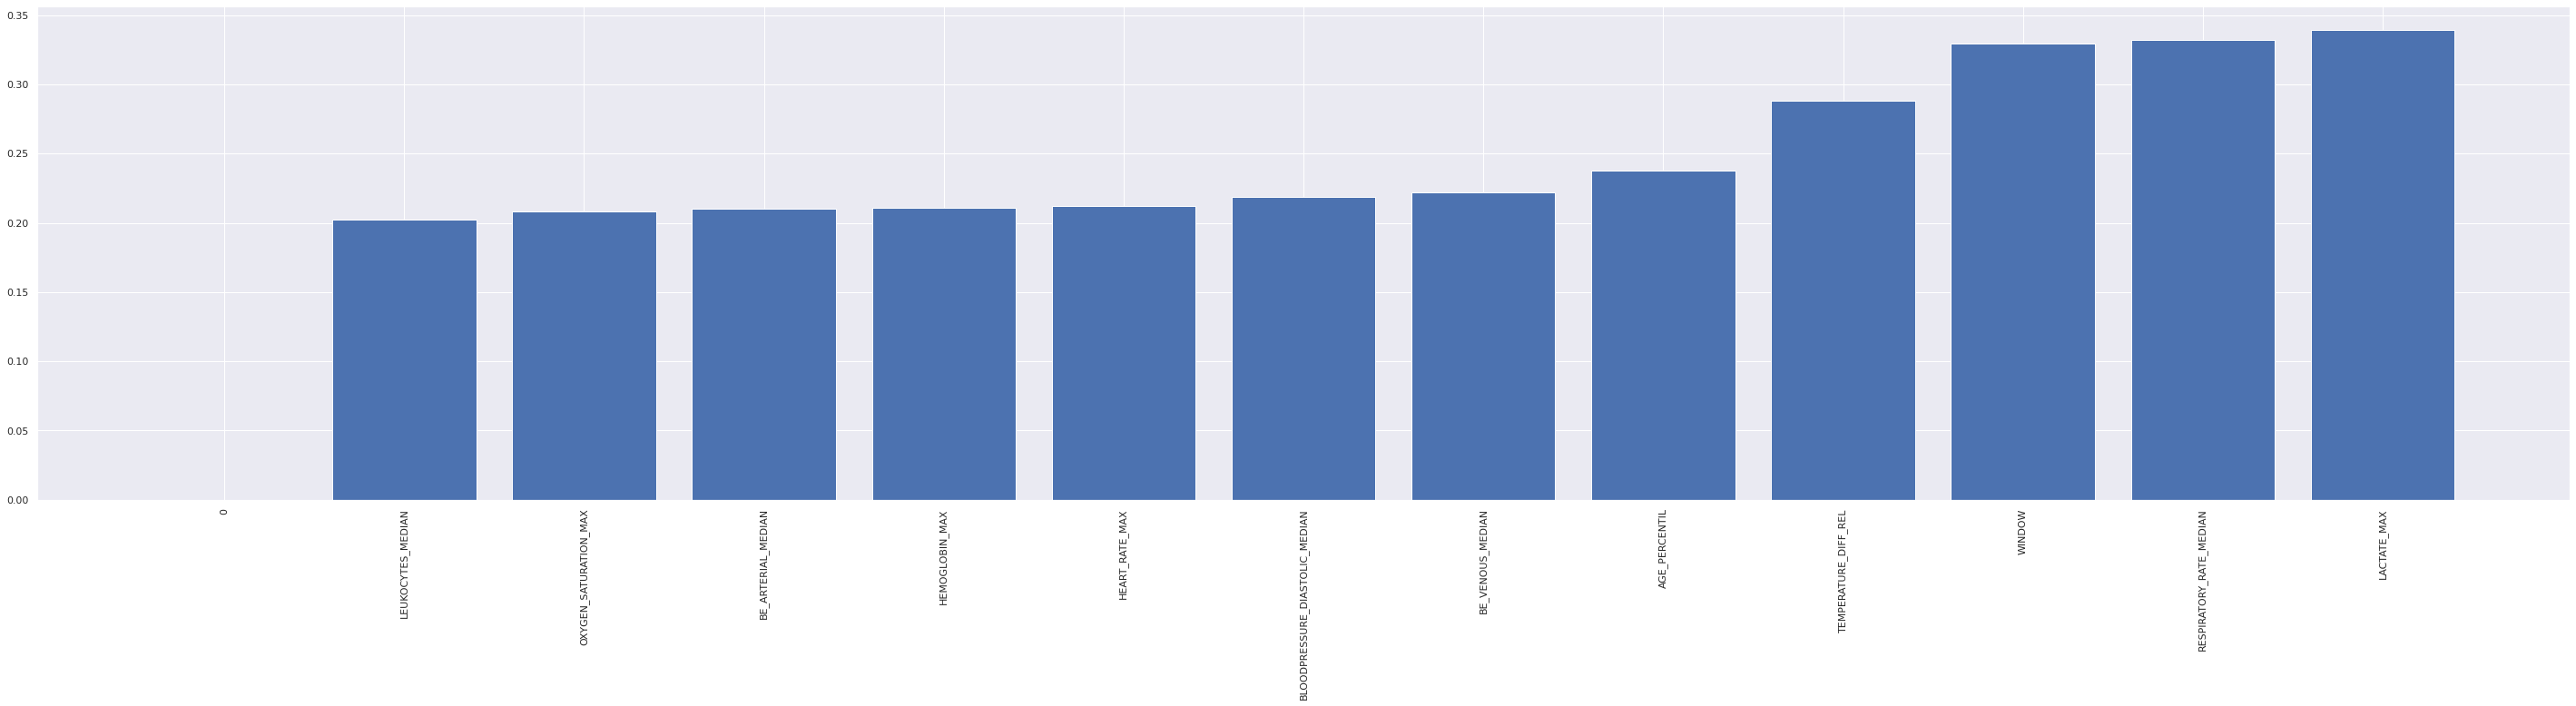

In [886]:
corr = abs(data.corr())
columns = corr['ICU'].index
figure = [[corr['ICU'][i], columns[i]] if corr['ICU'][i] > 0.2 else [0, '0'] for i in range(len(columns))]
figure = sorted(figure)[:-1]
relevant_features = [figure[i][0] for i in range(len(figure))]
selected_features = [figure[i][1] for i in range(len(figure))]
plt.figure(figsize=(50, 10))
plt.xticks(rotation=90)
plt.bar(selected_features, relevant_features);

**I tried a lot to have several and different features on the correlation rate 0.2 because with this rate the number of parameters were proper and as you can see the above plot shows us different features.

I manually add some important features not detected above, but detected as important in EDA and beore that by intuition.**

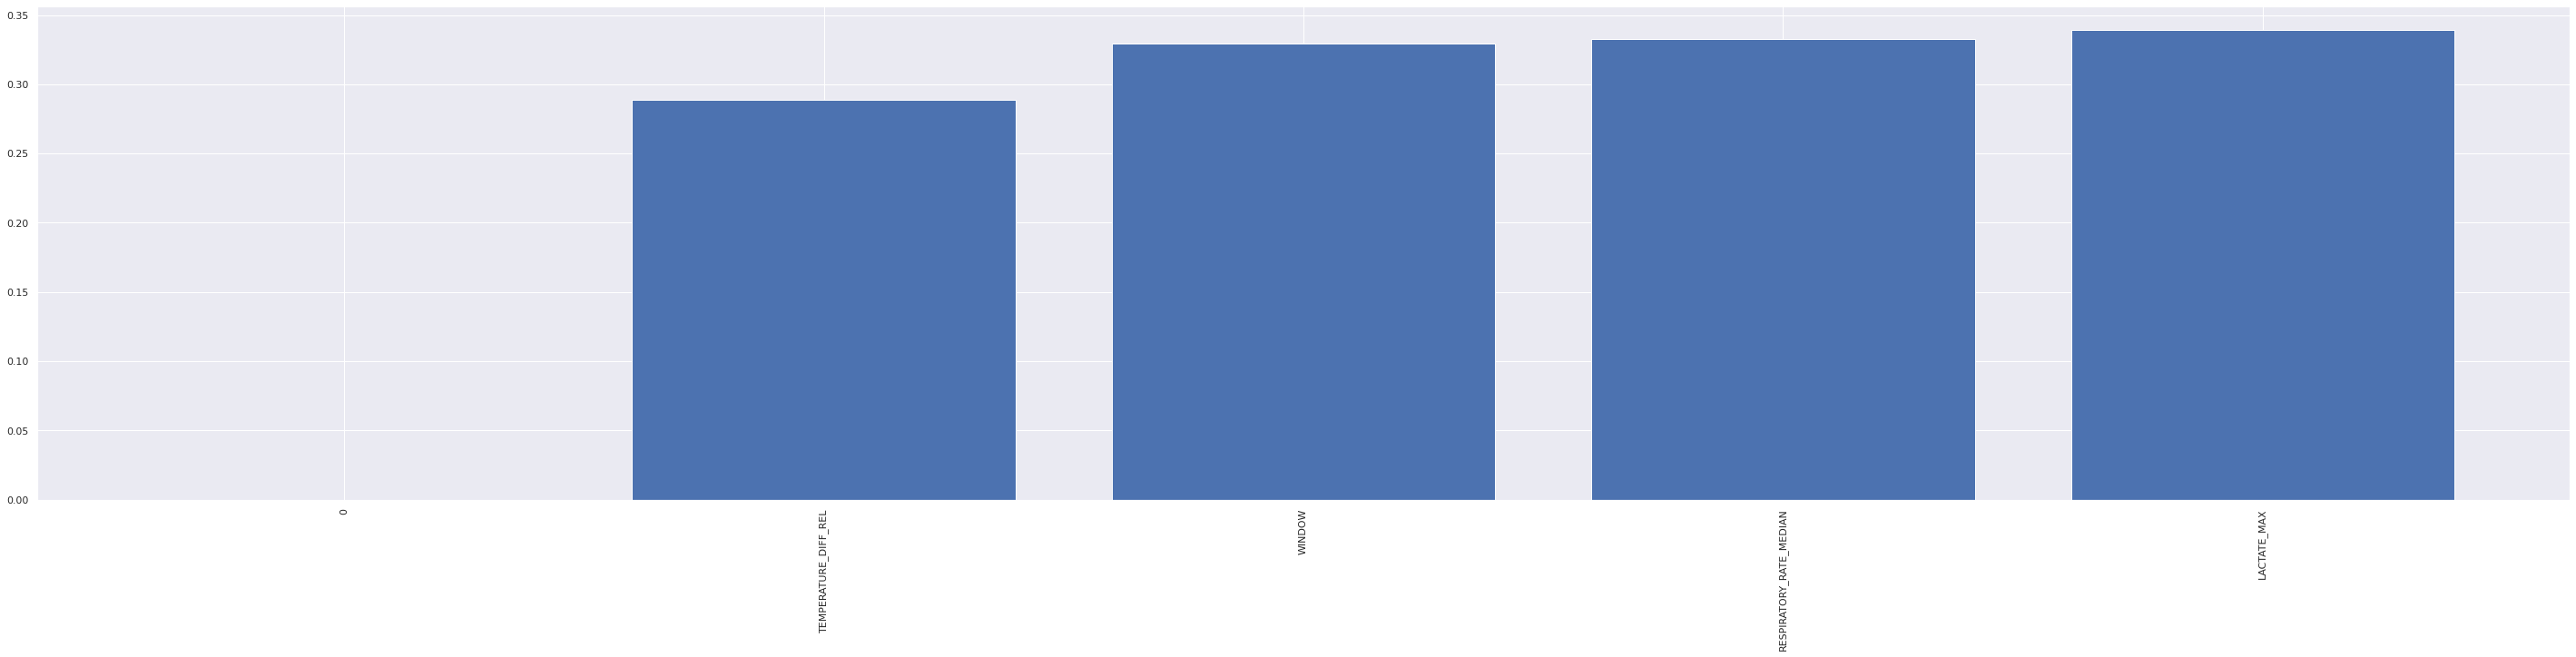

In [228]:
corr = abs(data.corr())
columns = corr['ICU'].index
figure = [[corr['ICU'][i], columns[i]] if corr['ICU'][i] > 0.25 else [0, '0'] for i in range(len(columns))]
figure = sorted(figure)[:-1]
relevant_features = [figure[i][0] for i in range(len(figure))]
selected_features = [figure[i][1] for i in range(len(figure))]
plt.figure(figsize=(50, 10))
plt.xticks(rotation=90)
plt.bar(selected_features, relevant_features);

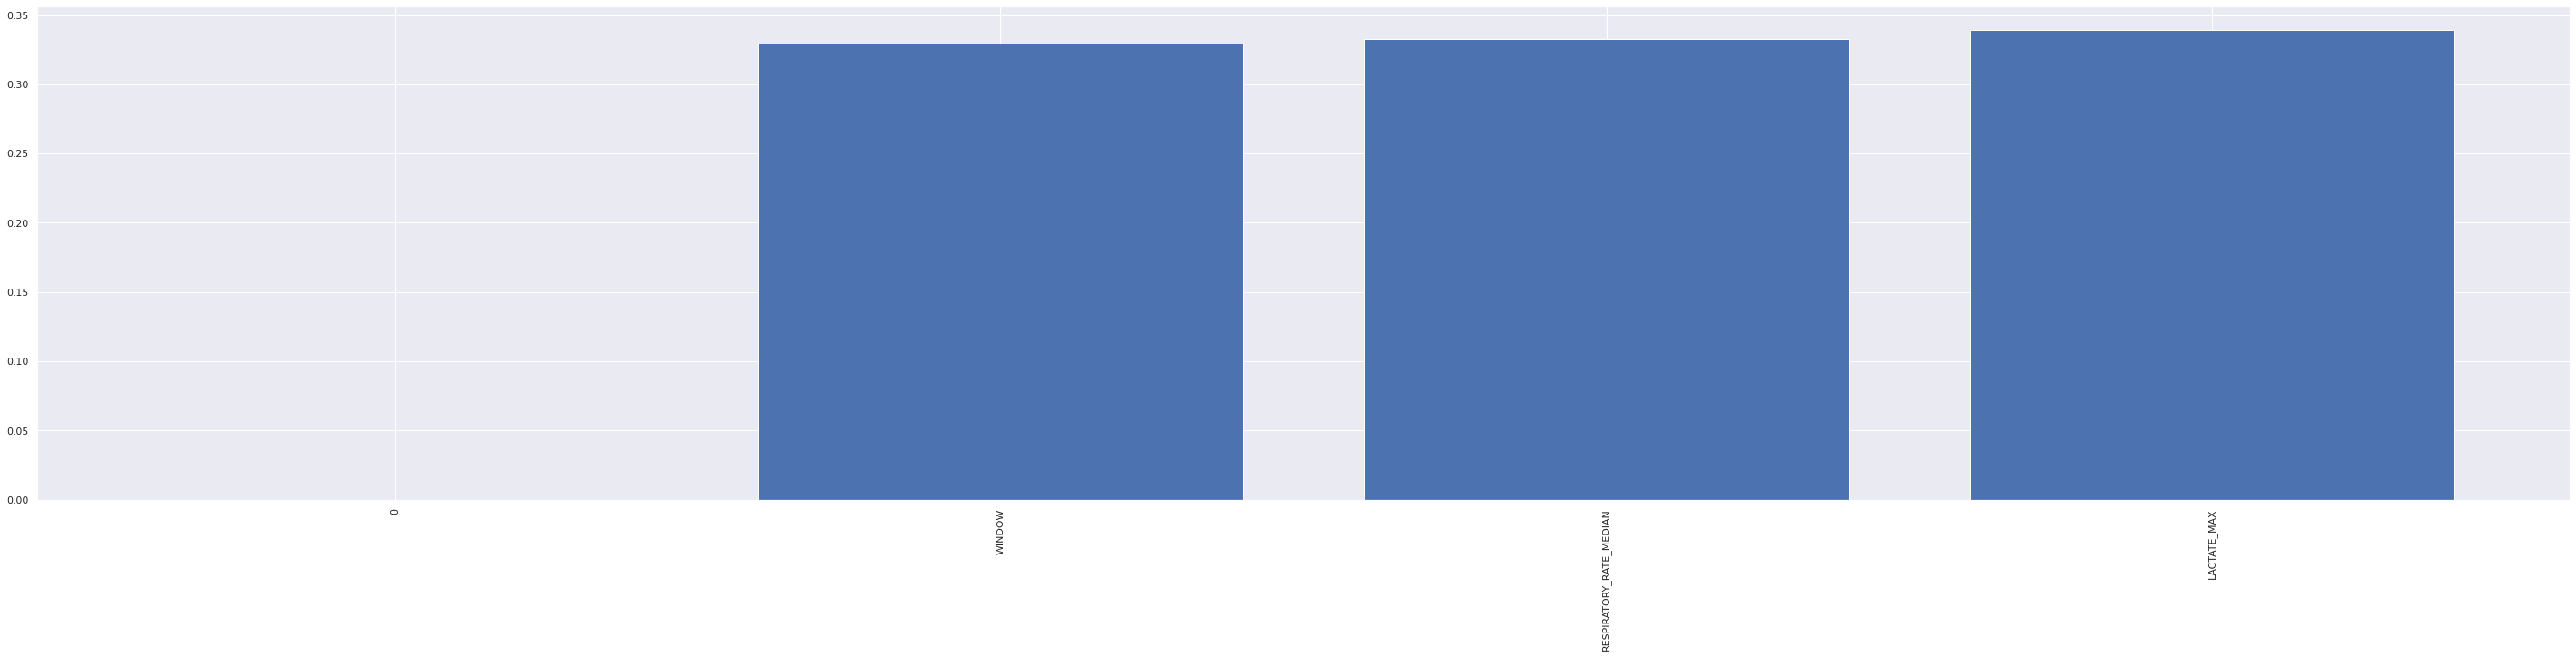

In [229]:
corr = abs(data.corr())
columns = corr['ICU'].index
figure = [[corr['ICU'][i], columns[i]] if corr['ICU'][i] > 0.3 else [0, '0'] for i in range(len(columns))]
figure = sorted(figure)[:-1]
relevant_features = [figure[i][0] for i in range(len(figure))]
selected_features = [figure[i][1] for i in range(len(figure))]
plt.figure(figsize=(50, 10))
plt.xticks(rotation=90)
plt.bar(selected_features, relevant_features);

The model with 3 features is very general and it has high bias. It is not suitable!

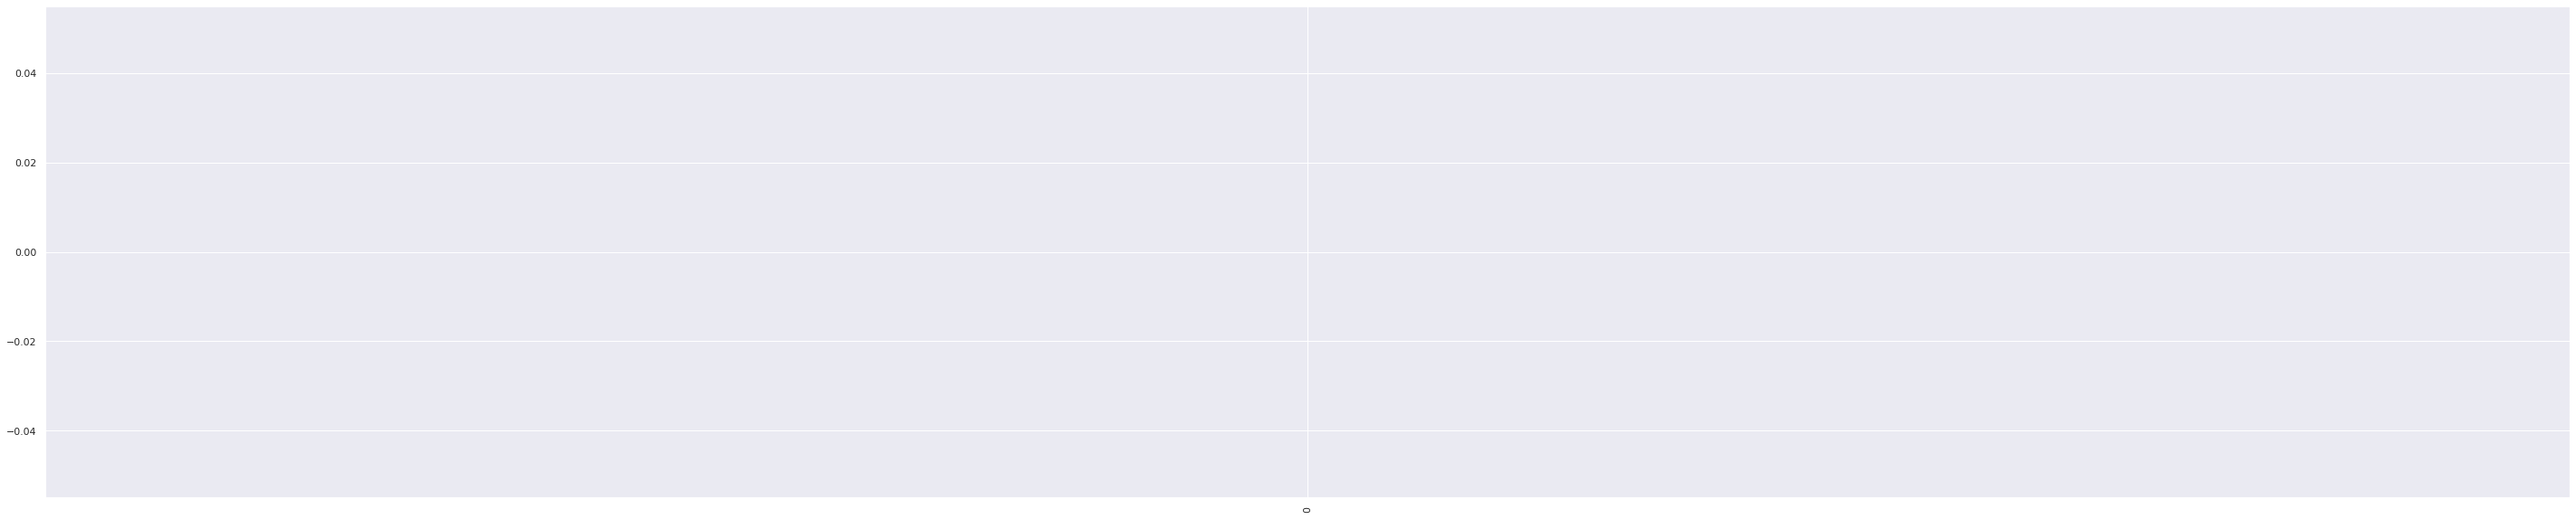

In [230]:
corr = abs(data.corr())
columns = corr['ICU'].index
figure = [[corr['ICU'][i], columns[i]] if corr['ICU'][i] > 0.4 else [0, '0'] for i in range(len(columns))]
figure = sorted(figure)[:-1]
relevant_features = [figure[i][0] for i in range(len(figure))]
selected_features = [figure[i][1] for i in range(len(figure))]
plt.figure(figsize=(50, 10))
plt.xticks(rotation=90)
plt.bar(selected_features, relevant_features);

No feature is selected with this high correlation.

Obviously not proper!

I tried different parametes and between them 0.2 , 0.3 and 0.25 were the best ones. I decided to choose 0.2 because we do not have a test set and in bias variance trade off I decided to have more variance but less bias.

But with hyperparameter 0.2, we still have many same features and I will drop them by hand.

In [887]:
hyper_parameter = 0.18
target_df = corr["ICU"]
features = list(target_df[target_df > hyper_parameter].index)
new_data = data[features]
new_data.head()

ALBUMIN_MEDIAN  BE_ARTERIAL_MEDIAN  ...  AGE_PERCENTIL  WINDOW
0           0.000               0.000  ...          0.237  -1.414
1           0.000               0.000  ...          0.237  -0.707
2           0.525              -0.348  ...          0.237   0.000
3           0.000               0.000  ...          0.237   0.707
4          -3.613               0.874  ...          0.237   1.414

[5 rows x 24 columns]

**Note**



# Predicting Models

First we convert the dataframe to numpy for fast numerical computations.

In [888]:
#converting new dataframe that has only selected features for training the model to numpy, to make calculations
X = new_data.copy()
X.drop('ICU', axis='columns', inplace=True)
#Adding features that considered important in EDA , such as HTN and deases lead to ICU
X.loc[:, "HTN"] = data['HTN']
print(X.columns)
X = X.to_numpy()
#y was previously determined
print(y)

Index(['ALBUMIN_MEDIAN', 'BE_ARTERIAL_MEDIAN', 'BE_VENOUS_MEDIAN',
       'HEMATOCRITE_MEDIAN', 'HEMATOCRITE_MEAN', 'HEMATOCRITE_MIN',
       'HEMATOCRITE_MAX', 'HEMOGLOBIN_MAX', 'LACTATE_MAX', 'LEUKOCYTES_MEDIAN',
       'NEUTROPHILES_MEDIAN', 'UREA_MEDIAN', 'UREA_MEAN', 'UREA_MIN',
       'UREA_MAX', 'BLOODPRESSURE_DIASTOLIC_MEDIAN', 'RESPIRATORY_RATE_MEDIAN',
       'OXYGEN_SATURATION_MIN', 'HEART_RATE_MAX', 'OXYGEN_SATURATION_MAX',
       'TEMPERATURE_DIFF_REL', 'AGE_PERCENTIL', 'WINDOW', 'HTN'],
      dtype='object')
0       0
1       0
2       0
3       0
4       1
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: ICU, Length: 1925, dtype: int64


In [889]:
#metric 

import typing as th
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

def f1_score(y, y_hat, alpha: float = 0.5, beta: float = 1.):
    return list(metrics.f1_score(y, y_hat, average=None, zero_division=0.).round(5))

def accuracy(y, y_hat, alpha: float = 0.5, beta: float = 1.):
    return metrics.accuracy_score(y, y_hat).round(5)

def precision(y, y_hat , alpha: float = 0.5, beta: float = 1.):
    return metrics.precision_score(y, y_hat, average=None, zero_division=0.).round(5)

def recall(y, y_hat , alpha: float = 0.5, beta: float = 1.):
    return metrics.recall_score(y, y_hat, average=None, zero_division=0.).round(5)

In [890]:
def plot_confusion_matrix(y_test, y_hat_test, normalization):
    cf_matrix = confusion_matrix(y_test, y_hat_test)
    if normalization == False:
      sns.heatmap(cf_matrix, annot=True)
      plt.show();
    if normalization == True:
      sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
      plt.show();

I splited the data to train and test with 90 and 10 % corporation because the dataset is small. I also ignored the validation set and testing the 10 % of the data on it and then test the best model on the test data, because we did not have a test dataset and the train data set was also small and fast to learn.

I guess that models with more complexity will do worse because of overfitting problem of small datasets.

# Training Models

**Important Note**

**If any of the below models does not reach the printed accuracy, please run the predicting Models section ( all of it cells) once again. I dont know wht some problems seldom happen but by this way it will be correct.**

**Note: As we can see, all the confusion matrix all embalanced. I think this is because the dataset is embalanced and even it has many many repetetive or constant cells , but it did not change it to let my models predict even such a dataset and get results.**

**Logistic Regression**

In [891]:
def logistic_regression(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    model = LogisticRegression(solver='liblinear', multi_class='ovr').fit(X_train, y_train)
    print(model)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print("f1 score")
    print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
    print()
    print("accuracy")
    print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
    print()
    print("precision")
    print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
    print()
    print("recall")
    print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
    plot_confusion_matrix(y_test, y_hat_test, False)
    plot_confusion_matrix(y_test, y_hat_test, True)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
f1 score
[0.91156, 0.71739] [0.90104, 0.65722]

accuracy
0.86528 0.84642

precision
[0.87582 0.825  ] [0.85342 0.8147 ]

recall
[0.95035 0.63462] [0.95429 0.55076]


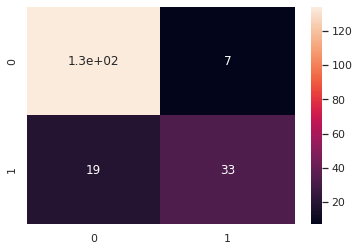

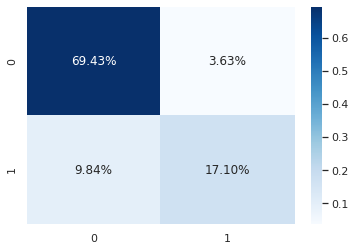

In [892]:
train_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = logistic_regression(train_test)

**Second Logistic Regression Model**

In [694]:
def logistic_regression2(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    model = LogisticRegression(C=1, n_jobs=4, solver='lbfgs', random_state=13, verbose=1).fit(X_train, y_train)
    print(model)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print("f1 score")
    print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
    print()
    print("accuracy")
    print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
    print()
    print("precision")
    print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
    print()
    print("recall")
    print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
    plot_confusion_matrix(y_test, y_hat_test, False)
    plot_confusion_matrix(y_test, y_hat_test, True) 

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=13,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
f1 score
[0.91156, 0.71739] [0.89642, 0.62583]

accuracy
0.86528 0.83776

precision
[0.87582 0.825  ] [0.84211 0.81597]

recall
[0.95035 0.63462] [0.95823 0.50756]


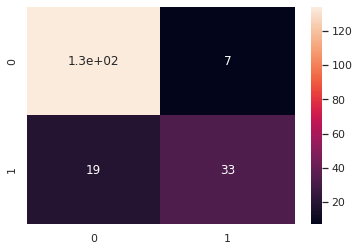

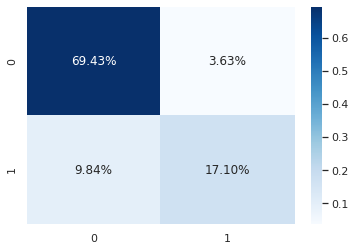

In [695]:
train_test = train_test_split(X, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = logistic_regression2(train_test)

**Note that the measure in doc is F1 score which on the test set I reached more than 90 percent F1score with both of the solvers.**

As predicted, logistic regression model is fast. It is a simple model with proper generalization which prevent data from overfitting. It has low variance because it is general and does not vary from one dataset to another. It has relatively high bais but seems reasonable, means that it is not exact or highly accurated but not that much error to prevent us using the model.

It has no hypothesis about the distribution of dataset based on selected_fetures. But it fit a linear or S shape curve to all kinds of data.

The training phase finished at about 30 seconds for whole data. It does not have that much accuracy and it reached about 70 percent in F1 score in both train and test phases (test phase is in next sections). 

**Decision Tree**

In [921]:
def decision_tree(kfold,X,y):
  parameters = {'k': [2,5, 8, 15 ,100]}
  for k in parameters['k']:
      for train_index, test_index in kfold.split(X):
          X_train, X_test , y_train, y_test = X[train_index], X[test_index] , y[train_index], y[test_index]
          model = DecisionTreeClassifier(max_depth=k)
          model = model.fit(X_train, y_train)
          y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
          k += 1
      print(model)
      print()
      print("f1 score")
      print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
      print()
      print("accuracy")
      print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
      print()
      print("precision")
      print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
      print()
      print("recall")
      print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
      plot_confusion_matrix(y_test, y_hat_test, False)
      plot_confusion_matrix(y_test, y_hat_test, True)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.90464, 0.60215] [0.91306, 0.72359]

accuracy
0.84615 0.86773

precision
[0.86667 0.73684] [0.86615 0.87413]

recall
[0.94609 0.50909] [0.96535 0.61728]


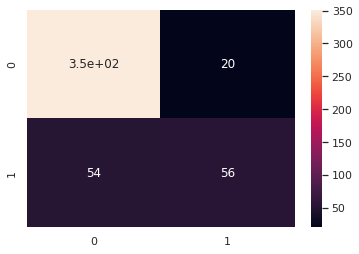

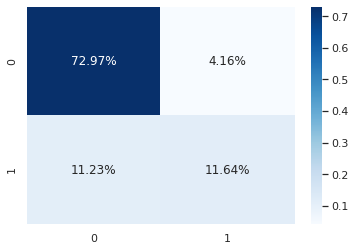

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.90576, 0.63636] [0.94806, 0.8522]

accuracy
0.85031 0.92313

precision
[0.88041 0.71591] [0.92259 0.92486]

recall
[0.93261 0.57273] [0.97498 0.79012]


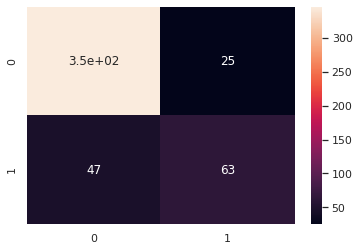

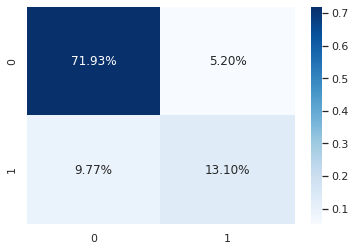

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.89418, 0.61165] [0.97183, 0.92084]

accuracy
0.83368 0.95845

precision
[0.87792 0.65625] [0.94867 0.98867]

recall
[0.91105 0.57273] [0.99615 0.86173]


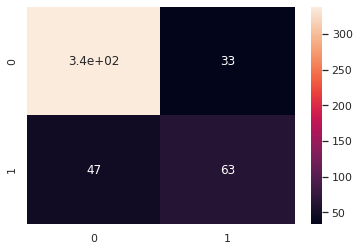

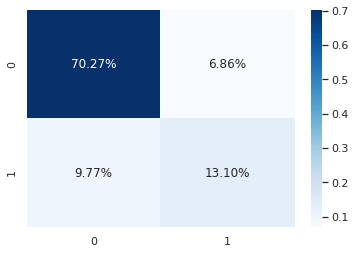

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.88529, 0.61538] [0.98481, 0.95908]

accuracy
0.82328 0.97784

precision
[0.88649 0.61261] [0.97188 0.99469]

recall
[0.8841  0.61818] [0.99808 0.92593]


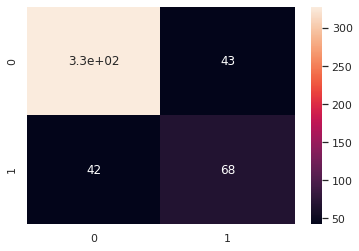

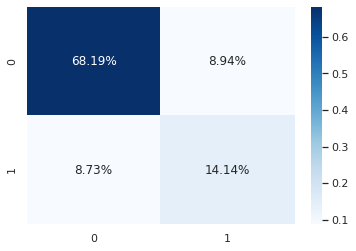

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=103, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.88503, 0.59813] [0.9853, 0.96021]

accuracy
0.82121 0.97853

precision
[0.87798 0.61538] [0.97103 1.     ]

recall
[0.89218 0.58182] [1.      0.92346]


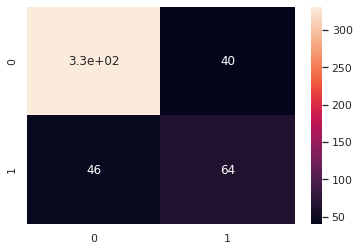

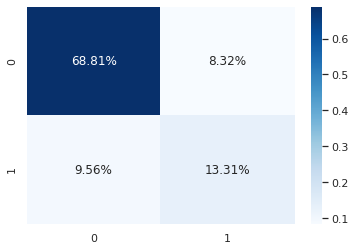

In [922]:
kfold = KFold(n_splits=4)
model = decision_tree(kfold,X,y)

**Note : I reached the f1 score more than 90 % by some k_s in decision tree.**

Decision tree is simple and fast. It has no special algorithm and we can even ignore data normalizayion or filling nan cells of data. It just decide between features in each step.

Decision tree f1 score is high but it is sensitive to outliers or even small changes in data. It can predict only descrete values and it does not take that much time and it is simple but in comparison to simpler models such as regression it more complicated and takes more time.

**Adaboost**

In [698]:
def Adaboost(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    model = AdaBoostClassifier(n_estimators=200, random_state=8)
    model = model.fit(X_train, y_train)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print(model)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print("f1 score")
    print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
    print()
    print("accuracy")
    print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
    print()
    print("precision")
    print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
    print()
    print("recall")
    print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
    plot_confusion_matrix(y_test, y_hat_test, False)
    plot_confusion_matrix(y_test, y_hat_test, True) 

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=8)
f1 score
[0.90722, 0.71579] [0.93364, 0.79335]

accuracy
0.8601 0.89954

precision
[0.88   0.7907] [0.90466 0.88127]

recall
[0.93617 0.65385] [0.96454 0.72138]


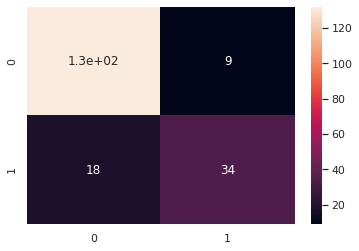

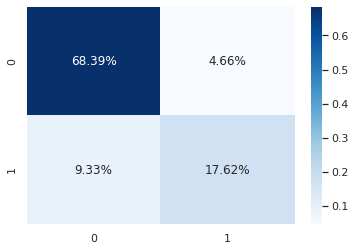

In [699]:
train_test = train_test_split(X, y, test_size=0.1, random_state=8, stratify=y, shuffle=True) 
model = Adaboost(train_test)

Adaboost is a method of ensemble learning. It is a boosting algorithm . It is very simple, no special time complexity and running time. It fits a simple model to data and predict labels. It has a good f1 score for both train and test phases and it is exact in contrast to its simplisity. It is sensitive to outliers.

To explain the whole mechanism of it:


1.   A weak classifier (e.g. a decision stump) is made on top of the training data based on the weighted samples. Here, the weights of each sample indicate how important it is to be correctly classified. Initially, for the first stump, we give all the samples equal weights.

2.    We create a decision stump for each variable and see how well each stump classifies samples to their target classes. For example, in the diagram below we check for Age, Eating Junk Food, and Exercise. We'd look at how many samples are correctly or incorrectly classified as Fit or Unfit for each individual stump.

3.    More weight is assigned to the incorrectly classified samples so that they're classified correctly in the next decision stump. Weight is also assigned to each classifier based on the accuracy of the classifier, which means high accuracy = high weight!

4.    Reiterate from Step 2 until all the data points have been correctly classified, or the maximum iteration level has been reached.




**Bagging**

In [700]:
def bagging(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    #making a pipeline for pipelining with logistic
    pipeline = make_pipeline(StandardScaler(), LogisticRegression(random_state=13))
    pipeline = pipeline.fit(X_train, y_train)
    model = BaggingClassifier(base_estimator=pipeline, n_estimators=200, max_features=20, max_samples=500, random_state=1, n_jobs=4)
    model = model.fit(X_train, y_train)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print("f1 score")
    print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
    print()
    print("accuracy")
    print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
    print()
    print("precision")
    print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
    print()
    print("recall")
    print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
    plot_confusion_matrix(y_test, y_hat_test, False)
    plot_confusion_matrix(y_test, y_hat_test, True)

f1 score
[0.9026, 0.61538] [0.89779, 0.62634]

accuracy
0.84456 0.83949

precision
[0.83234 0.92308] [0.84149 0.82918]

recall
[0.98582 0.46154] [0.96217 0.50324]


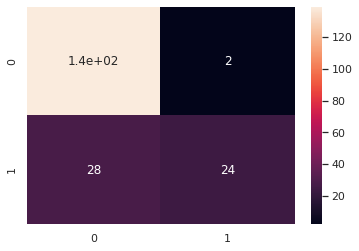

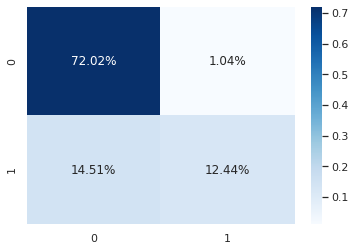

In [701]:
train_test = train_test_split(X, y, test_size=0.1, random_state= 13 , stratify=y, shuffle=True) 
model = bagging(train_test)

Bagging is a method of boosting and multiple boosting techniques are available. For example: AdaBoost, LPBoost, XGBoost, GradientBoost, BrownBoost.

We bag the data and sampling in this model has overfitting. It this model we are safe from outliers because of sampling many times and because of samples overlaping. This helps for lowering the variance and model predictions does not vary from one dataset to another so we will not face the overfitting problem. In contrast, it is possible to face underfiting ptoblem and reach high bias, because we somehow put focus on the medium data and we ignore small or large data. 
The model reached a good accuracy and it does not have that much time complexity, but it increases the complexity of the classification so time and computation can be a bit expensive.

**Random Forst**

In [702]:
def random_forest(train_test_split):
   parameters = {'k': [25 ,18 ,40 , 2, 5, 150 ,100 , 300]}
   for k in parameters['k']:
      X_train, X_test, y_train, y_test = train_test_split
      model = RandomForestClassifier(max_depth=k, random_state=13)
      model = model.fit(X_train, y_train)
      y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
      print(model)
      y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
      print("f1 score")
      print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
      print()
      print("accuracy")
      print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
      print()
      print("precision")
      print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
      print()
      print("recall")
      print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
      plot_confusion_matrix(y_test, y_hat_test, False)
      plot_confusion_matrix(y_test, y_hat_test, True) 

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.90541, 0.68889] [0.98792, 0.96544]

accuracy
0.85492 0.9821

precision
[0.86452 0.81579] [0.97689 0.9977 ]

recall
[0.95035 0.59615] [0.99921 0.93521]


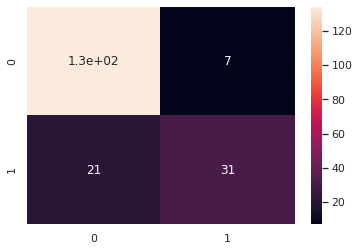

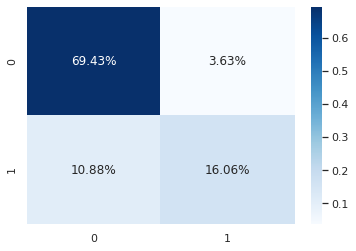

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.90102, 0.68817] [0.98563, 0.95838]

accuracy
0.84974 0.97864

precision
[0.86842 0.78049] [0.97167 1.     ]

recall
[0.93617 0.61538] [1.      0.92009]


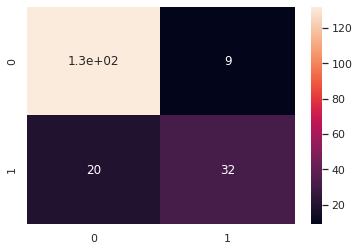

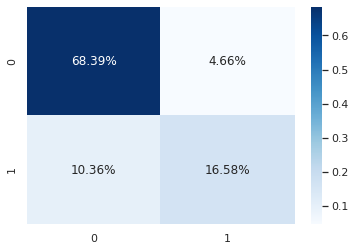

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.91582, 0.7191] [0.98792, 0.96544]

accuracy
0.87047 0.9821

precision
[0.87179 0.86486] [0.97689 0.9977 ]

recall
[0.96454 0.61538] [0.99921 0.93521]


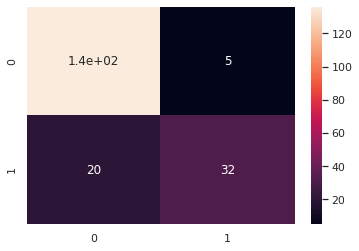

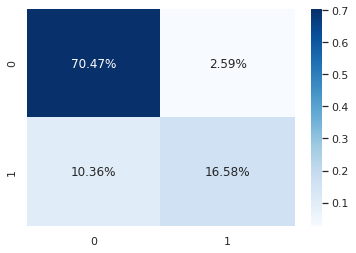

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.88125, 0.42424] [0.88221, 0.44113]

accuracy
0.80311 0.80543

precision
[0.78771 1.     ] [0.79271 0.95   ]

recall
[1.      0.26923] [0.99448 0.28726]


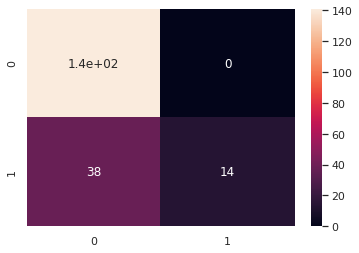

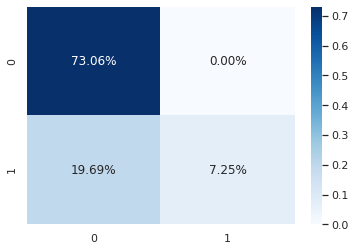

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.90492, 0.64198] [0.91834, 0.69577]

accuracy
0.84974 0.87125

precision
[0.84146 0.89655] [0.85773 0.94444]

recall
[0.97872 0.5    ] [0.98818 0.55076]


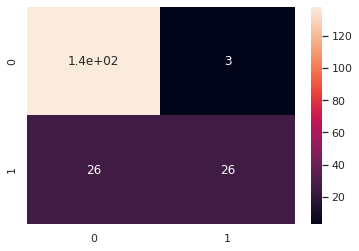

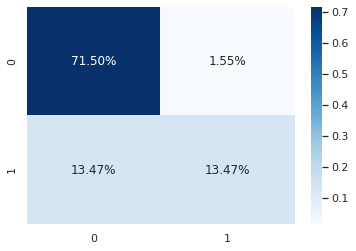

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.91582, 0.7191] [0.98792, 0.96544]

accuracy
0.87047 0.9821

precision
[0.87179 0.86486] [0.97689 0.9977 ]

recall
[0.96454 0.61538] [0.99921 0.93521]


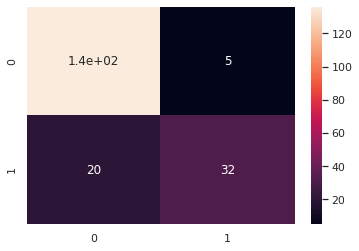

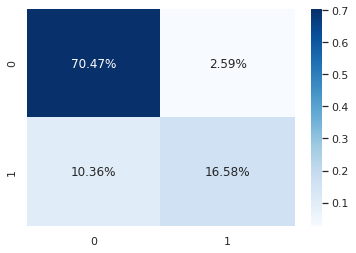

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.91582, 0.7191] [0.98792, 0.96544]

accuracy
0.87047 0.9821

precision
[0.87179 0.86486] [0.97689 0.9977 ]

recall
[0.96454 0.61538] [0.99921 0.93521]


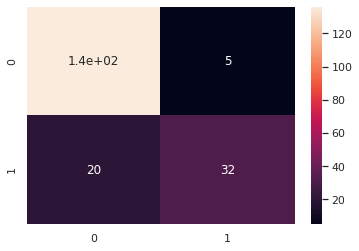

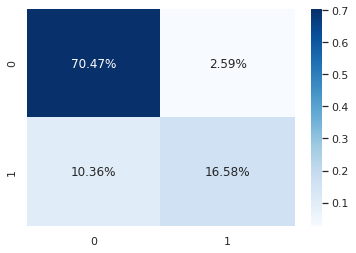

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.91582, 0.7191] [0.98792, 0.96544]

accuracy
0.87047 0.9821

precision
[0.87179 0.86486] [0.97689 0.9977 ]

recall
[0.96454 0.61538] [0.99921 0.93521]


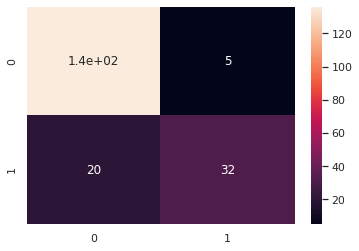

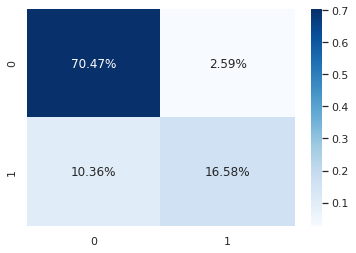

In [704]:
train_test = train_test_split(X, y, test_size=0.1, random_state= 8 , stratify=y, shuffle=True) 
model = random_forest(train_test)

It is based on the Ensemble Learning technique.
As you can see above , it has a proper F1 score and it has high bias, but it has low variance and it is a good generalization on data.

1.   This model is Robust to outliers
2.   Works well with non-linear data
3.   It creates as many trees on the subset of the data and combines the output of all the trees. In this way it reduces overfitting problem in decision trees and also reduces the variance and therefore improves the accuracy.
4.   Runs efficiently on a large dataset. but still have more time complexith than simple models.
5.   No normalization or handling nan values required.



**Naive Bayse**

In [827]:
def bernoulli_naive_bayes(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    model = BernoulliNB(alpha=5.5).fit(X_train, y_train)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print(model)
    print("f1 score")
    print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
    print()
    print("accuracy")
    print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
    print()
    print("precision")
    print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
    print()
    print("recall")
    print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
    plot_confusion_matrix(y_test, y_hat_test, False)
    plot_confusion_matrix(y_test, y_hat_test, True) 

BernoulliNB(alpha=5.5, binarize=0.0, class_prior=None, fit_prior=True)
f1 score
[0.90132, 0.63415] [0.87741, 0.52867]

accuracy
0.84456 0.80543

precision
[0.84049 0.86667] [0.81486 0.75   ]

recall
[0.97163 0.5    ] [0.95035 0.40821]


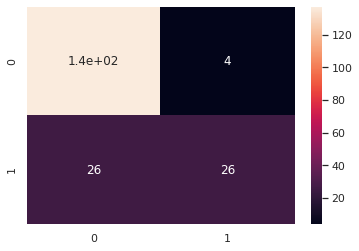

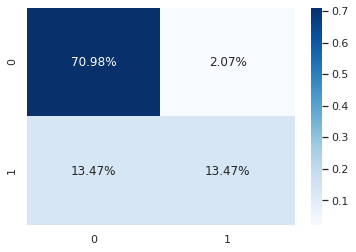

In [828]:
from sklearn.naive_bayes import BernoulliNB
train_test = train_test_split(X, y, test_size=0.1, random_state= 13 , stratify=y, shuffle=True) 
model = bernoulli_naive_bayes(train_test)

In [833]:
def gaussian_naive_bayes(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    model = GaussianNB(var_smoothing = 2.8).fit(X_train, y_train)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print(model)
    print("f1 score")
    print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
    print()
    print("accuracy")
    print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
    print()
    print("precision")
    print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
    print()
    print("recall")
    print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
    plot_confusion_matrix(y_test, y_hat_test, False)
    plot_confusion_matrix(y_test, y_hat_test, True) 

GaussianNB(priors=None, var_smoothing=2.8)
f1 score
[0.84431, 0.0] [0.84572, 0.0]

accuracy
0.73057 0.73268

precision
[0.73057 0.     ] [0.73268 0.     ]

recall
[1. 0.] [1. 0.]


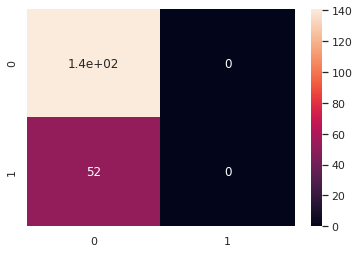

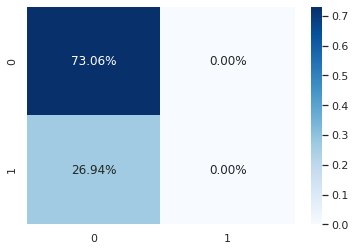

In [834]:
train_test = train_test_split(X, y, test_size=0.1, random_state= 13 , stratify=y, shuffle=True) 
model = gaussian_naive_bayes(train_test)

It is called naive because of its simplexity hypothesis, to assume data independent and ingnoring their relation.

Although it is simple, it is a good model with high f1 score. It is simple and it has different types. For example it has gaussian , bernoulli, categorical and other types.

Here as you can see the bernoulli distribution worked better than the gaussian one based on the data set. Gaussian naive baise calculate the probability of each term based on gaussian distribution and bernoulli calculates the terms based on the bernoulli distribution.

Naivebayes has a smoothing parameter alpha, which can be tuned. It is for not having 0 probabilities. To explain more, suppose that a probability of just one term in the manipulation of terms is 0, then the whole result will be equal to 0 and we will fail . but if we use smoothing and add a bit noise to the tems, I mean add 1 to the top of fraction of each term and add the total size in the bottom of each fraction, then we will get ggod result.

It can work well for categorical data too, e.g by using categorical naive baye function.

It is fast and easy with a sensible time complexity. It can also assume a prior on the classes and then predict better.


**SVM**

In [842]:
def SVM(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    for kernel in ('linear','poly', 'rbf'):
      for C in (0.1 , 1):
        for gamma in (0.1 ,1, 'auto'):
          model = svm.SVC(kernel=kernel , C= C , gamma = gamma )
          model.fit(X_train, y_train)
          y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
          print(model)
          print("f1 score")
          print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
          print()
          print("accuracy")
          print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
          print()
          print("precision")
          print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
          print()
          print("recall")
          print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
          plot_confusion_matrix(y_test, y_hat_test, False)
          plot_confusion_matrix(y_test, y_hat_test, True) 

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90789, 0.65854] [0.88713, 0.54703]

accuracy
0.85492 0.81928

precision
[0.84663 0.9    ] [0.81782 0.82895]

recall
[0.97872 0.51923] [0.96927 0.40821]


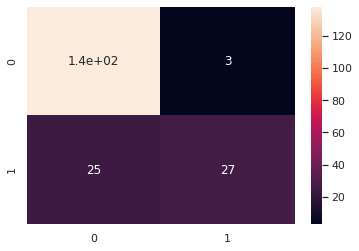

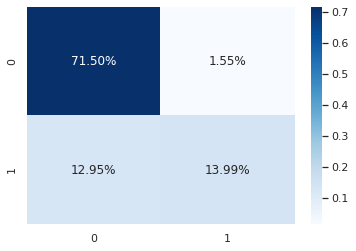

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90789, 0.65854] [0.88713, 0.54703]

accuracy
0.85492 0.81928

precision
[0.84663 0.9    ] [0.81782 0.82895]

recall
[0.97872 0.51923] [0.96927 0.40821]


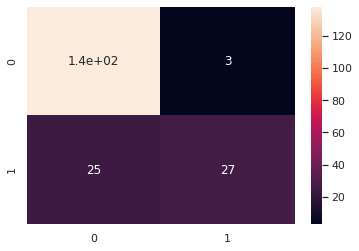

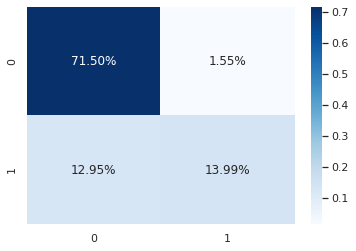

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90789, 0.65854] [0.88713, 0.54703]

accuracy
0.85492 0.81928

precision
[0.84663 0.9    ] [0.81782 0.82895]

recall
[0.97872 0.51923] [0.96927 0.40821]


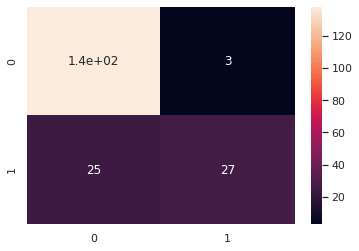

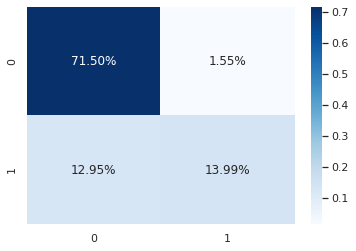

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90301, 0.66667] [0.89964, 0.61345]

accuracy
0.84974 0.84065

precision
[0.85443 0.82857] [0.83525 0.87251]

recall
[0.95745 0.55769] [0.97478 0.473  ]


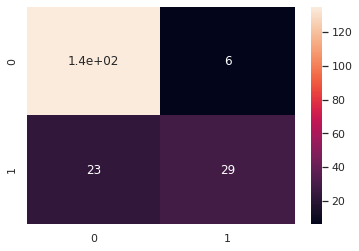

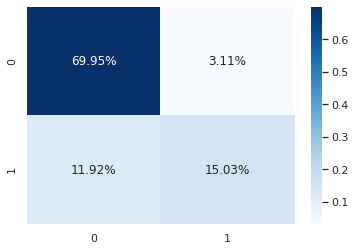

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90301, 0.66667] [0.89964, 0.61345]

accuracy
0.84974 0.84065

precision
[0.85443 0.82857] [0.83525 0.87251]

recall
[0.95745 0.55769] [0.97478 0.473  ]


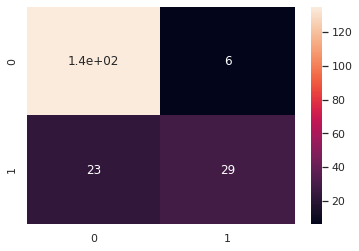

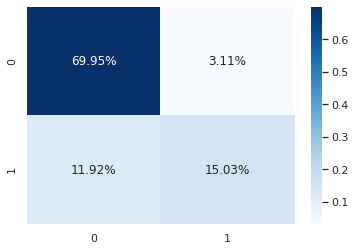

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90301, 0.66667] [0.89964, 0.61345]

accuracy
0.84974 0.84065

precision
[0.85443 0.82857] [0.83525 0.87251]

recall
[0.95745 0.55769] [0.97478 0.473  ]


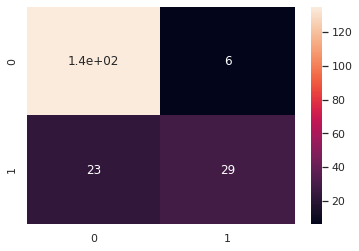

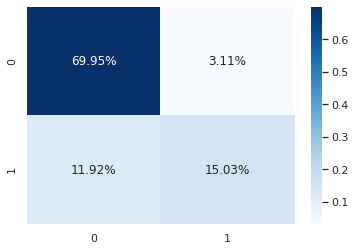

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90728, 0.66667] [0.8914, 0.58611]

accuracy
0.85492 0.82794

precision
[0.85093 0.875  ] [0.82915 0.82101]

recall
[0.97163 0.53846] [0.96375 0.45572]


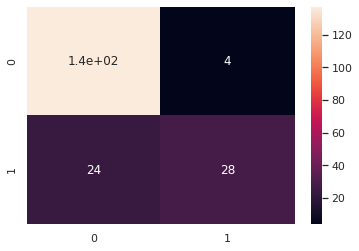

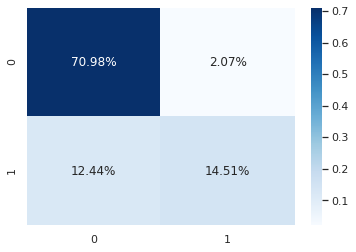

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.88055, 0.62366] [0.9269, 0.76049]

accuracy
0.81865 0.88799

precision
[0.84868 0.70732] [0.88809 0.88761]

recall
[0.91489 0.55769] [0.96927 0.66523]


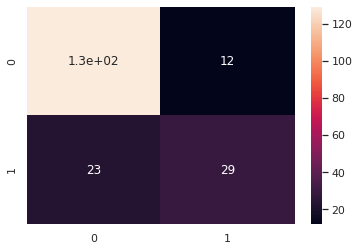

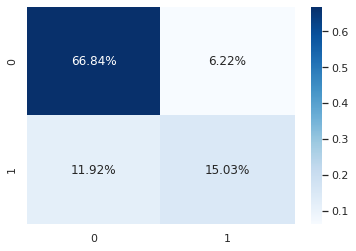

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.9085, 0.65] [0.88271, 0.50076]

accuracy
0.85492 0.81005

precision
[0.84242 0.92857] [0.80599 0.84184]

recall
[0.98582 0.5    ] [0.97557 0.35637]


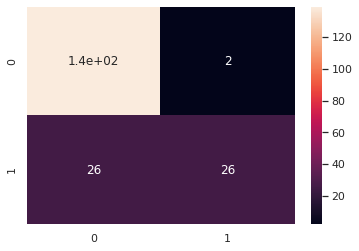

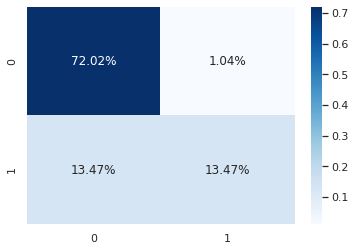

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90301, 0.66667] [0.90702, 0.65949]

accuracy
0.84974 0.85393

precision
[0.85443 0.82857] [0.84986 0.875  ]

recall
[0.95745 0.55769] [0.97242 0.52916]


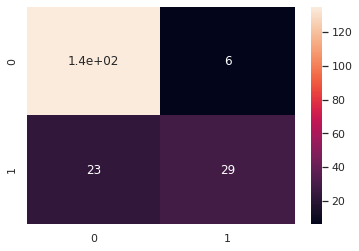

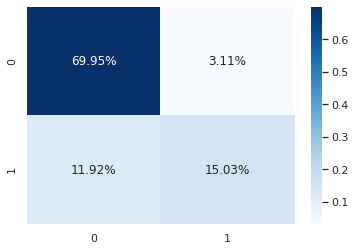

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.87671, 0.61702] [0.93881, 0.80672]

accuracy
0.81347 0.90704

precision
[0.84768 0.69048] [0.90675 0.90811]

recall
[0.9078  0.55769] [0.97321 0.7257 ]


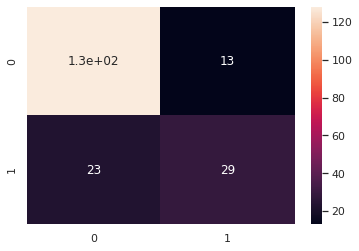

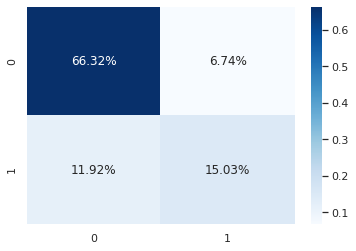

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90365, 0.65882] [0.88962, 0.57858]

accuracy
0.84974 0.82506

precision
[0.85    0.84848] [0.82724 0.8125 ]

recall
[0.96454 0.53846] [0.96217 0.44924]


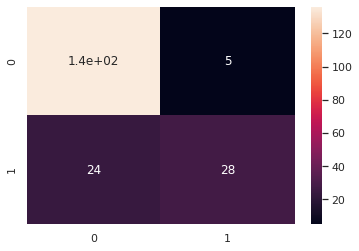

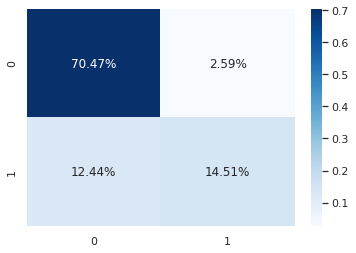

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.9026, 0.61538] [0.87676, 0.4391]

accuracy
0.84456 0.79792

precision
[0.83234 0.92308] [0.79249 0.85093]

recall
[0.98582 0.46154] [0.98109 0.2959 ]


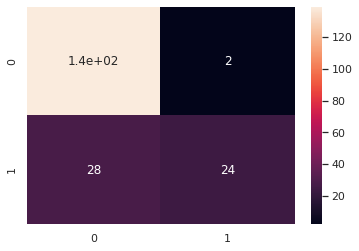

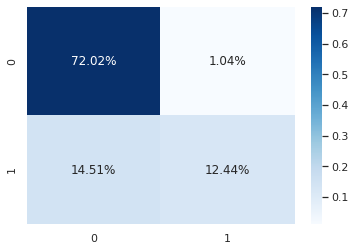

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
f1 score
[0.84431, 0.0] [0.84572, 0.0]

accuracy
0.73057 0.73268

precision
[0.73057 0.     ] [0.73268 0.     ]

recall
[1. 0.] [1. 0.]


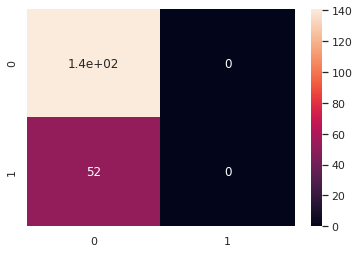

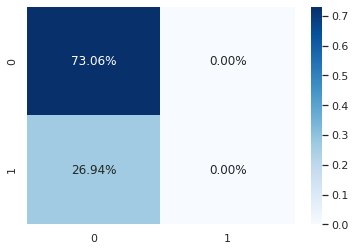

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.88818, 0.52055] [0.87029, 0.37584]

accuracy
0.81865 0.78522

precision
[0.80814 0.90476] [0.78049 0.84211]

recall
[0.98582 0.36538] [0.98345 0.2419 ]


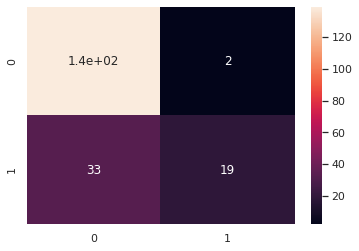

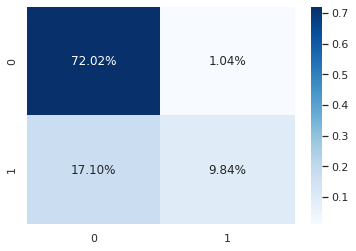

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90301, 0.66667] [0.89018, 0.57703]

accuracy
0.84974 0.82564

precision
[0.85443 0.82857] [0.82647 0.82072]

recall
[0.95745 0.55769] [0.96454 0.44492]


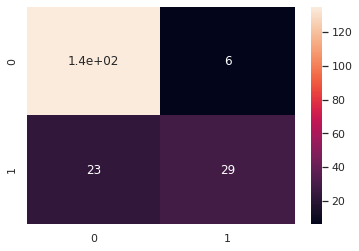

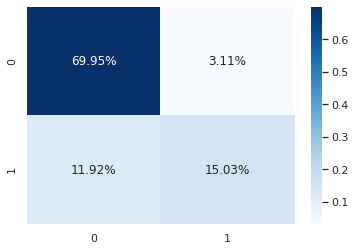

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
f1 score
[0.89116, 0.65217] [0.92262, 0.73196]

accuracy
0.8342 0.87991

precision
[0.85621 0.75   ] [0.87385 0.90735]

recall
[0.92908 0.57692] [0.97715 0.61339]


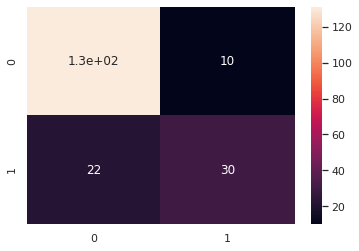

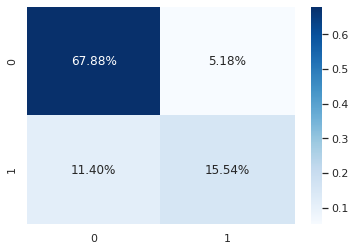

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90429, 0.6506] [0.88496, 0.53835]

accuracy
0.84974 0.81582

precision
[0.84568 0.87097] [0.81582 0.81579]

recall
[0.97163 0.51923] [0.9669  0.40173]


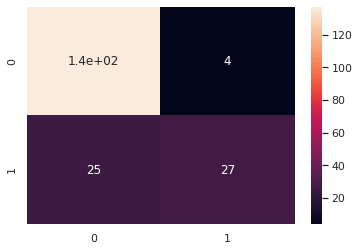

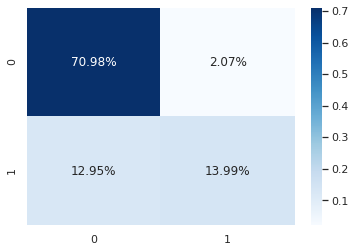

In [843]:
train_test = train_test_split(X, y, test_size=0.1, random_state= 1 , stratify=y, shuffle=True) 
model = SVM(train_test)

SVM is a complicated model. I guess for this small dataset it is more than enough. It takes longer time to execute rather than previous models. It predicts good and has high f1 score.

It uses little memory so within high dimentional spaces, it is efficient. 

It is sensitive to outliers and it can reduce its accuracy.

It has different parameters to set and I test some different states.

To explain more, a support-vector machine (SVM) constructs a hyperplane or set of hyperplanes in a high- or infinite-dimensional space, which can be used for classification, regression, or other tasks like outliers detection. Intuitively, a good separation is achieved by the hyperplane that has the largest distance to the nearest training-data point of any class (so-called functional margin), since in general the larger the margin, the lower the generalization error of the classifier.

Best parameters were kernel = linear, C = gamma = 0.1

Pros in general:
SVM works relatively well when there is a clear margin of separation between classes.

SVM is more effective in high dimensional spaces and also memory efficient as mentioned before.

SVM is effective in cases where the number of dimensions is greater than the number of samples.

Cons:

SVM algorithm is not suitable for large data sets.

SVM does not perform very well when the data set has more noise i.e. target classes are overlapping.

In cases where the number of features for each data point exceeds the number of training data samples, the SVM will underperform.

As the support vector classifier works by putting data points, above and below the classifying hyperplane there is no probabilistic explanation for the classification.

**Nueral Network(Multilayer Perceptron)**

In [895]:
parameters = {'solver': ['adam'], 'activation': ['tanh', 'logistic'], 'max_iter': [1000, 1500], 'alpha': 10.0 ** -np.arange(0, 3), 'hidden_layer_sizes':np.arange(30, 60, 5), 'random_state':[0]}
def nueral_network(train_test_split):
    X_train, X_test, y_train, y_test = train_test_split
    model = MLPClassifier()
    model = GridSearchCV(model, parameters, n_jobs=-1)
    model.fit(X_train, y_train)
    y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
    print(model)
    print("f1 score")
    print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
    print()
    print("accuracy")
    print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
    print()
    print("precision")
    print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
    print()
    print("recall")
    print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
    plot_confusion_matrix(y_test, y_hat_test, False)
    plot_confusion_matrix(y_test, y_hat_test, True) 

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

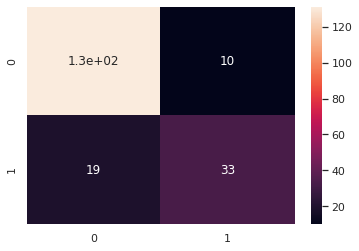

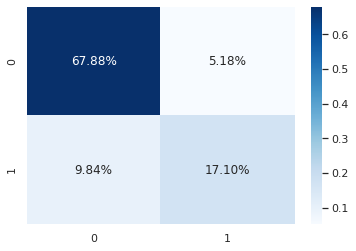

In [896]:
train_test = train_test_split(X, y, test_size=0.1, random_state= 1 , stratify=y, shuffle=True) 
model = nueral_network(train_test)

As expected, the nueral network model took a long time to execute because it is complicated and for such a small dataset, it is not that much proper.

I tested many parameters to find the best F1scoe. 

Nueral networks(based on multilayer perceptrons that each perceptron seperate the space into two sections) are complicated, need a lot of memory and have high time complexity.

It need a lot of time to be trained and it may cause overfitting on small datasets. It has low variance and somehow high bias.

Pros:

Generally ,neural networks are flexible and can be used for both regression and classification problems. Any data which can be made numeric can be used in the model, as neural network is a mathematical model with approximation functions.

Neural networks are good to model with nonlinear data with large number of inputs; for example, images. It is reliable in an approach of tasks involving many features. It works by splitting the problem of classification into a layered network of simpler elements.

Once trained, the predictions are pretty fast.

Neural networks can be trained with any number of inputs and layers.

Neural networks work best with more data points.

Cons:
Neural networks are black boxes, meaning we cannot know how much each independent variable is influencing the dependent variables.

It is computationally very expensive and time consuming to train with traditional CPUs.

Neural networks depend a lot on training data. This leads to the problem of over-fitting and generalization. The mode relies more on the training data and may be tuned to the data.

**KNN**

In [924]:
def KNN(kfold,X ,y):
    parameters = {'k': [12 ,2, 5, 15 ,30 ,100]}
    for k in parameters['k']:
      for train_index, test_index in kfold.split(X):
          X_train, X_test, y_train, y_test = X[train_index], X[test_index] , y[train_index], y[test_index]
          neighbour = KNeighborsClassifier(n_neighbors=k)
          neighbour.fit(X_train, y_train)
          y_hat_train, y_hat_test = neighbour.predict(X_train), neighbour.predict(X_test)
          k += 1
          print(model)
          print("f1 score")
          print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
          print()
          print("accuracy")
          print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
          print()
          print("precision")
          print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
          print()
          print("recall")
          print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
          plot_confusion_matrix(y_test, y_hat_test, False)
          plot_confusion_matrix(y_test, y_hat_test, True)

None
f1 score
[0.89744, 0.56757] [0.89235, 0.57872]

accuracy
0.8342 0.82852

precision
[0.84337 0.77778] [0.82341 0.86076]

recall
[0.9589  0.44681] [0.97389 0.4359 ]


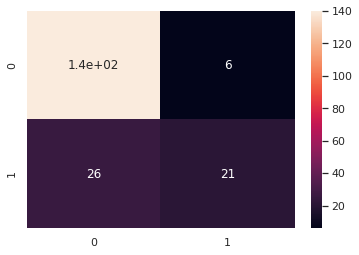

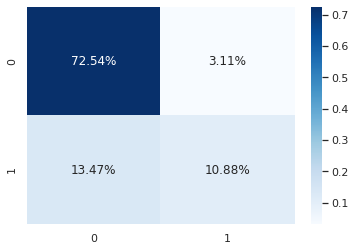

None
f1 score
[0.86577, 0.54545] [0.89833, 0.60563]

accuracy
0.79275 0.83834

precision
[0.78182 0.85714] [0.83751 0.84314]

recall
[0.96992 0.4    ] [0.96868 0.47253]


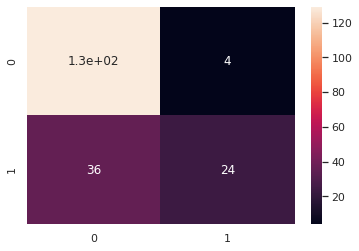

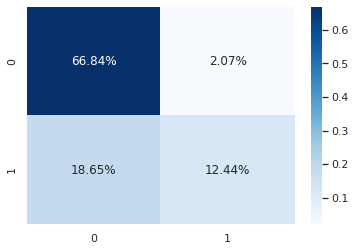

None
f1 score
[0.83871, 0.57944] [0.89868, 0.57824]

accuracy
0.76684 0.83661

precision
[0.74522 0.86111] [0.83389 0.85463]

recall
[0.95902 0.43662] [0.97438 0.43694]


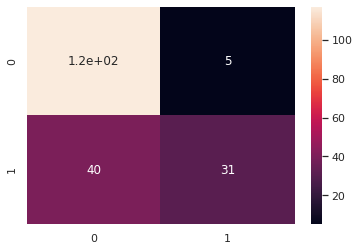

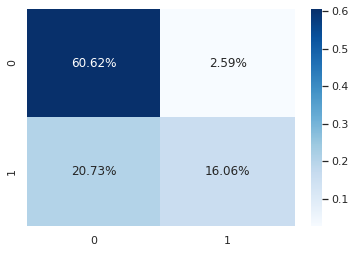

None
f1 score
[0.89542, 0.6] [0.89673, 0.60224]

accuracy
0.8342 0.83603

precision
[0.8303  0.85714] [0.83255 0.85657]

recall
[0.97163 0.46154] [0.97163 0.46436]


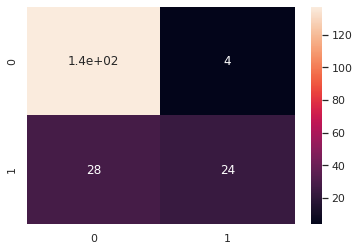

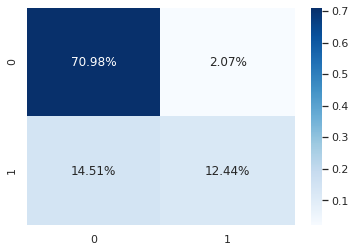

None
f1 score
[0.90798, 0.5] [0.89424, 0.59834]

accuracy
0.84456 0.83256

precision
[0.85549 0.75   ] [0.82559 0.87449]

recall
[0.96732 0.375  ] [0.97534 0.45474]


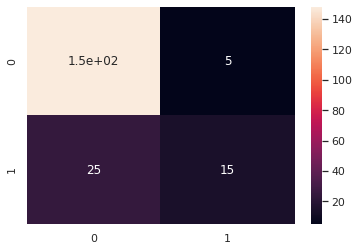

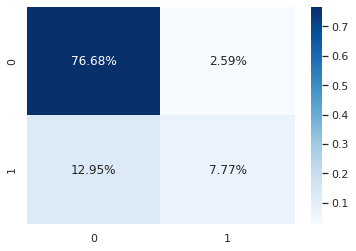

None
f1 score
[0.88158, 0.55] [0.89506, 0.58009]

accuracy
0.8125 0.83208

precision
[0.8024 0.88  ] [0.82733 0.86266]

recall
[0.9781 0.4   ] [0.97486 0.43696]


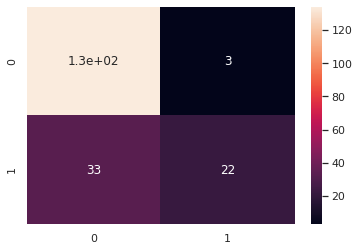

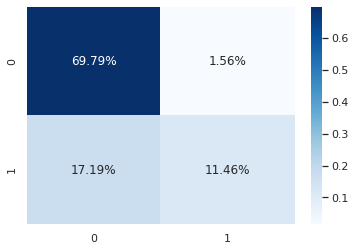

None
f1 score
[0.88079, 0.56098] [0.8932, 0.56642]

accuracy
0.8125 0.82862

precision
[0.80606 0.85185] [0.82361 0.86222]

recall
[0.9708  0.41818] [0.97565 0.42174]


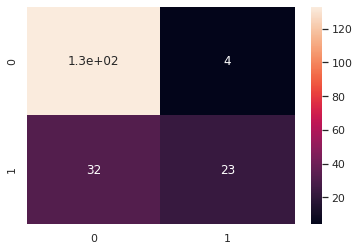

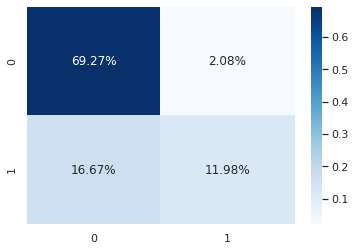

None
f1 score
[0.87578, 0.35484] [0.8947, 0.5927]

accuracy
0.79167 0.83266

precision
[0.79213 0.78571] [0.82796 0.86122]

recall
[0.97917 0.22917] [0.97314 0.45182]


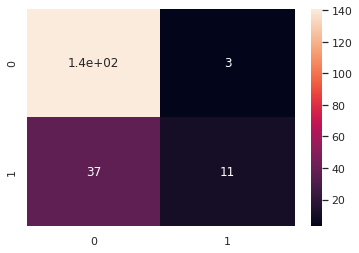

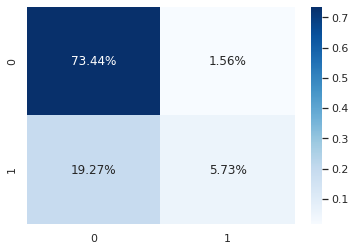

None
f1 score
[0.91641, 0.55738] [0.88696, 0.55807]

accuracy
0.85938 0.81997

precision
[0.88623 0.68   ] [0.81275 0.86784]

recall
[0.94872 0.47222] [0.97608 0.41127]


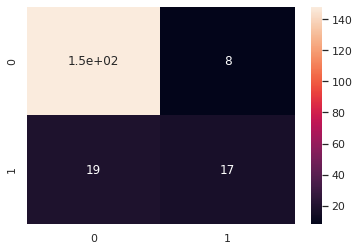

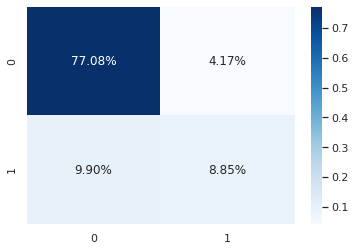

None
f1 score
[0.89902, 0.5974] [0.89178, 0.57468]

accuracy
0.83854 0.82747

precision
[0.83133 0.88462] [0.82463 0.84519]

recall
[0.97872 0.45098] [0.97084 0.43534]


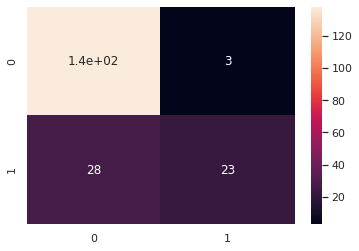

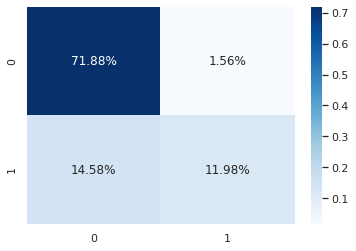

None
f1 score
[0.8961, 0.58974] [0.91894, 0.68724]

accuracy
0.8342 0.87125

precision
[0.85185 0.74194] [0.85003 1.     ]

recall
[0.94521 0.48936] [1.     0.5235]


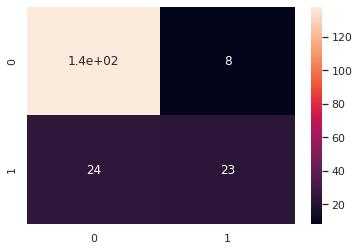

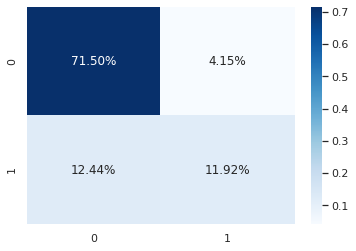

None
f1 score
[0.83162, 0.48421] [0.92273, 0.75747]

accuracy
0.74611 0.88279

precision
[0.76582 0.65714] [0.89778 0.82984]

recall
[0.90977 0.38333] [0.9491 0.6967]


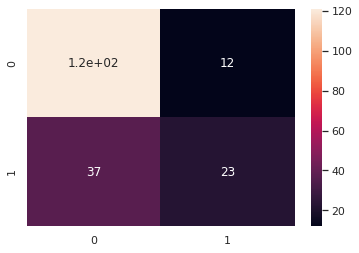

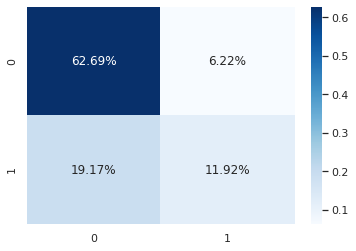

None
f1 score
[0.84477, 0.6055] [0.91484, 0.65198]

accuracy
0.7772 0.86316

precision
[0.75484 0.86842] [0.85151 0.93671]

recall
[0.95902 0.46479] [0.98835 0.5    ]


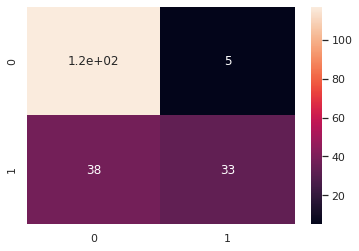

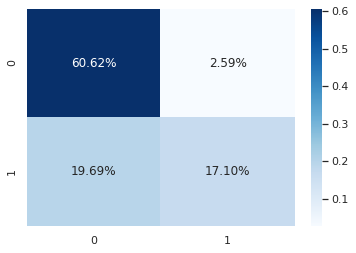

None
f1 score
[0.89037, 0.61176] [0.9099, 0.68318]

accuracy
0.82902 0.8597

precision
[0.8375  0.78788] [0.85924 0.86184]

recall
[0.95035 0.5    ] [0.9669  0.56587]


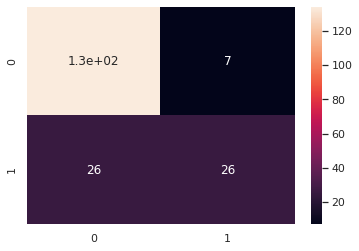

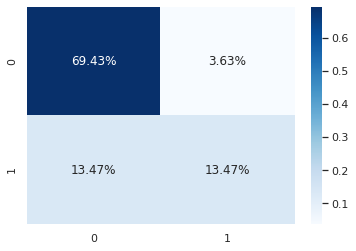

None
f1 score
[0.90159, 0.56338] [0.90062, 0.63229]

accuracy
0.83938 0.84353

precision
[0.87654 0.64516] [0.83537 0.88931]

recall
[0.9281 0.5   ] [0.97693 0.49053]


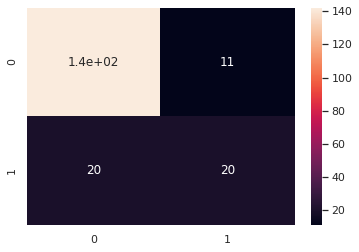

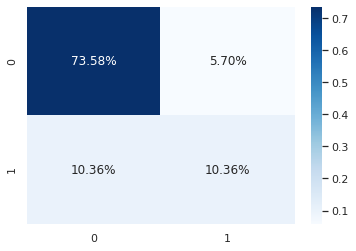

None
f1 score
[0.88, 0.57143] [0.90096, 0.64737]

accuracy
0.8125 0.84535

precision
[0.80982 0.82759] [0.85066 0.82   ]

recall
[0.9635  0.43636] [0.95758 0.53478]


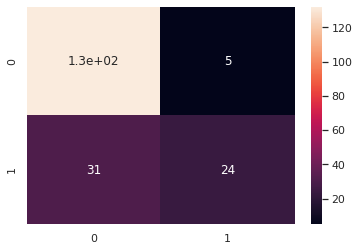

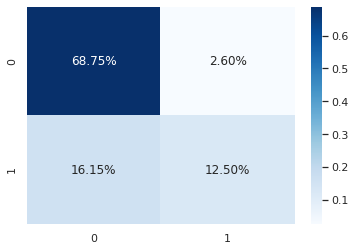

None
f1 score
[0.87542, 0.57471] [0.8991, 0.602]

accuracy
0.80729 0.83901

precision
[0.8125  0.78125] [0.83311 0.87552]

recall
[0.94891 0.45455] [0.97643 0.4587 ]


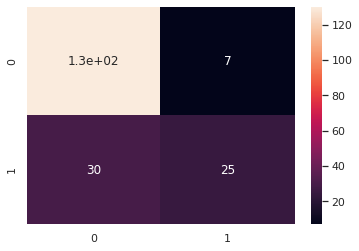

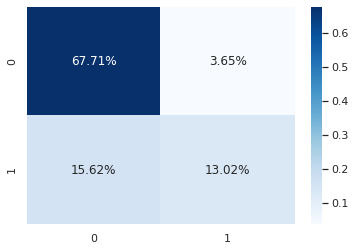

None
f1 score
[0.87342, 0.41176] [0.90148, 0.65274]

accuracy
0.79167 0.84651

precision
[0.80233 0.7    ] [0.84868 0.83612]

recall
[0.95833 0.29167] [0.9613  0.53533]


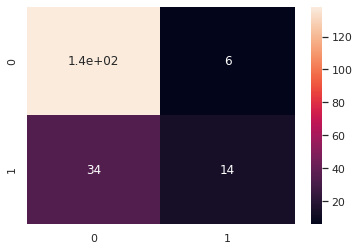

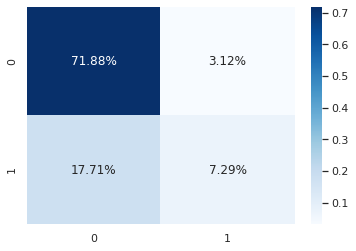

None
f1 score
[0.92025, 0.55172] [0.8937, 0.60705]

accuracy
0.86458 0.83266

precision
[0.88235 0.72727] [0.827   0.86486]

recall
[0.96154 0.44444] [0.97209 0.46764]


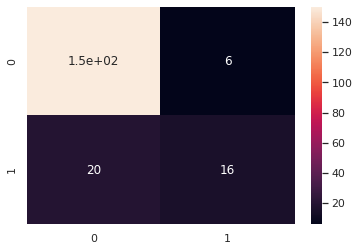

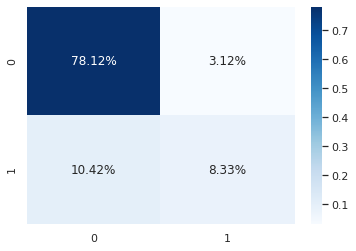

None
f1 score
[0.89474, 0.6] [0.89978, 0.6383]

accuracy
0.83333 0.84305

precision
[0.83436 0.82759] [0.84498 0.83333]

recall
[0.96454 0.47059] [0.96217 0.51724]


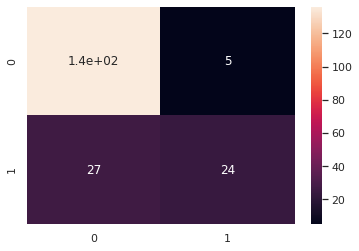

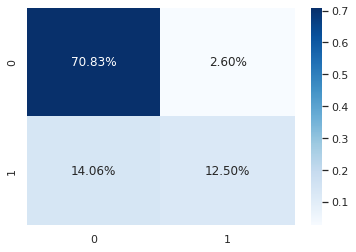

None
f1 score
[0.90066, 0.64286] [0.90909, 0.68718]

accuracy
0.84456 0.85912

precision
[0.87179 0.72973] [0.85915 0.85897]

recall
[0.93151 0.57447] [0.96519 0.57265]


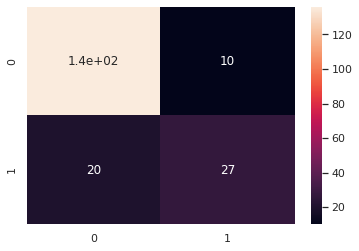

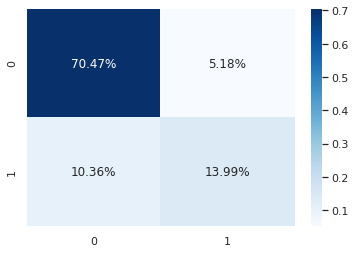

None
f1 score
[0.85149, 0.45783] [0.91094, 0.65638]

accuracy
0.76684 0.85855

precision
[0.75882 0.82609] [0.85007 0.90698]

recall
[0.96992 0.31667] [0.98121 0.51429]


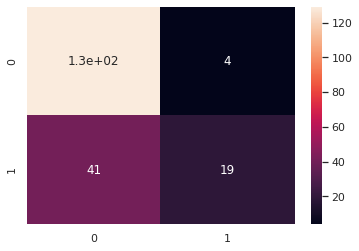

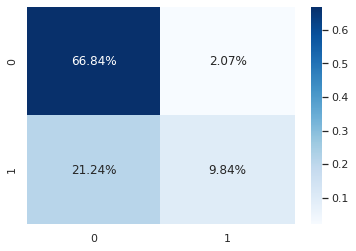

None
f1 score
[0.84672, 0.625] [0.91002, 0.65647]

accuracy
0.78238 0.85739

precision
[0.76316 0.85366] [0.85724 0.85818]

recall
[0.95082 0.49296] [0.96972 0.53153]


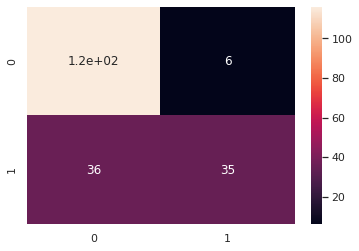

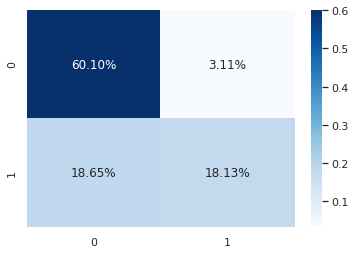

None
f1 score
[0.88103, 0.50667] [0.89967, 0.60597]

accuracy
0.80829 0.84007

precision
[0.80588 0.82609] [0.83244 0.8875 ]

recall
[0.97163 0.36538] [0.97872 0.46004]


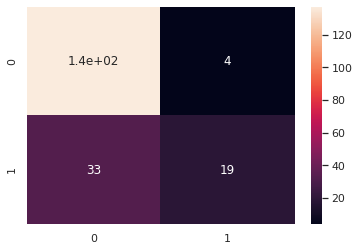

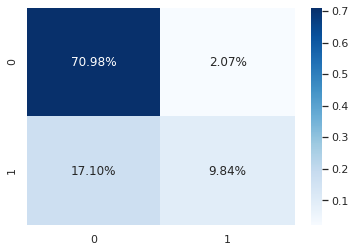

None
f1 score
[0.90446, 0.58333] [0.89788, 0.64332]

accuracy
0.84456 0.84122

precision
[0.88199 0.65625] [0.84192 0.83784]

recall
[0.9281 0.525 ] [0.96181 0.52211]


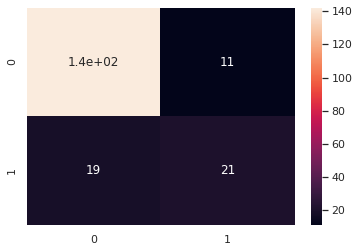

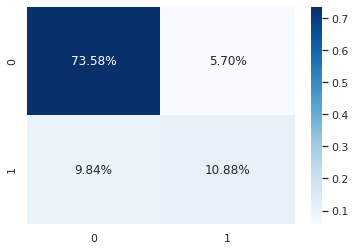

None
f1 score
[0.88525, 0.55696] [0.895, 0.58807]

accuracy
0.81771 0.83266

precision
[0.80357 0.91667] [0.83009 0.84836]

recall
[0.9854 0.4   ] [0.97093 0.45   ]


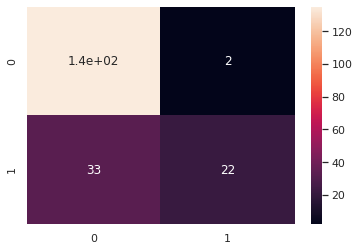

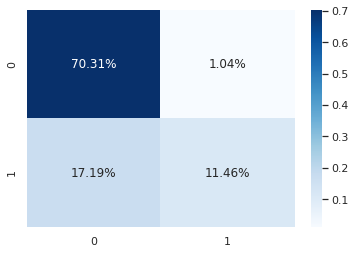

None
f1 score
[0.87919, 0.5814] [0.90455, 0.6496]

accuracy
0.8125 0.84997

precision
[0.81366 0.80645] [0.84907 0.85461]

recall
[0.9562  0.45455] [0.96779 0.52391]


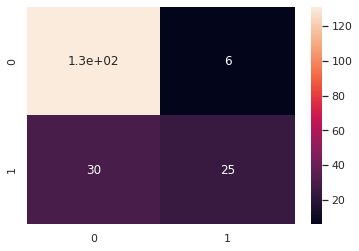

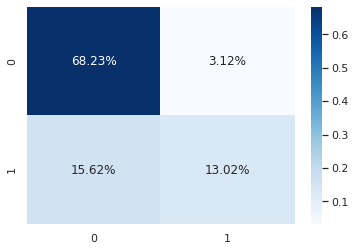

None
f1 score
[0.87774, 0.4] [0.89502, 0.59467]

accuracy
0.79688 0.83324

precision
[0.8     0.76471] [0.82851 0.86179]

recall
[0.97222 0.27083] [0.97314 0.45396]


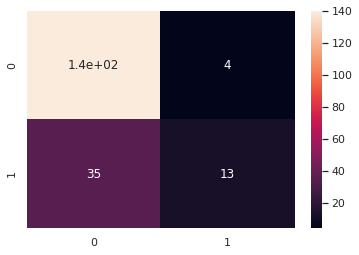

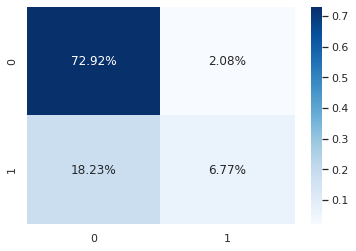

None
f1 score
[0.91925, 0.58065] [0.8966, 0.63061]

accuracy
0.86458 0.83843

precision
[0.89157 0.69231] [0.83494 0.85663]

recall
[0.94872 0.5    ] [0.9681  0.49896]


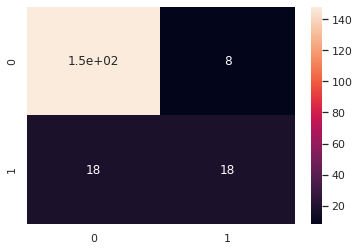

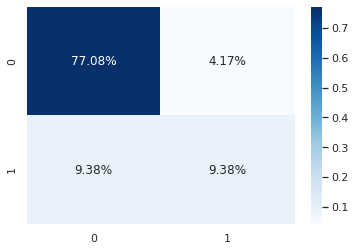

None
f1 score
[0.89902, 0.5974] [0.89373, 0.58674]

accuracy
0.83854 0.83093

precision
[0.83133 0.88462] [0.82796 0.84898]

recall
[0.97872 0.45098] [0.97084 0.44828]


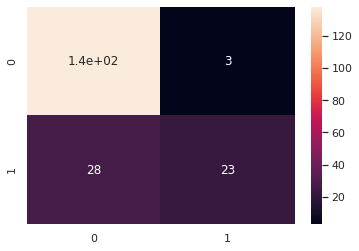

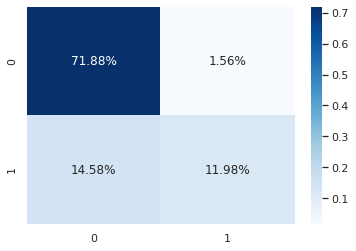

None
f1 score
[0.8961, 0.58974] [0.89585, 0.60167]

accuracy
0.8342 0.83487

precision
[0.85185 0.74194] [0.82996 0.864  ]

recall
[0.94521 0.48936] [0.9731  0.46154]


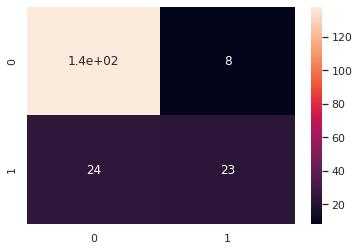

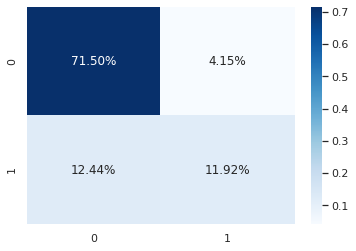

None
f1 score
[0.84868, 0.43902] [0.89415, 0.56425]

accuracy
0.76166 0.82968

precision
[0.75439 0.81818] [0.82517 0.86036]

recall
[0.96992 0.3    ] [0.97572 0.41978]


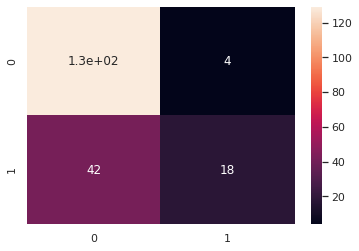

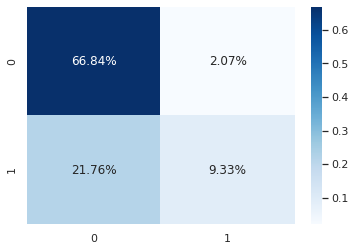

None
f1 score
[0.83453, 0.57407] [0.89892, 0.5816]

accuracy
0.76166 0.83718

precision
[0.74359 0.83784] [0.83489 0.85217]

recall
[0.95082 0.43662] [0.9736  0.44144]


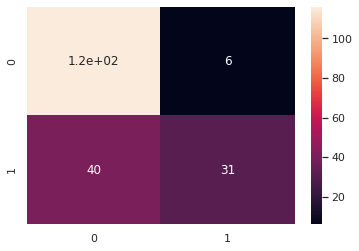

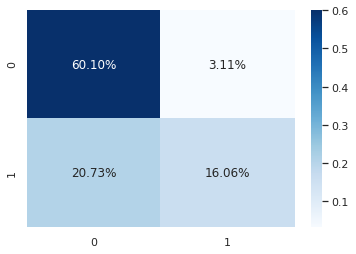

None
f1 score
[0.8961, 0.58974] [0.89257, 0.56812]

accuracy
0.8342 0.82794

precision
[0.82635 0.88462] [0.82259 0.86344]

recall
[0.97872 0.44231] [0.97557 0.42333]


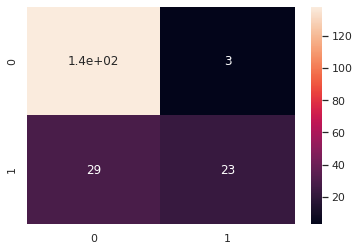

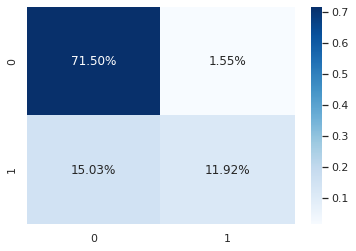

None
f1 score
[0.90462, 0.4918] [0.891, 0.59178]

accuracy
0.83938 0.82794

precision
[0.85465 0.71429] [0.82464 0.84706]

recall
[0.96078 0.375  ] [0.96897 0.45474]


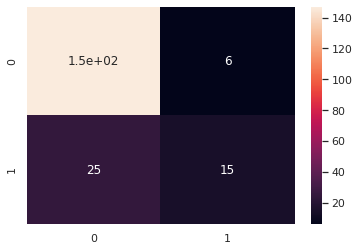

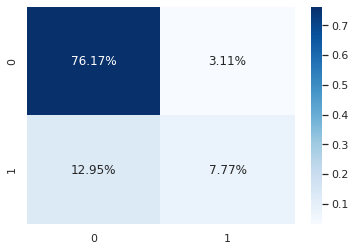

None
f1 score
[0.88235, 0.53846] [0.89024, 0.54111]

accuracy
0.8125 0.82285

precision
[0.79882 0.91304] [0.81693 0.86603]

recall
[0.9854  0.38182] [0.978   0.39348]


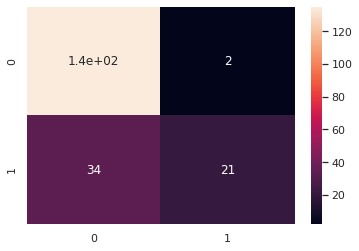

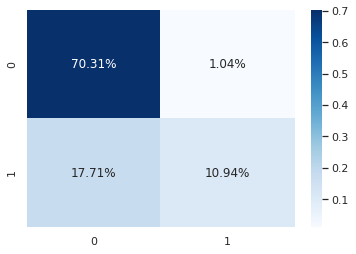

None
f1 score
[0.88963, 0.61176] [0.89489, 0.57558]

accuracy
0.82812 0.83151

precision
[0.82099 0.86667] [0.82591 0.86842]

recall
[0.9708  0.47273] [0.97643 0.43043]


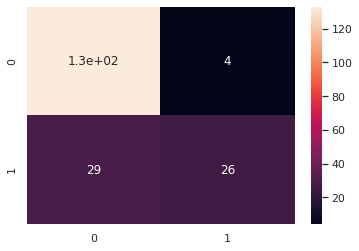

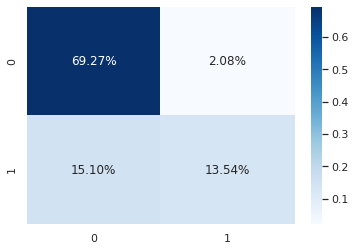

None
f1 score
[0.87307, 0.32787] [0.89097, 0.56609]

accuracy
0.78646 0.82574

precision
[0.78771 0.76923] [0.82048 0.86026]

recall
[0.97917 0.20833] [0.97472 0.42184]


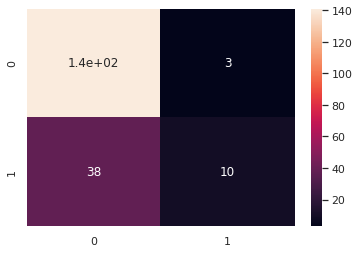

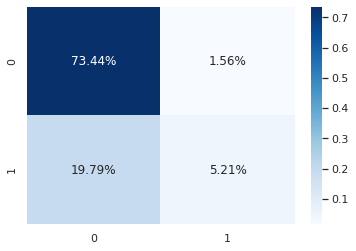

None
f1 score
[0.9226, 0.59016] [0.88824, 0.57302]

accuracy
0.86979 0.82285

precision
[0.89222 0.72   ] [0.81715 0.85833]

recall
[0.95513 0.5    ] [0.97289 0.43006]


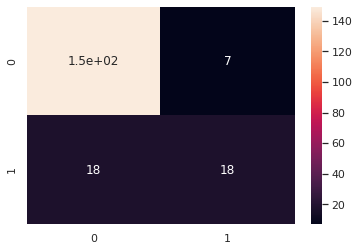

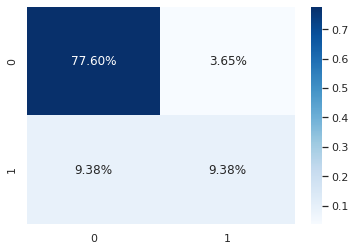

None
f1 score
[0.8961, 0.57895] [0.8912, 0.55507]

accuracy
0.83333 0.82516

precision
[0.82635 0.88   ] [0.8186  0.87097]

recall
[0.97872 0.43137] [0.97794 0.40733]


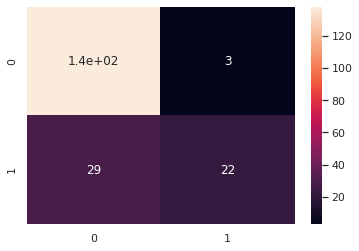

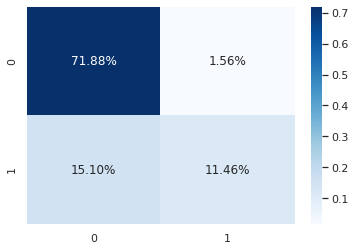

None
f1 score
[0.90506, 0.57143] [0.88785, 0.53492]

accuracy
0.84456 0.81928

precision
[0.84118 0.86957] [0.81139 0.87805]

recall
[0.97945 0.42553] [0.98022 0.38462]


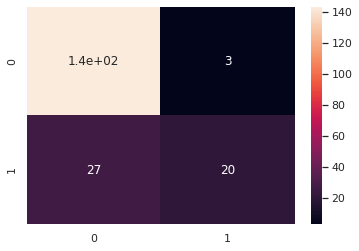

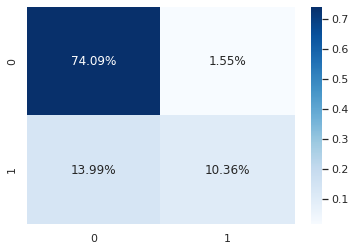

None
f1 score
[0.83766, 0.35897] [0.89675, 0.56541]

accuracy
0.74093 0.83314

precision
[0.73714 0.77778] [0.82457 0.89524]

recall
[0.96992 0.23333] [0.98277 0.41319]


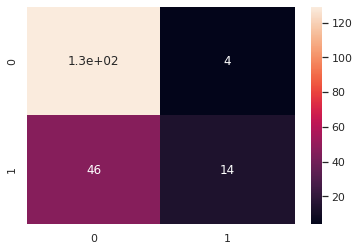

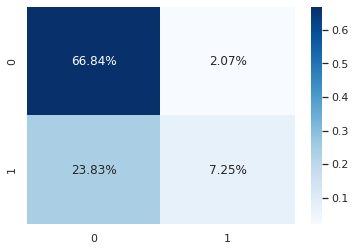

None
f1 score
[0.82927, 0.50505] [0.89329, 0.52366]

accuracy
0.74611 0.82564

precision
[0.72121 0.89286] [0.81971 0.87368]

recall
[0.97541 0.35211] [0.98137 0.37387]


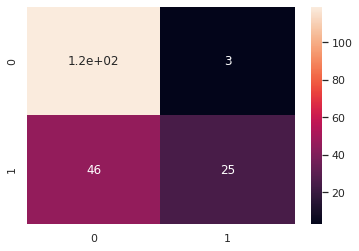

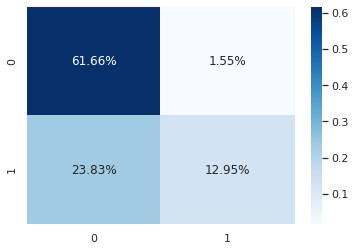

None
f1 score
[0.9026, 0.61538] [0.88945, 0.53812]

accuracy
0.84456 0.82159

precision
[0.83234 0.92308] [0.81455 0.87379]

recall
[0.98582 0.46154] [0.97951 0.38877]


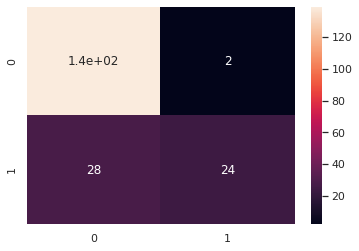

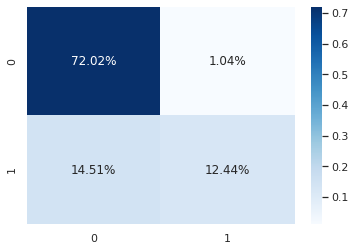

None
f1 score
[0.91925, 0.59375] [0.88618, 0.53314]

accuracy
0.86528 0.81697

precision
[0.87574 0.79167] [0.80759 0.88725]

recall
[0.96732 0.475  ] [0.9817  0.38105]


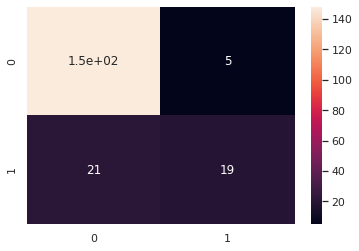

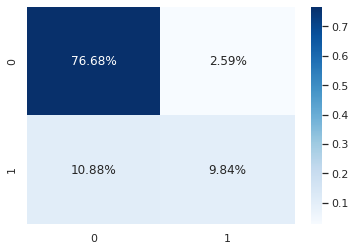

None
f1 score
[0.88673, 0.53333] [0.88976, 0.53394]

accuracy
0.81771 0.8217

precision
[0.79651 1.     ] [0.81503 0.87192]

recall
[1.      0.36364] [0.97958 0.38478]


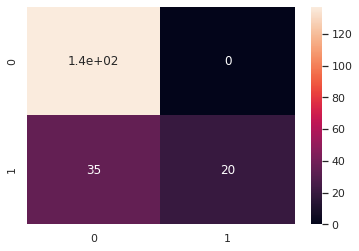

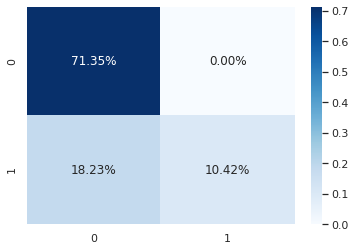

None
f1 score
[0.87869, 0.53165] [0.88944, 0.52374]

accuracy
0.80729 0.82054

precision
[0.79762 0.875  ] [0.81234 0.88601]

recall
[0.9781  0.38182] [0.98272 0.37174]


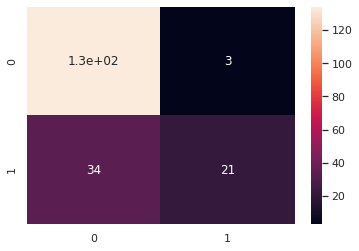

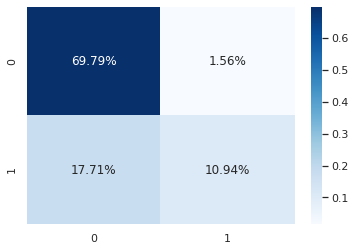

None
f1 score
[0.87926, 0.36066] [0.89088, 0.55294]

accuracy
0.79688 0.82458

precision
[0.7933  0.84615] [0.81645 0.88263]

recall
[0.98611 0.22917] [0.98025 0.40257]


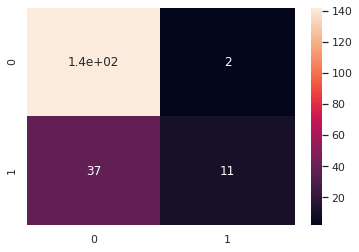

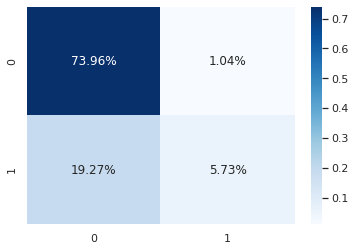

None
f1 score
[0.92355, 0.5614] [0.88474, 0.52863]

accuracy
0.86979 0.81477

precision
[0.88304 0.7619 ] [0.8047  0.89109]

recall
[0.96795 0.44444] [0.98246 0.37578]


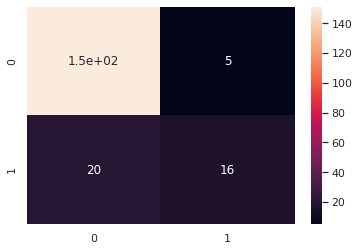

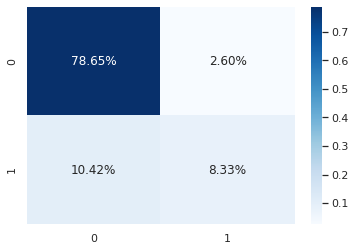

None
f1 score
[0.89677, 0.56757] [0.88516, 0.5136]

accuracy
0.83333 0.8142

precision
[0.82249 0.91304] [0.80847 0.85859]

recall
[0.98582 0.41176] [0.97794 0.36638]


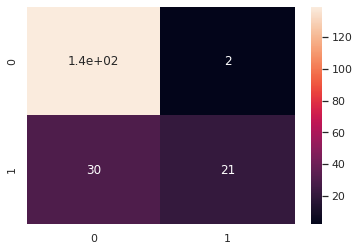

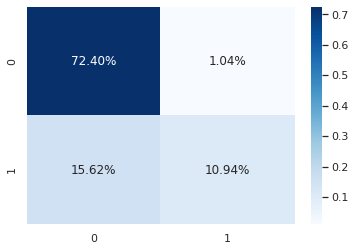

None
f1 score
[0.90402, 0.50794] [0.87171, 0.36207]

accuracy
0.83938 0.78637

precision
[0.82486 1.     ] [0.77593 0.9375 ]

recall
[1.      0.34043] [0.99446 0.22436]


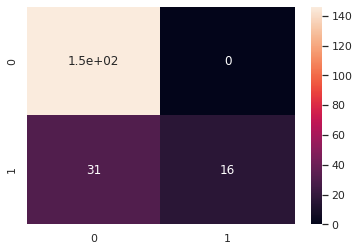

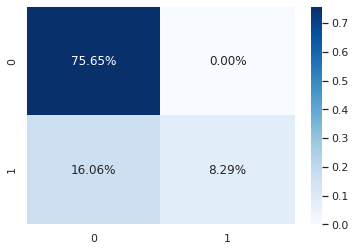

None
f1 score
[0.83648, 0.23529] [0.87859, 0.38743]

accuracy
0.73057 0.79734

precision
[0.71892 1.     ] [0.78686 0.94068]

recall
[1.      0.13333] [0.99452 0.24396]


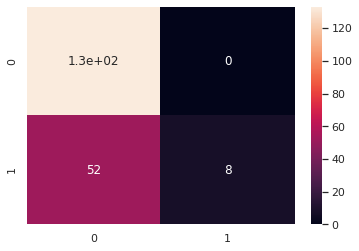

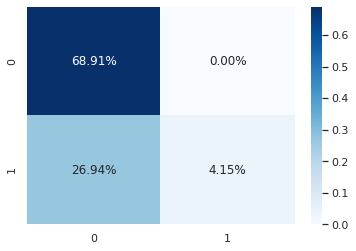

None
f1 score
[0.81081, 0.37778] [0.88088, 0.37024]

accuracy
0.70984 0.79965

precision
[0.68966 0.89474] [0.78954 0.95327]

recall
[0.98361 0.23944] [0.99612 0.22973]


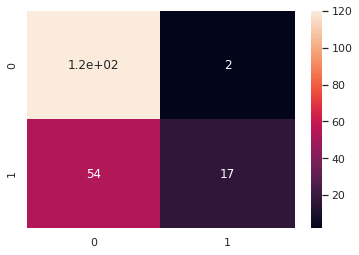

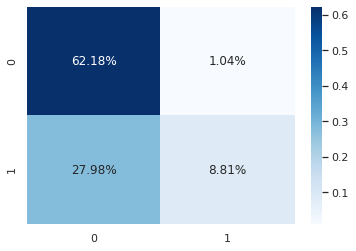

None
f1 score
[0.88125, 0.42424] [0.87215, 0.35088]

accuracy
0.80311 0.78637

precision
[0.78771 1.     ] [0.77662 0.93458]

recall
[1.      0.26923] [0.99448 0.21598]


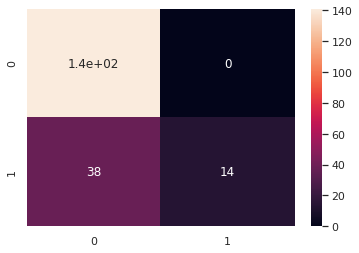

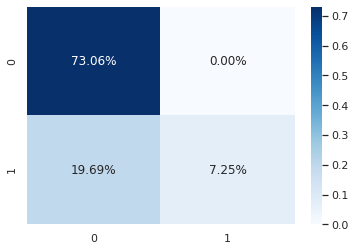

None
f1 score
[0.91566, 0.48148] [0.86996, 0.36395]

accuracy
0.85492 0.78406

precision
[0.84916 0.92857] [0.7727 0.9469]

recall
[0.99346 0.325  ] [0.99523 0.22526]


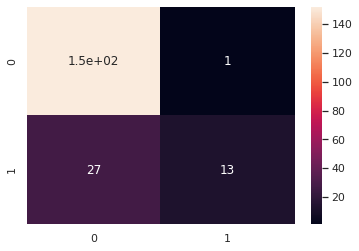

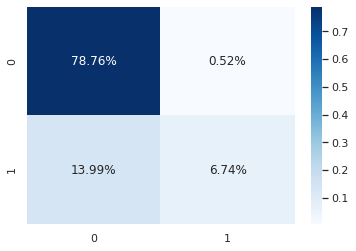

None
f1 score
[0.86435, 0.35821] [0.87552, 0.37282]

accuracy
0.77604 0.79227

precision
[0.76111 1.     ] [0.78196 0.9386 ]

recall
[1.      0.21818] [0.9945  0.23261]


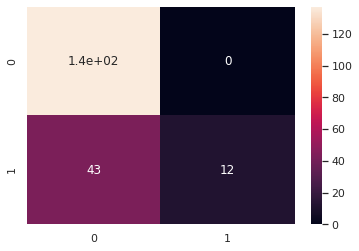

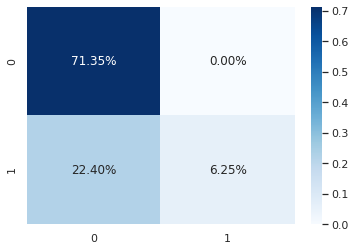

None
f1 score
[0.86709, 0.38235] [0.8725, 0.34397]

accuracy
0.78125 0.7865

precision
[0.76536 1.     ] [0.77716 0.93269]

recall
[1.      0.23636] [0.9945  0.21087]


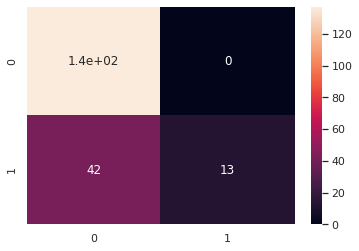

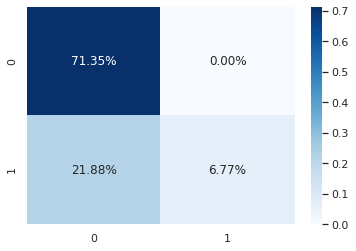

None
f1 score
[0.86747, 0.15385] [0.87431, 0.38225]

accuracy
0.77083 0.79111

precision
[0.76596 1.     ] [0.78005 0.94118]

recall
[1.      0.08333] [0.99447 0.23983]


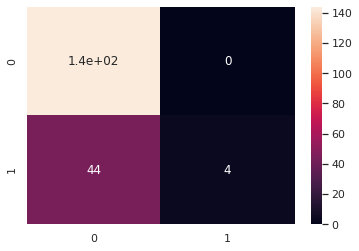

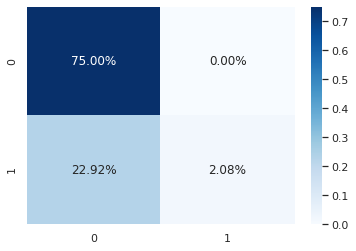

None
f1 score
[0.91395, 0.38298] [0.86978, 0.37037]

accuracy
0.84896 0.78419

precision
[0.85083 0.81818] [0.77194 0.95652]

recall
[0.98718 0.25   ] [0.99601 0.22965]


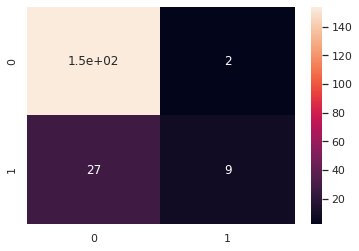

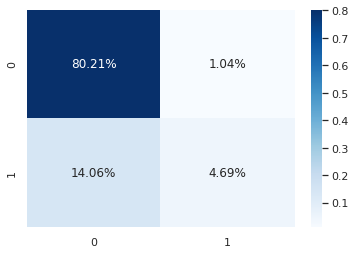

None
f1 score
[0.86335, 0.29032] [0.87474, 0.37153]

accuracy
0.77083 0.79111

precision
[0.76796 0.81818] [0.77977 0.95536]

recall
[0.98582 0.17647] [0.99606 0.2306 ]


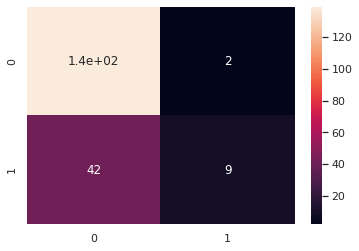

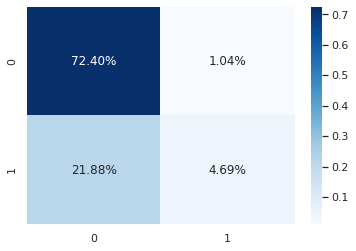

In [925]:
kfold = KFold(n_splits=10)
model = KNN(kfold,X , y)

K-NN is pretty intuitive and simple. To classify the new data point K-NN algorithm reads through whole dataset to find out K nearest neighbors.
K-NN is a non-parametric algorithm which means there are assumptions to be met to implement K-NN. Parametric models like linear regression has lots of assumptions to be met by data before it can be implemented which is not the case with K-NN.K-NN does not explicitly build any model, it simply tags the new data entry based learning from historical data. New data entry would be tagged with majority class in the nearest neighbor. Given it’s an instance-based learning; k-NN is a memory-based approach. The classifier immediately adapts as we collect new training data. It allows the algorithm to respond quickly to changes in the input during real-time use. Most of the classifier algorithms are easy to implement for binary problems and needs effort to implement for multi class whereas K-NN adjust to multi class without any extra efforts. Can be used both for Classification and Regression. One of the biggest advantages of K-NN is that K-NN can be used both for classification and regression problems. K-NN might take some time while selecting the first hyper parameter but after that rest of the parameters are aligned to it.K-NN algorithm gives user the flexibility to choose distance while building K-NN model.

K-NN might be very easy to implement but as dataset grows efficiency or speed of algorithm declines very fast. KNN works well with small number of input variables but as the numbers of variables grow K-NN algorithm struggles to predict the output of new data point. If you decide to build k-NN using a common distance, like Euclidean or Manhattan distances, it is completely necessary that features have the same scale, since absolute differences in features weight. One of the biggest issues with K-NN is to choose the optimal number of neighbors to be consider while classifying the new data entry. k-NN doesn’t perform well on imbalanced data. If we consider two classes, A and B, and the majority of the training data is labeled as A, then the model will ultimately give a lot of preference to A. This might result in getting the less common class B wrongly classified. K-NN algorithm is very sensitive to outliers as it simply chose the neighbors based on distance criteria. K-NN inherently has no capability of dealing with missing value problem.


# Early Prediction

I just tried an easy idea for this concept and thaught that shifting the windows can help. In most of the cass the person who needed ICU , needed it a little bit earlier.

In [914]:
#converting new dataframe that has only selected features for training the model to numpy, to make calculations
X_early = new_data.copy()
X_early.drop('ICU', axis='columns', inplace=True)
#Adding features that considered important in EDA , such as HTN and deases lead to ICU
X_early.loc[:, "HTN"] = data['HTN']
for cell in range(X_early.shape[0]):
    if cell % 5 != 4:
        X_early.at[cell, 'ICU'] = X_early.at[cell + 1, 'ICU']
X_early['ICU'].head()

0   -0.604
1   -0.604
2   -0.604
3    1.654
4    1.654
Name: ICU, dtype: float64

In [915]:
X_early = X_early.to_numpy()
#y was previously determined
print(y)

0       0
1       0
2       0
3       0
4       1
       ..
1920    0
1921    0
1922    0
1923    0
1924    0
Name: ICU, Length: 1925, dtype: int64


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
f1 score
[0.93091, 0.82883] [0.94223, 0.85885]

accuracy
0.90155 0.91801

precision
[0.95522 0.77966] [0.97393 0.79558]

recall
[0.9078  0.88462] [0.91253 0.93305]


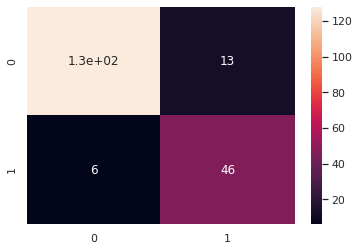

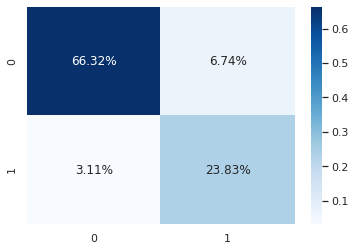

In [916]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = logistic_regression(train_test)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 out of   1 | elapsed:    0.9s finished


LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=4, penalty='l2', random_state=13,
                   solver='lbfgs', tol=0.0001, verbose=1, warm_start=False)
f1 score
[0.93091, 0.82883] [0.94356, 0.86114]

accuracy
0.90155 0.91975

precision
[0.95522 0.77966] [0.9732  0.80112]

recall
[0.9078  0.88462] [0.91568 0.93089]


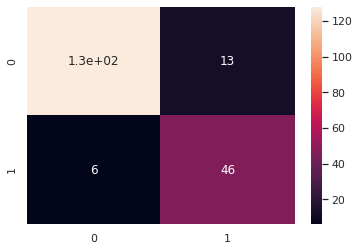

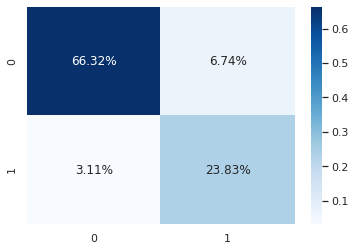

In [918]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = logistic_regression2(train_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.94497, 0.81106] [0.95459, 0.87597]

accuracy
0.91476 0.93352

precision
[0.94118 0.82243] [0.9386 0.9187]

recall
[0.94879 0.8    ] [0.97113 0.83704]


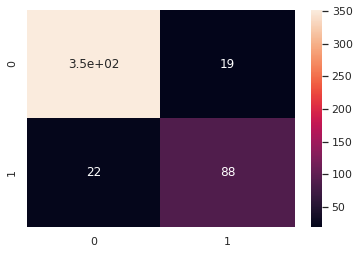

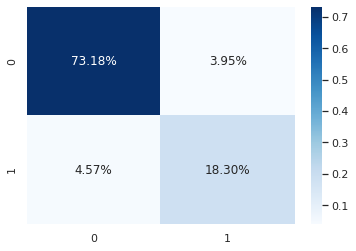

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=8, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.944, 0.80189] [0.96896, 0.91339]

accuracy
0.91268 0.95429

precision
[0.93404 0.83333] [0.94756 0.97479]

recall
[0.95418 0.77273] [0.99134 0.85926]


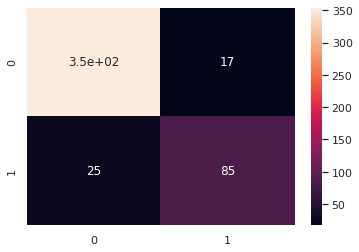

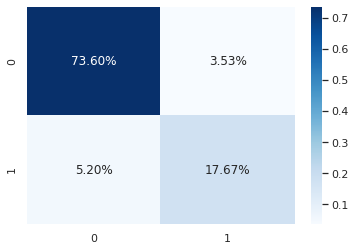

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=11, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.94667, 0.81132] [0.97738, 0.93734]

accuracy
0.91684 0.96676

precision
[0.93668 0.84314] [0.95753 0.99446]

recall
[0.95687 0.78182] [0.99808 0.88642]


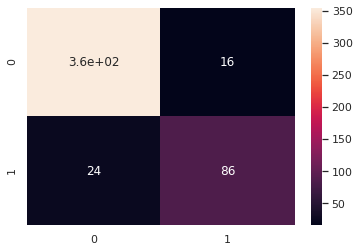

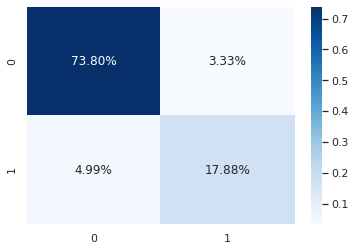

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.94228, 0.80184] [0.99229, 0.98034]

accuracy
0.9106 0.98892

precision
[0.9385  0.81308] [0.9942  0.97555]

recall
[0.94609 0.79091] [0.99038 0.98519]


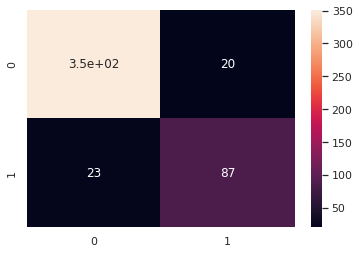

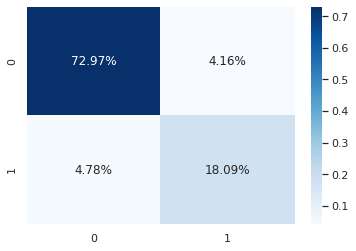

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=103, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

f1 score
[0.93976, 0.7907] [0.99424, 0.98507]

accuracy
0.90644 0.99169

precision
[0.93351 0.80952] [0.99139 0.99248]

recall
[0.94609 0.77273] [0.99711 0.97778]


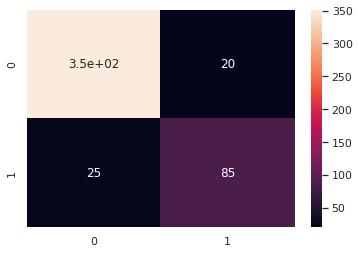

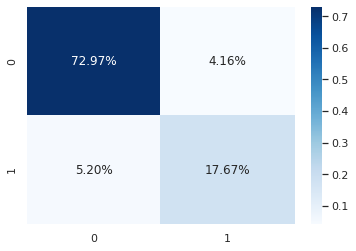

In [923]:
def decision_tree(kfold,X_early,y):
  parameters = {'k': [2,5, 8, 15 ,100]}
  for k in parameters['k']:
      for train_index, test_index in kfold.split(X):
          X_train, X_test , y_train, y_test = X_early[train_index], X_early[test_index] , y[train_index], y[test_index]
          model = DecisionTreeClassifier(max_depth=k)
          model = model.fit(X_train, y_train)
          y_hat_train, y_hat_test = model.predict(X_train), model.predict(X_test)
          k += 1
      print(model)
      print()
      print("f1 score")
      print(f1_score(y_test, y_hat_test),f1_score(y_train, y_hat_train))
      print()
      print("accuracy")
      print(accuracy(y_test, y_hat_test), accuracy(y_train, y_hat_train))
      print()
      print("precision")
      print(precision(y_test, y_hat_test), precision(y_train, y_hat_train))
      print()
      print("recall")
      print(recall(y_test, y_hat_test), recall(y_train, y_hat_train))
      plot_confusion_matrix(y_test, y_hat_test, False)
      plot_confusion_matrix(y_test, y_hat_test, True)

kfold = KFold(n_splits=4)
model = decision_tree(kfold,X_early,y)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=200, random_state=8)
f1 score
[0.95035, 0.86538] [0.97943, 0.94444]

accuracy
0.92746 0.96998

precision
[0.95035 0.86538] [0.98332 0.93446]

recall
[0.95035 0.86538] [0.97557 0.95464]


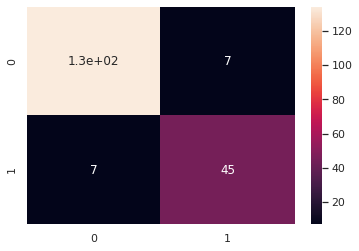

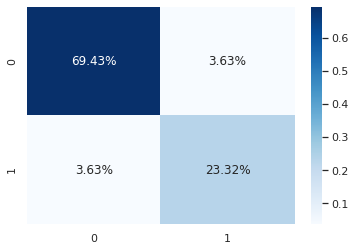

In [927]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = Adaboost(train_test)

f1 score
[0.93478, 0.83636] [0.94217, 0.85216]

accuracy
0.90674 0.91686

precision
[0.95556 0.7931 ] [0.96069 0.81213]

recall
[0.91489 0.88462] [0.92435 0.89633]


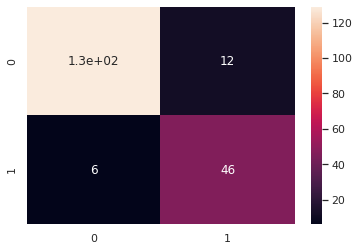

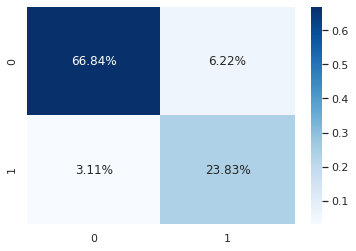

In [928]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = bagging(train_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=25, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.95307, 0.88073] [0.99449, 0.98485]

accuracy
0.93264 0.99192

precision
[0.97059 0.84211] [0.99371 0.98698]

recall
[0.93617 0.92308] [0.99527 0.98272]


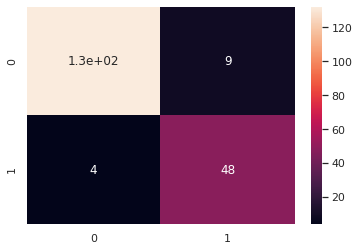

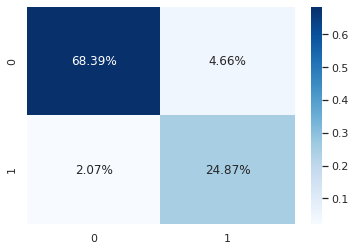

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=18, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.95652, 0.89091] [0.99448, 0.98488]

accuracy
0.93782 0.99192

precision
[0.97778 0.84483] [0.99448 0.98488]

recall
[0.93617 0.94231] [0.99448 0.98488]


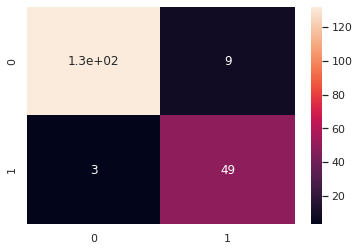

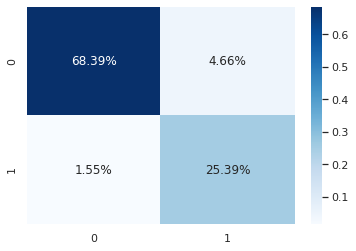

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.95307, 0.88073] [0.99449, 0.98485]

accuracy
0.93264 0.99192

precision
[0.97059 0.84211] [0.99371 0.98698]

recall
[0.93617 0.92308] [0.99527 0.98272]


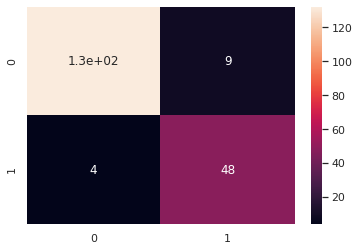

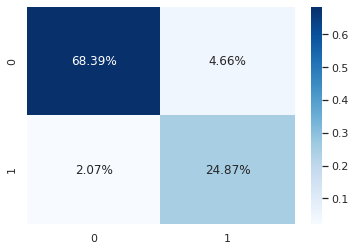

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.93559, 0.79121] [0.9283, 0.75573]

accuracy
0.90155 0.88915

precision
[0.8961  0.92308] [0.88219 0.9195 ]

recall
[0.97872 0.69231] [0.97951 0.64147]


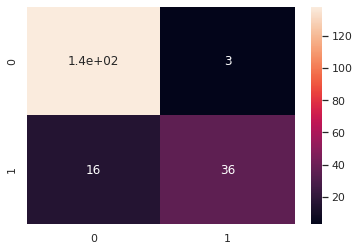

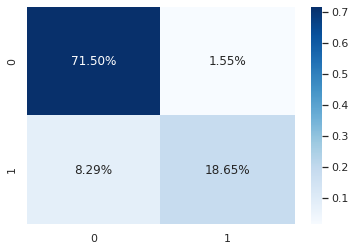

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.95035, 0.86538] [0.9589, 0.88449]

accuracy
0.92746 0.93938

precision
[0.95035 0.86538] [0.95257 0.90135]

recall
[0.95035 0.86538] [0.96533 0.86825]


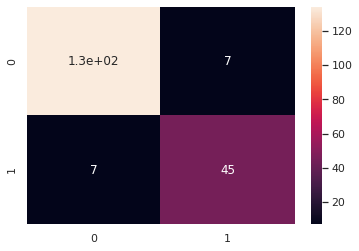

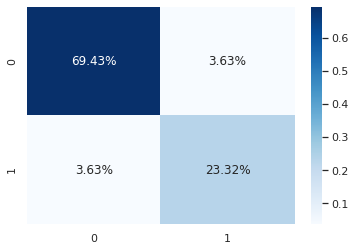

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=150, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.95307, 0.88073] [0.99449, 0.98485]

accuracy
0.93264 0.99192

precision
[0.97059 0.84211] [0.99371 0.98698]

recall
[0.93617 0.92308] [0.99527 0.98272]


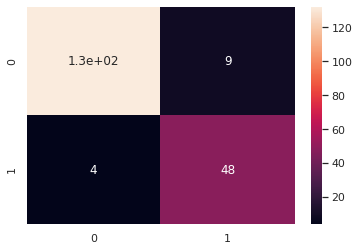

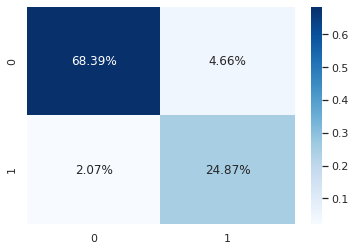

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.95307, 0.88073] [0.99449, 0.98485]

accuracy
0.93264 0.99192

precision
[0.97059 0.84211] [0.99371 0.98698]

recall
[0.93617 0.92308] [0.99527 0.98272]


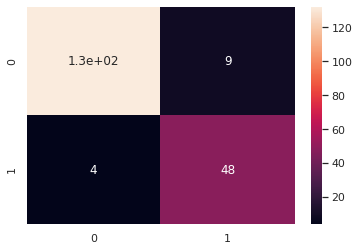

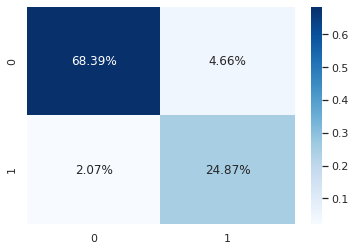

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=300, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=13, verbose=0,
                       warm_start=False)
f1 score
[0.95307, 0.88073] [0.99449, 0.98485]

accuracy
0.93264 0.99192

precision
[0.97059 0.84211] [0.99371 0.98698]

recall
[0.93617 0.92308] [0.99527 0.98272]


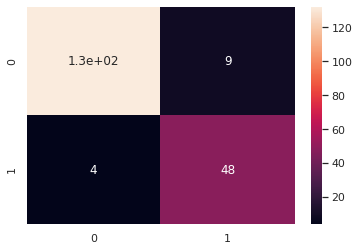

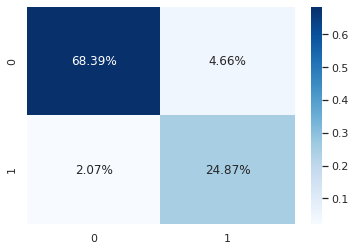

In [929]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = random_forest(train_test)

BernoulliNB(alpha=5.5, binarize=0.0, class_prior=None, fit_prior=True)
f1 score
[0.93993, 0.83495] [0.92634, 0.78071]

accuracy
0.91192 0.88972

precision
[0.93662 0.84314] [0.9071  0.83333]

recall
[0.94326 0.82692] [0.94641 0.73434]


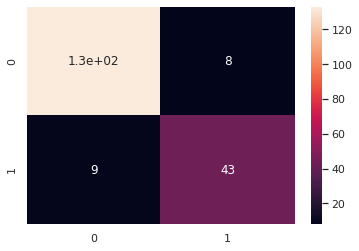

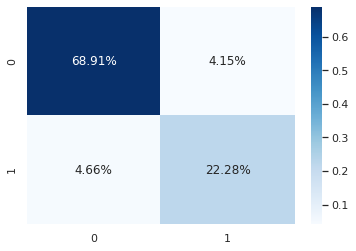

In [926]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = bernoulli_naive_bayes(train_test)

GaussianNB(priors=None, var_smoothing=2.8)
f1 score
[0.86957, 0.34375] [0.86751, 0.28729]

accuracy
0.78238 0.77656

precision
[0.77348 0.91667] [0.76695 0.975  ]

recall
[0.99291 0.21154] [0.99842 0.16847]


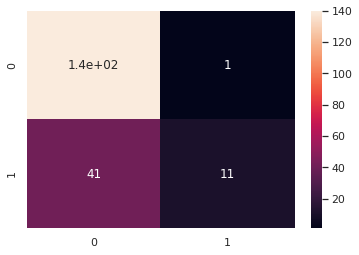

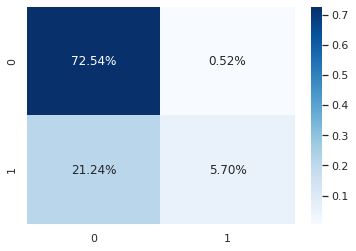

In [930]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = gaussian_naive_bayes(train_test)

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94776, 0.88136] [0.93808, 0.8622]

accuracy
0.92746 0.91455

precision
[1.      0.78788] [1.      0.75777]

recall
[0.90071 1.     ] [0.88337 1.     ]


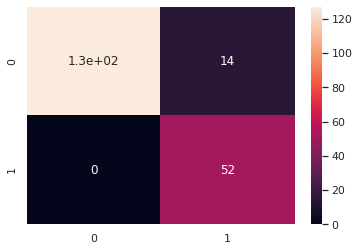

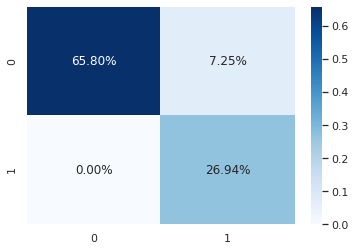

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94776, 0.88136] [0.93808, 0.8622]

accuracy
0.92746 0.91455

precision
[1.      0.78788] [1.      0.75777]

recall
[0.90071 1.     ] [0.88337 1.     ]


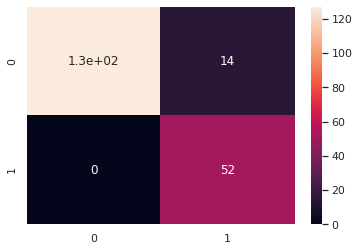

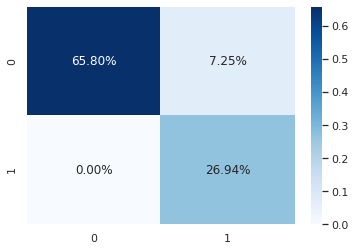

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94776, 0.88136] [0.93808, 0.8622]

accuracy
0.92746 0.91455

precision
[1.      0.78788] [1.      0.75777]

recall
[0.90071 1.     ] [0.88337 1.     ]


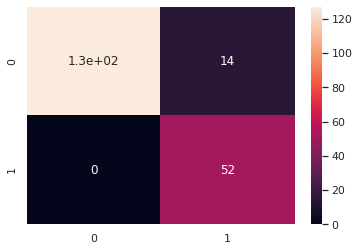

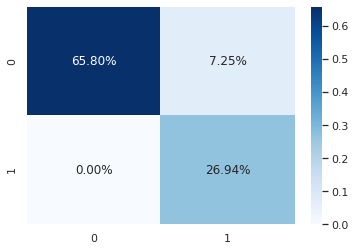

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94776, 0.88136] [0.93808, 0.8622]

accuracy
0.92746 0.91455

precision
[1.      0.78788] [1.      0.75777]

recall
[0.90071 1.     ] [0.88337 1.     ]


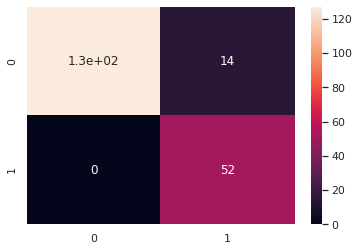

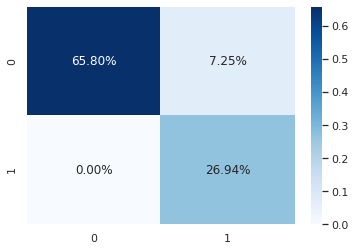

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94776, 0.88136] [0.93808, 0.8622]

accuracy
0.92746 0.91455

precision
[1.      0.78788] [1.      0.75777]

recall
[0.90071 1.     ] [0.88337 1.     ]


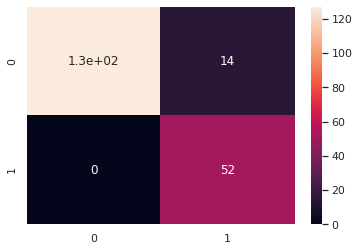

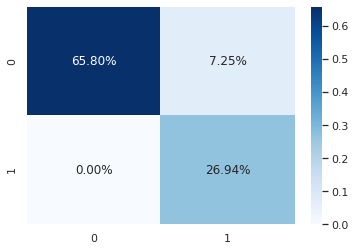

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94776, 0.88136] [0.93808, 0.8622]

accuracy
0.92746 0.91455

precision
[1.      0.78788] [1.      0.75777]

recall
[0.90071 1.     ] [0.88337 1.     ]


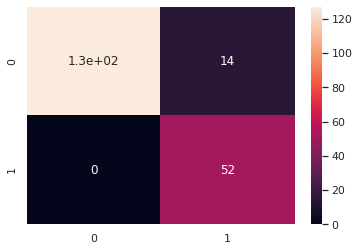

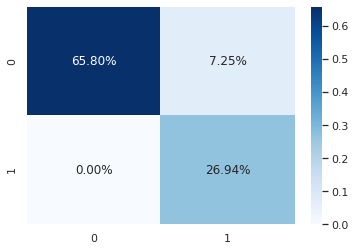

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.9547, 0.86869] [0.94825, 0.83732]

accuracy
0.93264 0.92148

precision
[0.93836 0.91489] [0.91685 0.93834]

recall
[0.97163 0.82692] [0.98188 0.75594]


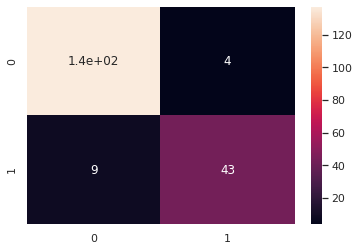

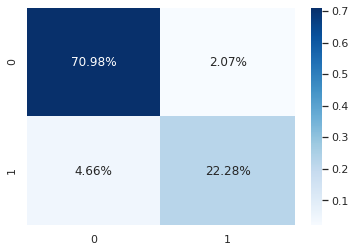

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.90845, 0.7451] [0.98496, 0.95949]

accuracy
0.86528 0.97806

precision
[0.9021 0.76  ] [0.98966 0.94737]

recall
[0.91489 0.73077] [0.9803  0.97192]


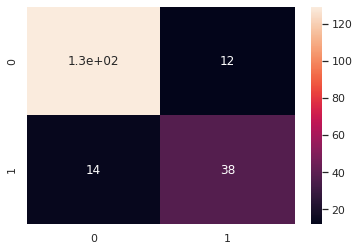

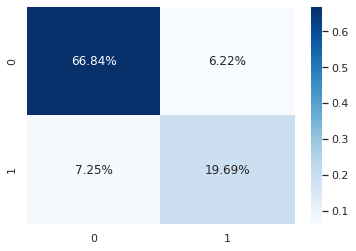

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.91262, 0.64935] [0.89699, 0.5446]

accuracy
0.8601 0.83199

precision
[0.83929 1.     ] [0.81427 0.98864]

recall
[1.      0.48077] [0.99842 0.37581]


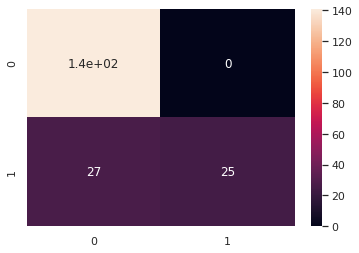

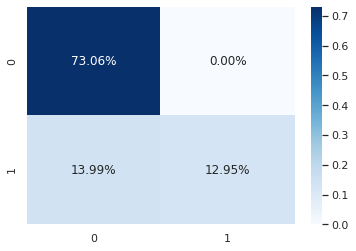

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94286, 0.84906] [0.9653, 0.901]

accuracy
0.9171 0.94861

precision
[0.94964 0.83333] [0.95525 0.9289 ]

recall
[0.93617 0.86538] [0.97557 0.87473]


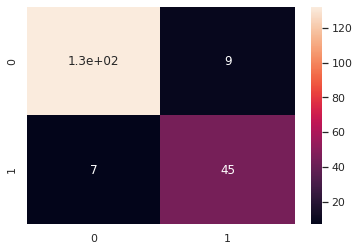

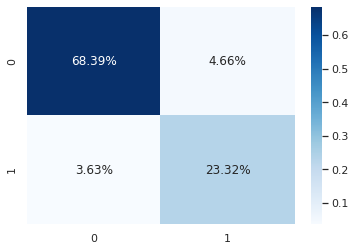

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.91103, 0.7619] [0.99015, 0.97297]

accuracy
0.87047 0.98557

precision
[0.91429 0.75472] [0.98976 0.97403]

recall
[0.9078  0.76923] [0.99054 0.97192]


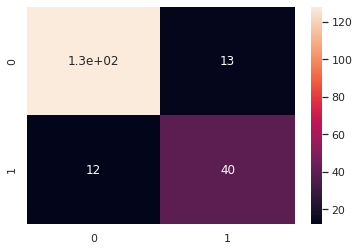

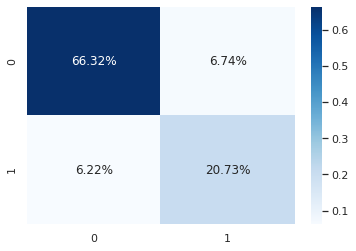

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.9481, 0.84536] [0.94415, 0.81818]

accuracy
0.92228 0.91455

precision
[0.92568 0.91111] [0.90587 0.94872]

recall
[0.97163 0.78846] [0.98582 0.71922]


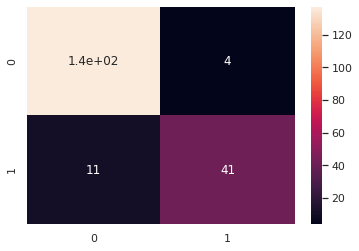

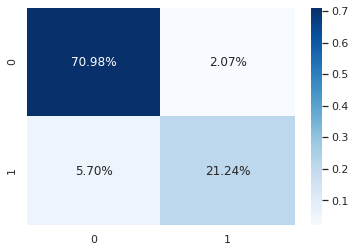

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.88737, 0.64516] [0.91862, 0.78307]

accuracy
0.82902 0.88164

precision
[0.85526 0.73171] [0.9256  0.76763]

recall
[0.92199 0.57692] [0.91174 0.79914]


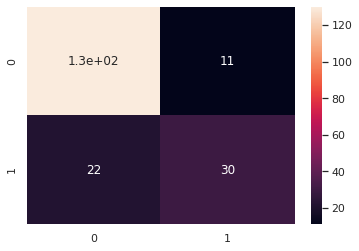

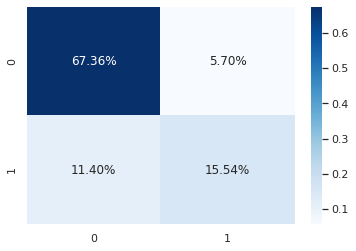

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
f1 score
[0.84431, 0.0] [0.84572, 0.0]

accuracy
0.73057 0.73268

precision
[0.73057 0.     ] [0.73268 0.     ]

recall
[1. 0.] [1. 0.]


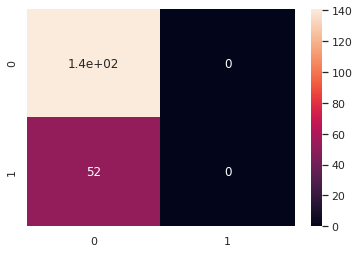

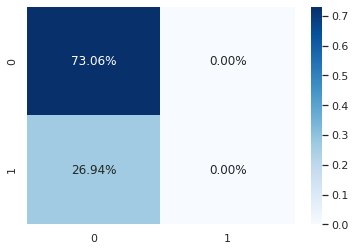

SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.93985, 0.86667] [0.92549, 0.84029]

accuracy
0.9171 0.89838

precision
[1.      0.76471] [1.      0.72457]

recall
[0.88652 1.     ] [0.86131 1.     ]


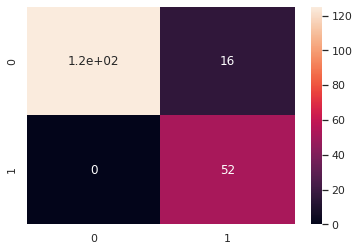

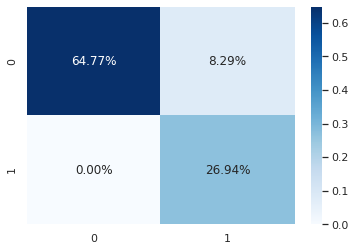

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94853, 0.87719] [0.96185, 0.906]

accuracy
0.92746 0.94573

precision
[0.98473 0.80645] [0.99163 0.84358]

recall
[0.91489 0.96154] [0.93381 0.9784 ]


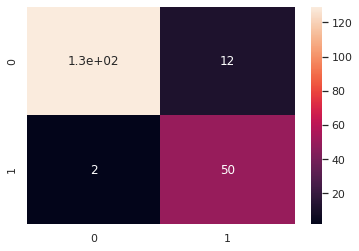

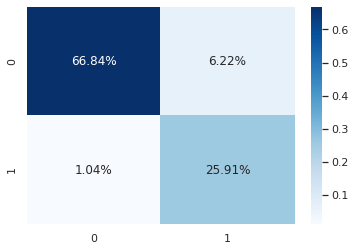

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
f1 score
[0.84308, 0.16393] [0.99013, 0.97315]

accuracy
0.73575 0.98557

precision
[0.74457 0.55556] [0.99209 0.96795]

recall
[0.97163 0.09615] [0.98818 0.9784 ]


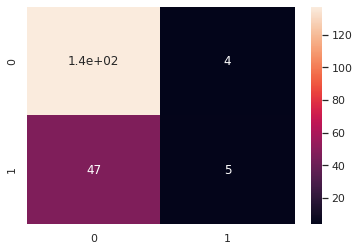

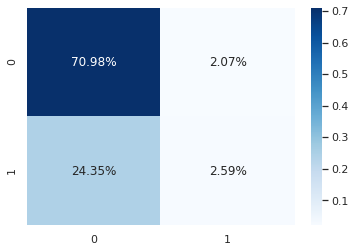

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
f1 score
[0.94424, 0.87179] [0.94833, 0.88038]

accuracy
0.92228 0.92783

precision
[0.99219 0.78462] [0.99739 0.79038]

recall
[0.90071 0.98077] [0.90386 0.99352]


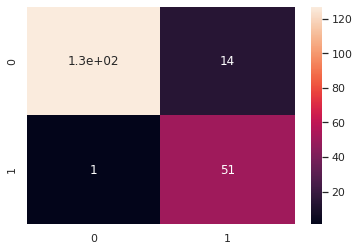

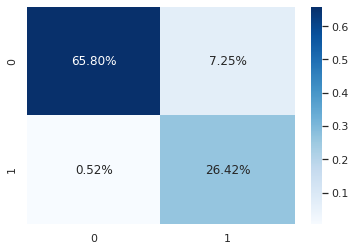

In [931]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = SVM(train_test)

GridSearchCV(cv=None, error_score=nan,
             estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                     batch_size='auto', beta_1=0.9,
                                     beta_2=0.999, early_stopping=False,
                                     epsilon=1e-08, hidden_layer_sizes=(100,),
                                     learning_rate='constant',
                                     learning_rate_init=0.001, max_fun=15000,
                                     max_iter=200, momentum=0.9,
                                     n_iter_no_change=10,
                                     nesterovs_momentum=True, power_t=0.5,
                                     random_st...
                                     solver='adam', tol=0.0001,
                                     validation_fraction=0.1, verbose=False,
                                     warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'activation': ['ta

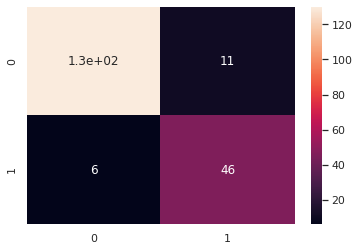

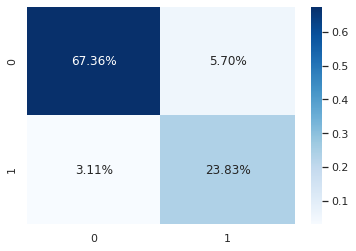

In [932]:
train_test = train_test_split(X_early, y, test_size=0.1, random_state=1, stratify=y, shuffle=True) 
model = nueral_network(train_test)

None
f1 score
[0.9338, 0.80808] [0.93543, 0.82251]

accuracy
0.90155 0.90531

precision
[0.95035 0.76923] [0.93103 0.83333]

recall
[0.91781 0.85106] [0.93987 0.81197]


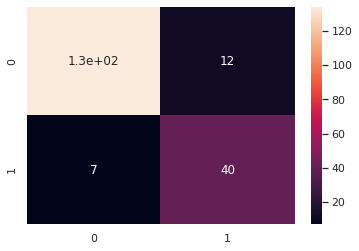

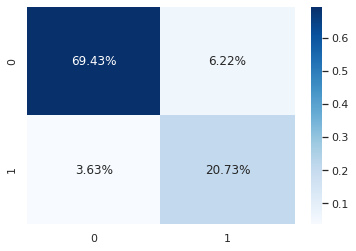

None
f1 score
[0.91791, 0.81356] [0.9415, 0.84154]

accuracy
0.88601 0.91455

precision
[0.91111 0.82759] [0.95052 0.82046]

recall
[0.92481 0.8    ] [0.93265 0.86374]


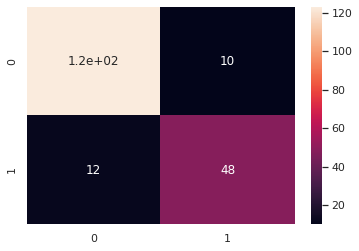

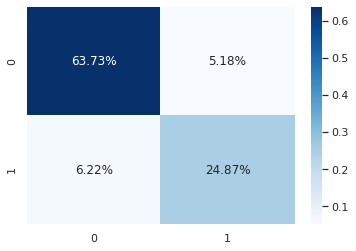

None
f1 score
[0.89069, 0.80576] [0.93832, 0.81609]

accuracy
0.8601 0.90762

precision
[0.88    0.82353] [0.93185 0.83333]

recall
[0.90164 0.78873] [0.94488 0.79955]


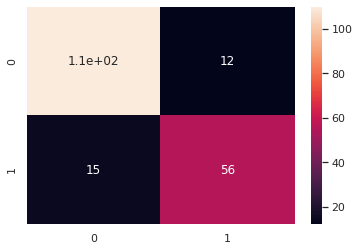

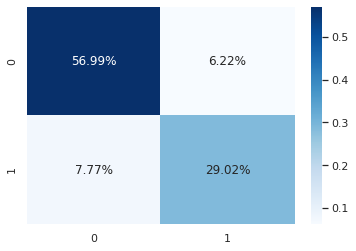

None
f1 score
[0.92308, 0.78] [0.93503, 0.82932]

accuracy
0.88601 0.90589

precision
[0.91034 0.8125 ] [0.94597 0.80488]

recall
[0.93617 0.75   ] [0.92435 0.85529]


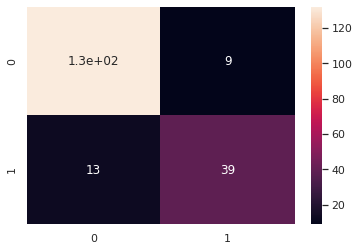

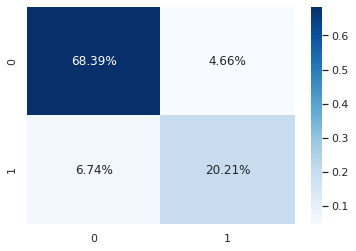

None
f1 score
[0.94352, 0.8] [0.93302, 0.81641]

accuracy
0.91192 0.90185

precision
[0.95946 0.75556] [0.92428 0.83814]

recall
[0.9281 0.85  ] [0.94193 0.79579]


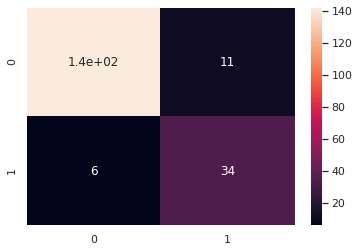

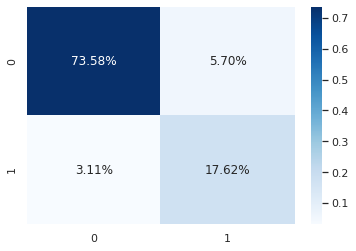

None
f1 score
[0.92701, 0.81818] [0.93829, 0.83369]

accuracy
0.89583 0.90998

precision
[0.92701 0.81818] [0.94502 0.81799]

recall
[0.92701 0.81818] [0.93166 0.85   ]


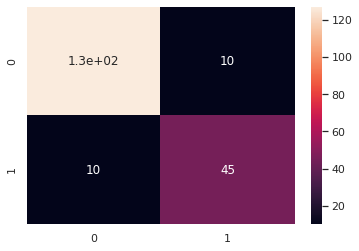

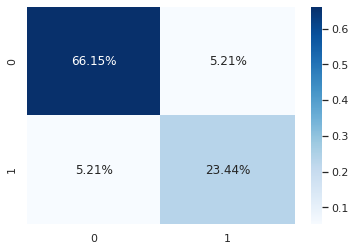

None
f1 score
[0.91367, 0.77358] [0.93801, 0.82353]

accuracy
0.875 0.90825

precision
[0.90071 0.80392] [0.93111 0.84127]

recall
[0.92701 0.74545] [0.94501 0.80652]


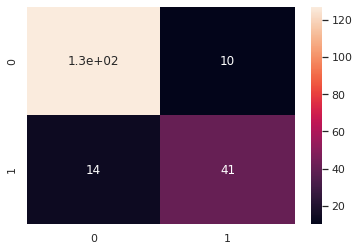

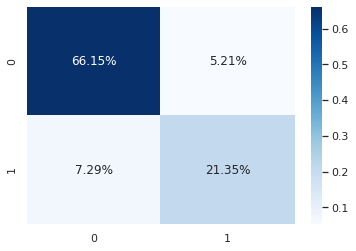

None
f1 score
[0.9215, 0.74725] [0.93565, 0.82529]

accuracy
0.88021 0.90594

precision
[0.90604 0.7907 ] [0.93528 0.82618]

recall
[0.9375  0.70833] [0.93602 0.82441]


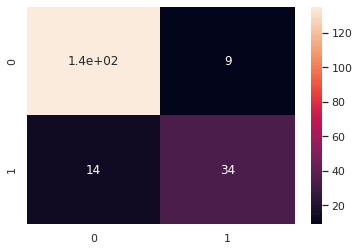

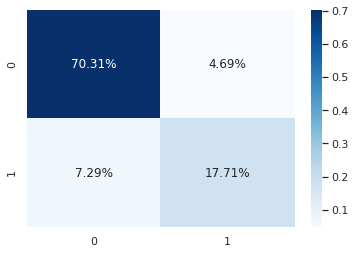

None
f1 score
[0.93115, 0.73418] [0.93698, 0.83139]

accuracy
0.89062 0.90825

precision
[0.95302 0.67442] [0.93144 0.84483]

recall
[0.91026 0.80556] [0.94258 0.81837]


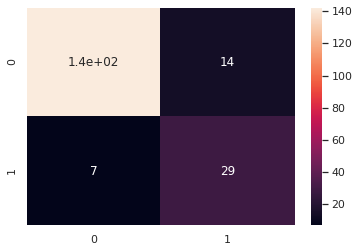

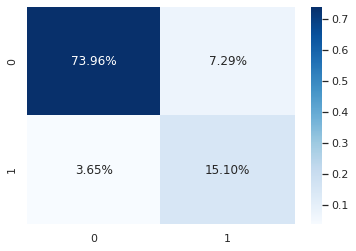

None
f1 score
[0.93333, 0.80808] [0.93365, 0.82013]

accuracy
0.90104 0.90306

precision
[0.92361 0.83333] [0.93587 0.81489]

recall
[0.94326 0.78431] [0.93144 0.82543]


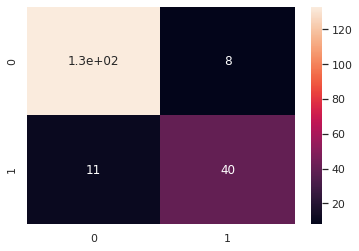

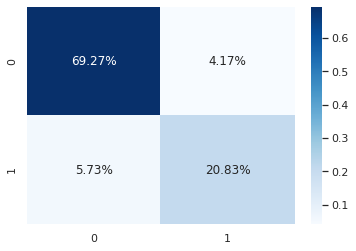

None
f1 score
[0.94949, 0.83146] [0.95936, 0.87124]

accuracy
0.92228 0.93822

precision
[0.93377 0.88095] [0.92257 0.99725]

recall
[0.96575 0.78723] [0.99921 0.7735 ]


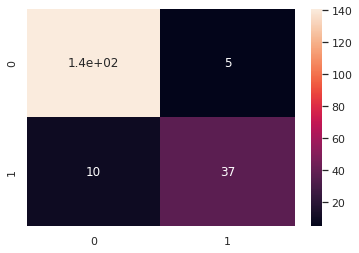

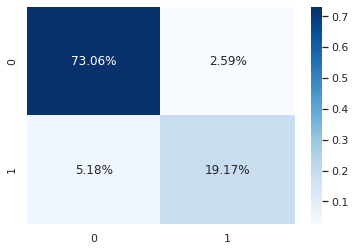

None
f1 score
[0.90975, 0.77064] [0.96296, 0.89849]

accuracy
0.87047 0.94573

precision
[0.875   0.85714] [0.96907 0.88323]

recall
[0.94737 0.7    ] [0.95693 0.91429]


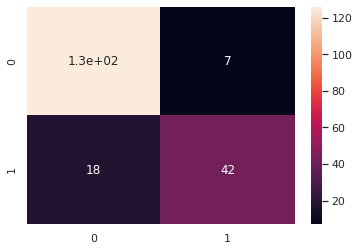

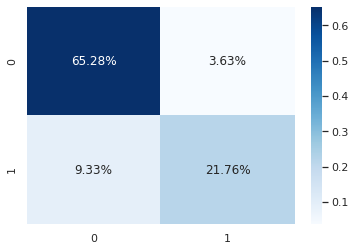

None
f1 score
[0.87023, 0.72581] [0.95626, 0.86228]

accuracy
0.82383 0.9336

precision
[0.81429 0.84906] [0.93736 0.92072]

recall
[0.93443 0.6338 ] [0.97593 0.81081]


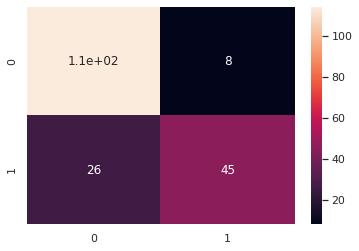

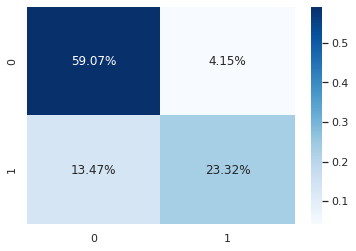

None
f1 score
[0.92958, 0.80392] [0.94986, 0.86359]

accuracy
0.89637 0.92667

precision
[0.92308 0.82   ] [0.95174 0.85897]

recall
[0.93617 0.78846] [0.94799 0.86825]


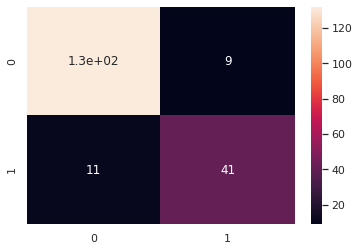

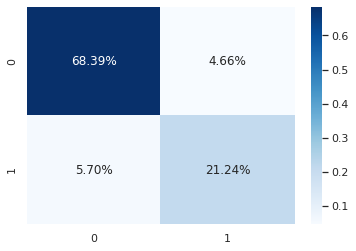

None
f1 score
[0.93377, 0.7619] [0.94351, 0.83835]

accuracy
0.89637 0.91628

precision
[0.94631 0.72727] [0.92443 0.891  ]

recall
[0.92157 0.8    ] [0.9634  0.79158]


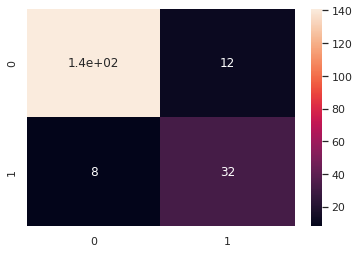

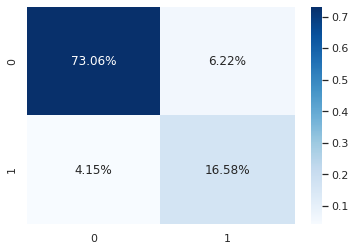

None
f1 score
[0.9058, 0.75926] [0.94712, 0.85622]

accuracy
0.86458 0.92268

precision
[0.89928 0.77358] [0.95163 0.84534]

recall
[0.91241 0.74545] [0.94266 0.86739]


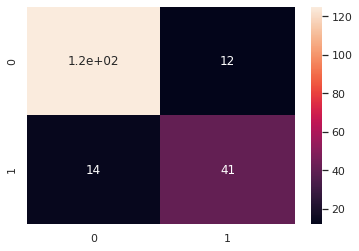

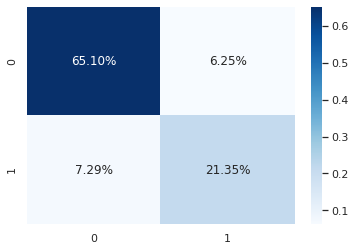

None
f1 score
[0.92473, 0.8] [0.94232, 0.83126]

accuracy
0.89062 0.91402

precision
[0.90845 0.84   ] [0.92901 0.86761]

recall
[0.94161 0.76364] [0.95601 0.79783]


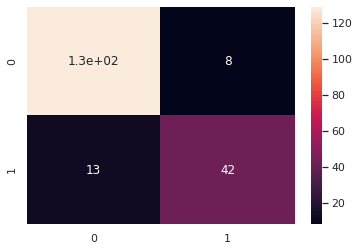

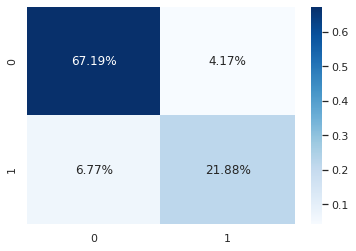

None
f1 score
[0.93515, 0.79121] [0.94427, 0.85325]

accuracy
0.90104 0.91922

precision
[0.91946 0.83721] [0.95185 0.83573]

recall
[0.95139 0.75   ] [0.93681 0.87152]


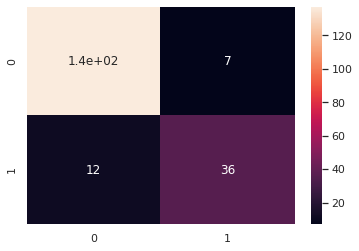

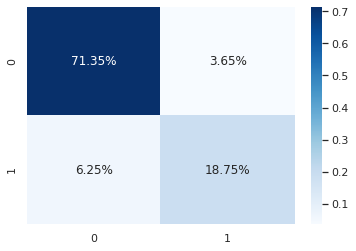

None
f1 score
[0.92208, 0.68421] [0.93837, 0.83701]

accuracy
0.875 0.91056

precision
[0.93421 0.65   ] [0.93577 0.84322]

recall
[0.91026 0.72222] [0.94099 0.8309 ]


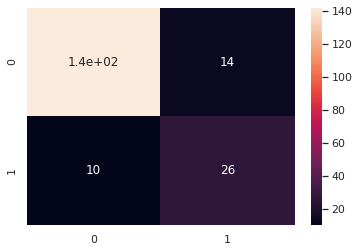

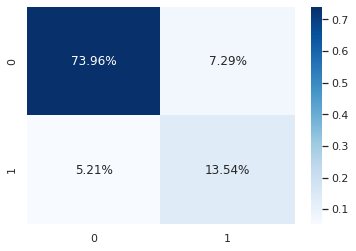

None
f1 score
[0.92308, 0.77551] [0.93897, 0.84046]

accuracy
0.88542 0.91171

precision
[0.91034 0.80851] [0.95073 0.81414]

recall
[0.93617 0.7451 ] [0.9275  0.86853]


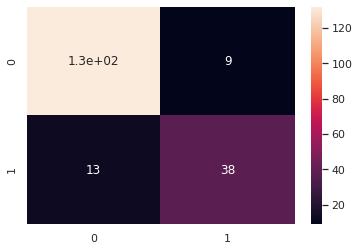

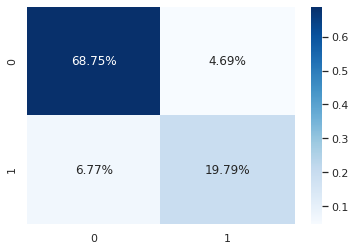

None
f1 score
[0.93617, 0.82692] [0.95287, 0.87327]

accuracy
0.90674 0.93129

precision
[0.97059 0.75439] [0.954   0.87049]

recall
[0.90411 0.91489] [0.95174 0.87607]


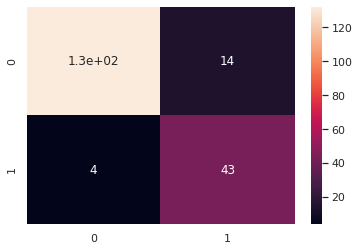

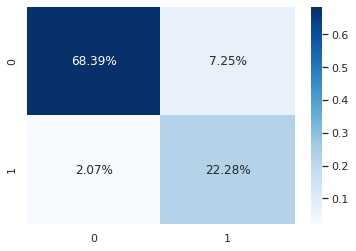

None
f1 score
[0.91873, 0.7767] [0.94489, 0.83544]

accuracy
0.88083 0.91744

precision
[0.86667 0.93023] [0.9302  0.87681]

recall
[0.97744 0.66667] [0.96006 0.7978 ]


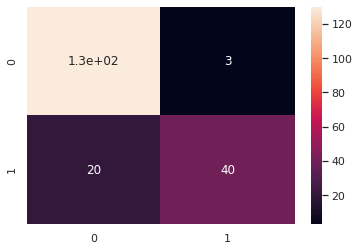

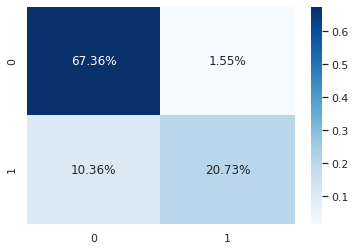

None
f1 score
[0.8898, 0.80851] [0.94762, 0.8521]

accuracy
0.8601 0.92263

precision
[0.88618 0.81429] [0.95433 0.8355 ]

recall
[0.89344 0.80282] [0.94099 0.86937]


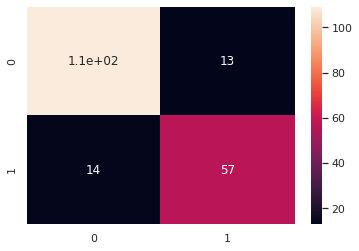

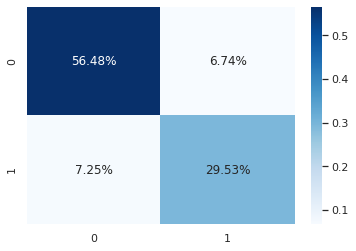

None
f1 score
[0.93007, 0.8] [0.94328, 0.83596]

accuracy
0.89637 0.9157

precision
[0.91724 0.83333] [0.93027 0.87119]

recall
[0.94326 0.76923] [0.95666 0.80346]


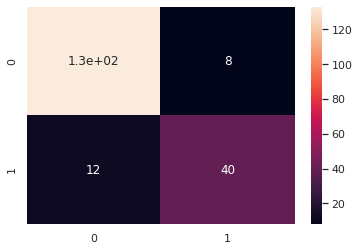

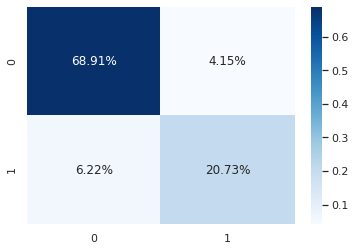

None
f1 score
[0.94558, 0.82609] [0.9399, 0.84504]

accuracy
0.9171 0.91339

precision
[0.98582 0.73077] [0.94673 0.82961]

recall
[0.9085 0.95  ] [0.93317 0.86105]


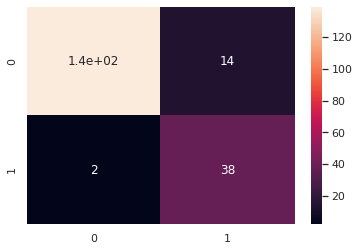

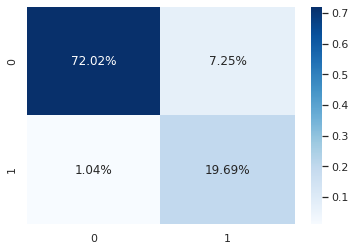

None
f1 score
[0.92143, 0.78846] [0.94421, 0.84164]

accuracy
0.88542 0.91748

precision
[0.9021  0.83673] [0.93798 0.85779]

recall
[0.94161 0.74545] [0.95051 0.82609]


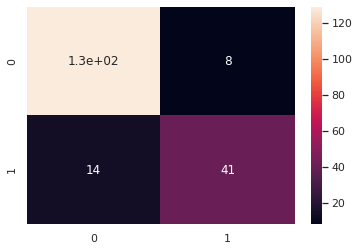

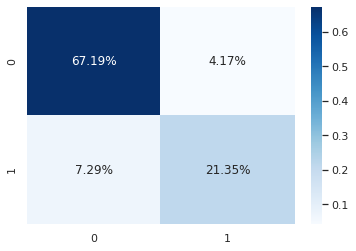

None
f1 score
[0.93382, 0.83929] [0.93777, 0.83351]

accuracy
0.90625 0.90941

precision
[0.94074 0.82456] [0.9464  0.81366]

recall
[0.92701 0.85455] [0.9293  0.85435]


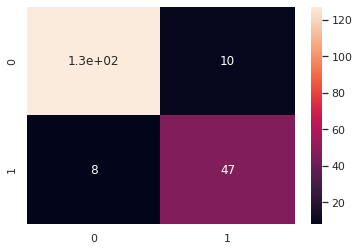

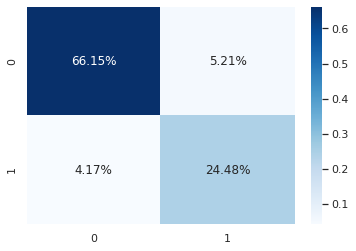

None
f1 score
[0.92203, 0.74157] [0.93828, 0.82561]

accuracy
0.88021 0.90883

precision
[0.90066 0.80488] [0.92813 0.85194]

recall
[0.94444 0.6875 ] [0.94866 0.80086]


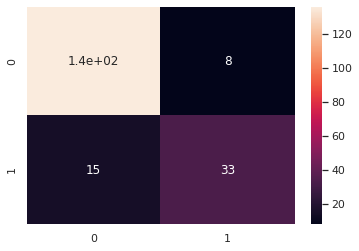

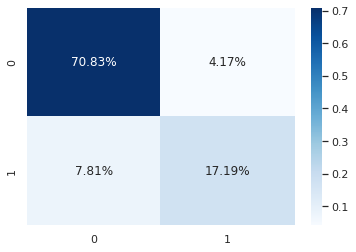

None
f1 score
[0.92157, 0.69231] [0.93985, 0.84934]

accuracy
0.875 0.91402

precision
[0.94    0.64286] [0.95176 0.82353]

recall
[0.90385 0.75   ] [0.92823 0.87683]


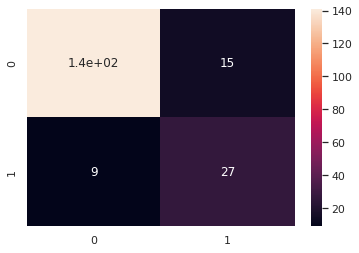

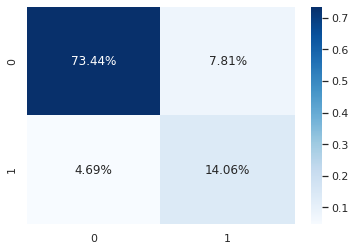

None
f1 score
[0.93151, 0.78261] [0.93511, 0.81718]

accuracy
0.89583 0.90421

precision
[0.90066 0.87805] [0.92785 0.83559]

recall
[0.96454 0.70588] [0.94247 0.79957]


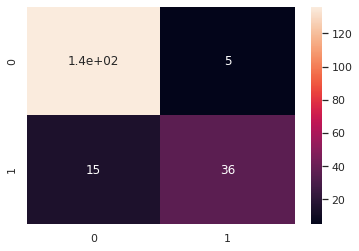

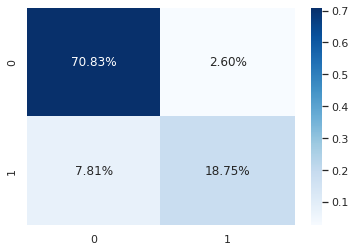

None
f1 score
[0.93238, 0.81905] [0.9361, 0.83333]

accuracy
0.90155 0.90762

precision
[0.97037 0.74138] [0.94516 0.81301]

recall
[0.89726 0.91489] [0.92722 0.8547 ]


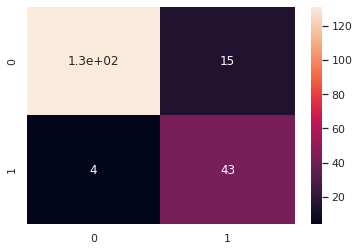

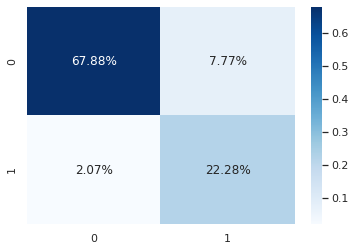

None
f1 score
[0.91575, 0.79646] [0.93952, 0.82797]

accuracy
0.88083 0.91051

precision
[0.89286 0.84906] [0.93624 0.83632]

recall
[0.93985 0.75   ] [0.94283 0.81978]


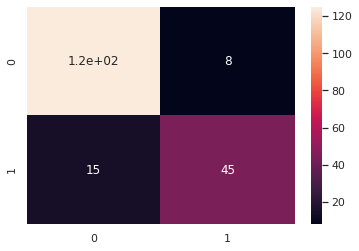

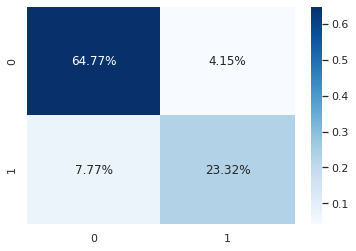

None
f1 score
[0.88525, 0.80282] [0.94177, 0.83536]

accuracy
0.85492 0.91397

precision
[0.88525 0.80282] [0.94807 0.81996]

recall
[0.88525 0.80282] [0.93556 0.85135]


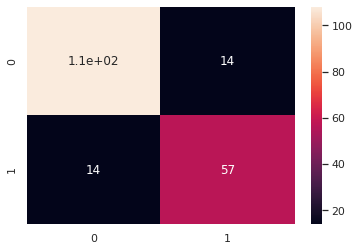

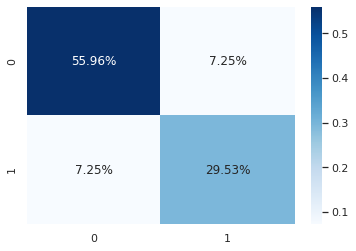

None
f1 score
[0.92096, 0.75789] [0.93406, 0.81243]

accuracy
0.88083 0.90242

precision
[0.89333 0.83721] [0.92504 0.83562]

recall
[0.95035 0.69231] [0.94326 0.7905 ]


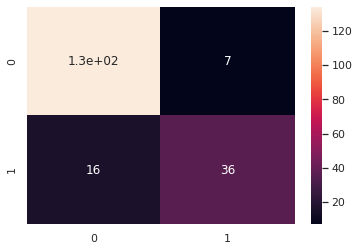

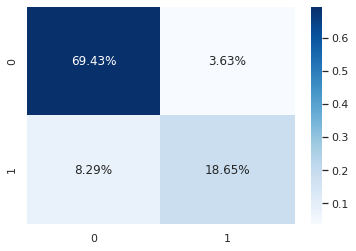

None
f1 score
[0.94983, 0.82759] [0.93735, 0.83984]

accuracy
0.92228 0.90993

precision
[0.9726  0.76596] [0.94647 0.81964]

recall
[0.9281 0.9   ] [0.9284  0.86105]


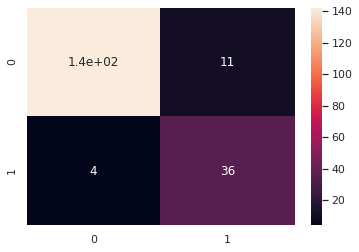

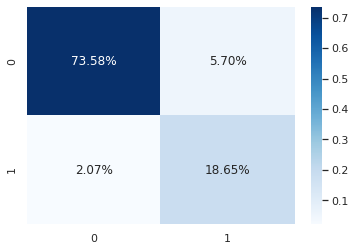

None
f1 score
[0.92754, 0.81481] [0.93787, 0.8247]

accuracy
0.89583 0.90825

precision
[0.92086 0.83019] [0.93313 0.83669]

recall
[0.93431 0.8    ] [0.94266 0.81304]


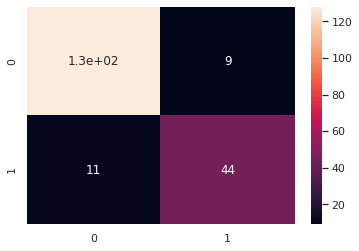

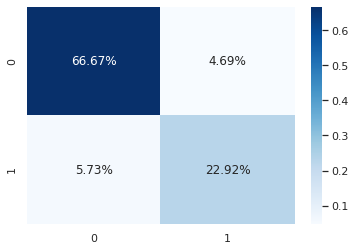

None
f1 score
[0.92364, 0.80734] [0.93847, 0.83633]

accuracy
0.89062 0.91056

precision
[0.92029 0.81481] [0.94864 0.81314]

recall
[0.92701 0.8    ] [0.92852 0.86087]


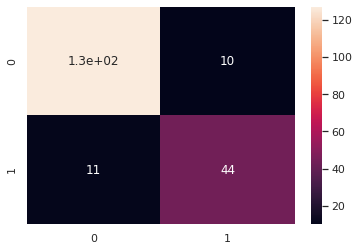

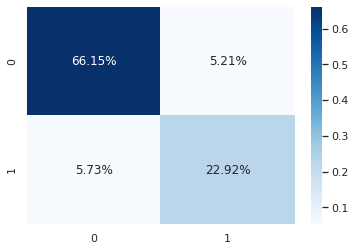

None
f1 score
[0.91724, 0.74468] [0.93615, 0.82147]

accuracy
0.875 0.90594

precision
[0.91096 0.76087] [0.92852 0.84081]

recall
[0.92361 0.72917] [0.94392 0.803  ]


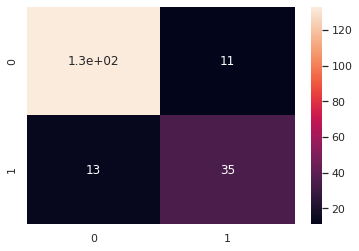

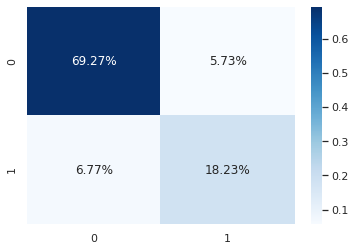

None
f1 score
[0.93069, 0.74074] [0.93591, 0.83858]

accuracy
0.89062 0.90825

precision
[0.95918 0.66667] [0.94621 0.81621]

recall
[0.90385 0.83333] [0.92584 0.86221]


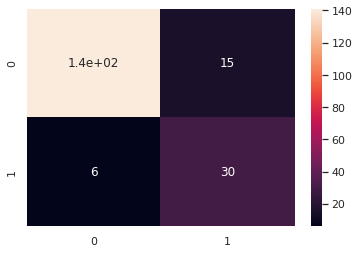

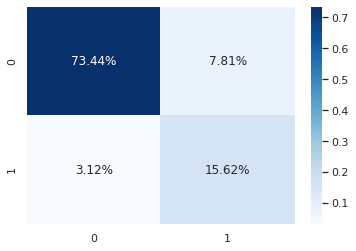

None
f1 score
[0.93103, 0.78723] [0.93552, 0.81808]

accuracy
0.89583 0.90479

precision
[0.90604 0.86047] [0.92791 0.83747]

recall
[0.95745 0.72549] [0.94326 0.79957]


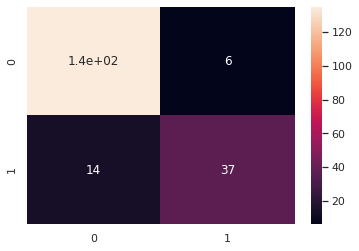

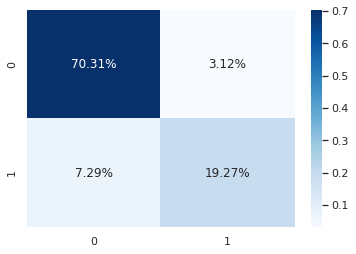

None
f1 score
[0.94558, 0.82609] [0.93032, 0.81237]

accuracy
0.9171 0.89838

precision
[0.93919 0.84444] [0.93106 0.81064]

recall
[0.95205 0.80851] [0.92959 0.8141 ]


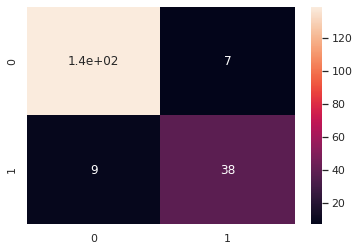

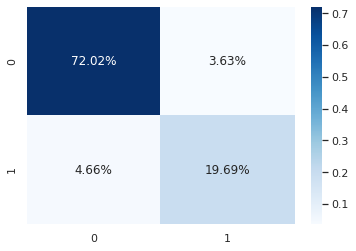

None
f1 score
[0.91241, 0.78571] [0.93565, 0.82492]

accuracy
0.87565 0.90589

precision
[0.88652 0.84615] [0.94347 0.80672]

recall
[0.93985 0.73333] [0.92796 0.84396]


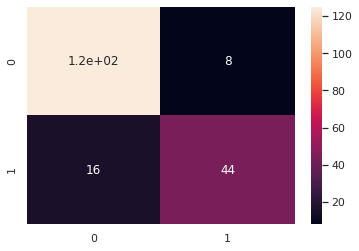

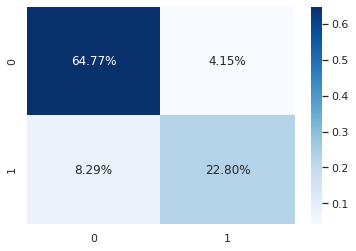

None
f1 score
[0.87302, 0.76119] [0.93184, 0.79585]

accuracy
0.8342 0.89781

precision
[0.84615 0.80952] [0.92437 0.8156 ]

recall
[0.90164 0.71831] [0.93944 0.77703]


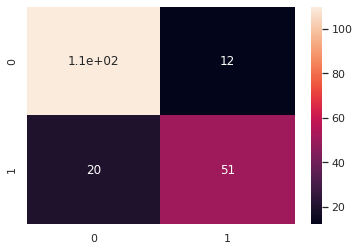

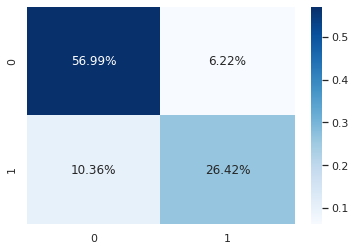

None
f1 score
[0.94286, 0.84906] [0.93128, 0.8133]

accuracy
0.9171 0.89954

precision
[0.94964 0.83333] [0.93349 0.8081 ]

recall
[0.93617 0.86538] [0.92908 0.81857]


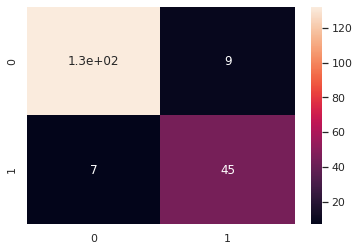

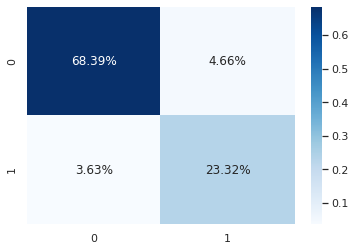

None
f1 score
[0.95082, 0.81481] [0.93165, 0.81458]

accuracy
0.92228 0.90012

precision
[0.95395 0.80488] [0.92543 0.82969]

recall
[0.94771 0.825  ] [0.93795 0.8    ]


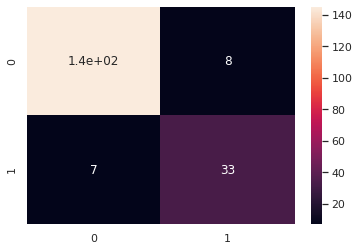

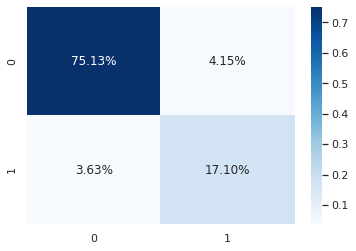

None
f1 score
[0.91791, 0.81034] [0.93339, 0.81808]

accuracy
0.88542 0.90248

precision
[0.93893 0.77049] [0.93671 0.81023]

recall
[0.89781 0.85455] [0.93009 0.82609]


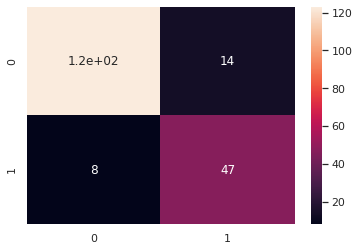

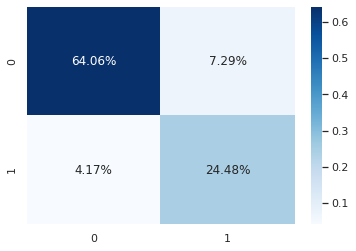

None
f1 score
[0.93818, 0.84404] [0.93553, 0.82213]

accuracy
0.91146 0.90537

precision
[0.93478 0.85185] [0.93627 0.82035]

recall
[0.94161 0.83636] [0.9348  0.82391]


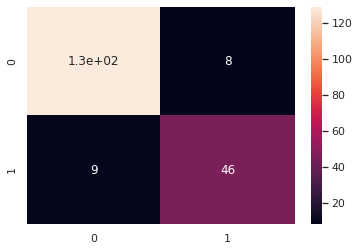

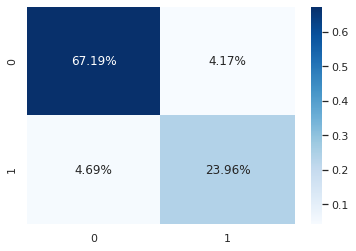

None
f1 score
[0.92568, 0.75] [0.93212, 0.81545]

accuracy
0.88542 0.90075

precision
[0.90132 0.825  ] [0.93139 0.8172 ]

recall
[0.95139 0.6875 ] [0.93286 0.8137 ]


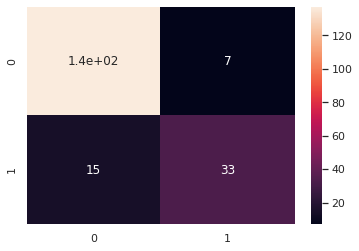

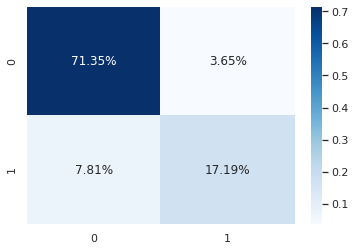

None
f1 score
[0.93421, 0.75] [0.93062, 0.81837]

accuracy
0.89583 0.8996

precision
[0.95946 0.68182] [0.93062 0.81837]

recall
[0.91026 0.83333] [0.93062 0.81837]


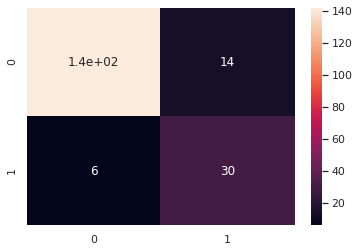

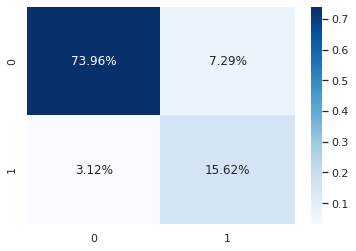

None
f1 score
[0.92143, 0.78846] [0.93508, 0.82553]

accuracy
0.88542 0.90537

precision
[0.92806 0.77358] [0.93954 0.81513]

recall
[0.91489 0.80392] [0.93065 0.83621]


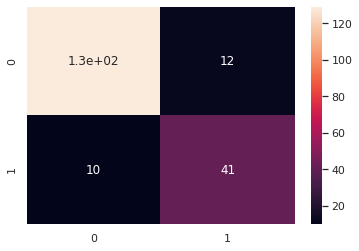

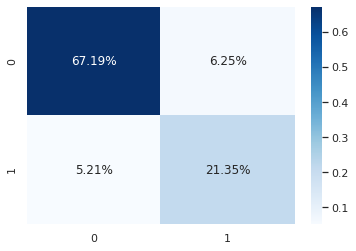

None
f1 score
[0.93645, 0.78161] [0.92155, 0.75418]

accuracy
0.90155 0.88106

precision
[0.91503 0.85   ] [0.8884  0.85405]

recall
[0.9589 0.7234] [0.95728 0.67521]


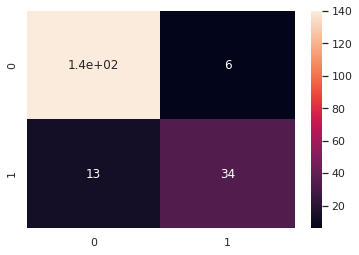

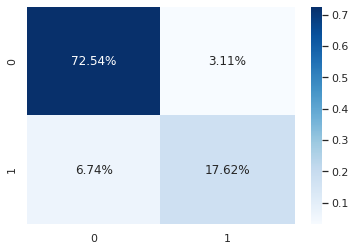

None
f1 score
[0.89123, 0.69307] [0.92511, 0.75854]

accuracy
0.83938 0.88568

precision
[0.83553 0.85366] [0.89466 0.85205]

recall
[0.95489 0.58333] [0.95771 0.68352]


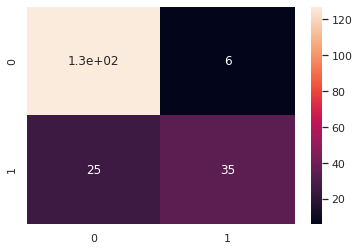

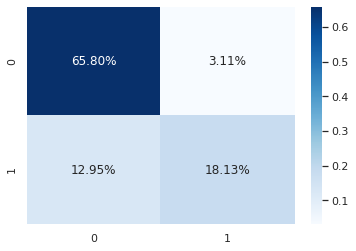

None
f1 score
[0.87879, 0.7377] [0.92085, 0.72445]

accuracy
0.8342 0.87702

precision
[0.8169  0.88235] [0.88311 0.85106]

recall
[0.95082 0.6338 ] [0.96196 0.63063]


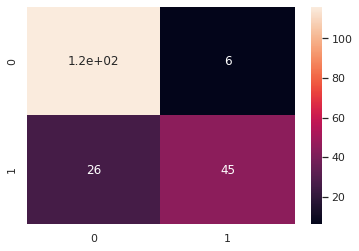

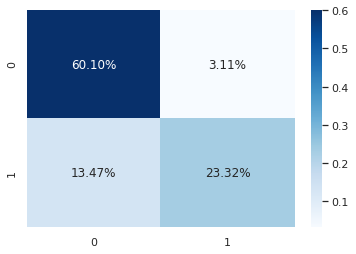

None
f1 score
[0.92784, 0.77895] [0.91726, 0.73195]

accuracy
0.89119 0.87356

precision
[0.9     0.86047] [0.88099 0.84463]

recall
[0.95745 0.71154] [0.95666 0.64579]


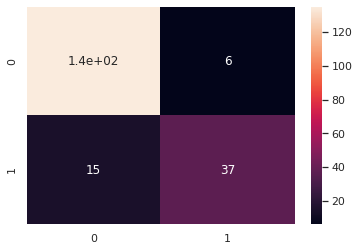

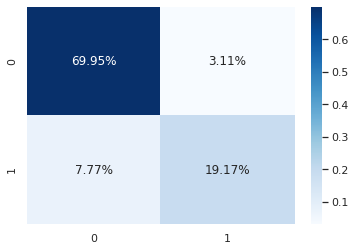

None
f1 score
[0.94603, 0.76056] [0.91651, 0.7396]

accuracy
0.91192 0.87356

precision
[0.91975 0.87097] [0.87994 0.84973]

recall
[0.97386 0.675  ] [0.95625 0.65474]


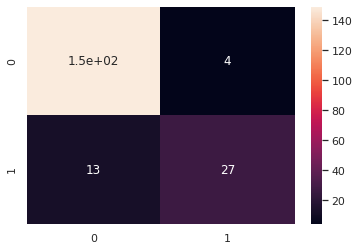

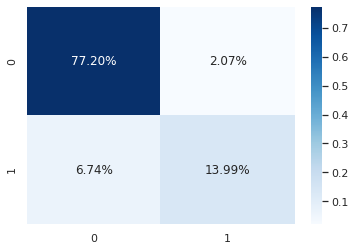

None
f1 score
[0.90278, 0.70833] [0.92005, 0.74486]

accuracy
0.85417 0.87825

precision
[0.86093 0.82927] [0.88873 0.83924]

recall
[0.94891 0.61818] [0.95365 0.66957]


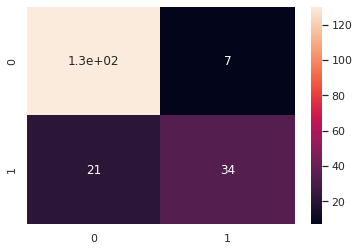

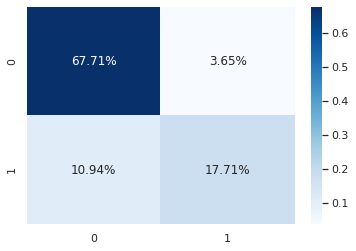

None
f1 score
[0.9258, 0.79208] [0.92012, 0.73892]

accuracy
0.89062 0.87767

precision
[0.89726 0.86957] [0.88414 0.85227]

recall
[0.9562  0.72727] [0.95915 0.65217]


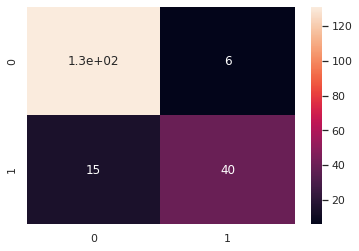

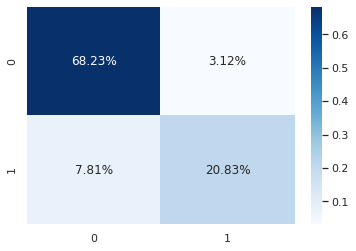

None
f1 score
[0.90968, 0.62162] [0.921, 0.73459]

accuracy
0.85417 0.87825

precision
[0.8494  0.88462] [0.87544 0.89024]

recall
[0.97917 0.47917] [0.97156 0.62527]


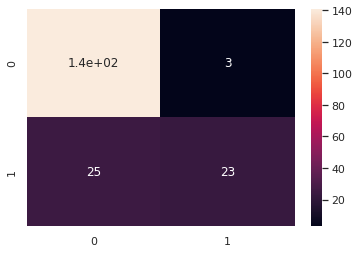

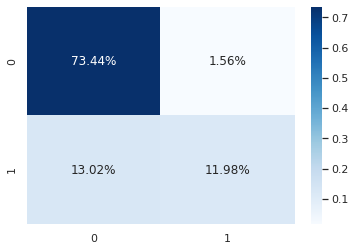

None
f1 score
[0.93375, 0.68657] [0.91396, 0.73561]

accuracy
0.89062 0.87017

precision
[0.91925 0.74194] [0.87803 0.8414 ]

recall
[0.94872 0.63889] [0.95295 0.65344]


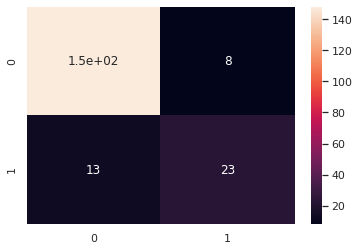

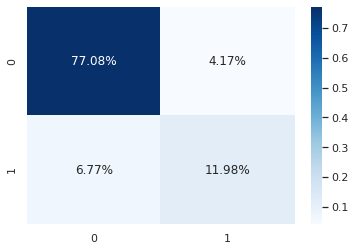

None
f1 score
[0.9103, 0.6747] [0.92114, 0.75386]

accuracy
0.85938 0.88055

precision
[0.85625 0.875  ] [0.89159 0.84085]

recall
[0.97163 0.54902] [0.95272 0.68319]


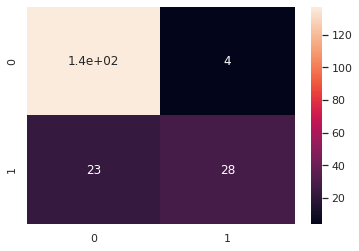

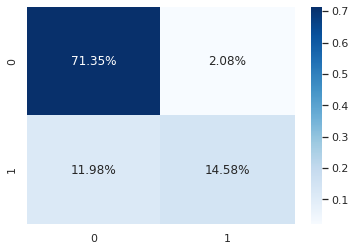

In [933]:
kfold = KFold(n_splits=10)
model = KNN(kfold,X_early , y)

As you can see, all the result are improved! It means that the idea was correct and we can predict the nned of people to ICU earlier which is very cruicial for being alive! Just shift the window!

#Conclusion

All the things that I do in EDA, data preprocessing, why no select a feature and why not, the models characteristics and ... were compelety explained previously below the the code of each section.

Now with these results of each model, I know which one to choose. I explained it totally in the next cell.

I selected some features, based on intuition proven by EDA, dropped same columns and select from each feature category just one. Then selected features with maximum correlation on ICU and I added manually some other important features like HTN I saw was important on the EDA. I wanted some few parameters to avoid overfitting on this dataset so I choose a correlation rate as a hyperparameter to be 0.2 to see the desired number of important features are which ones.

Now that I see the results, I just thing that the ias is well and variance is not that much, and I whould even remove some of the selected feature. Note that I dropped the GENDER feature as an example, or same category features to have better initialization.

If I go back , I will even drop more similar cells from dataset ( I just dropped ones with high correlation) to even better result.

The Early Prediction section prove that my idea to shift windows ws correct and by this we can even predict better. It is not based on this dataset and it will perform well in any other dataset.

**To know each model pays attention to which model more, we can plot the data seperation by ICU label from each classification model. Then we can have the plot of each feature seperated by hue based on ICU label. Then we can compare the plot of each ICU-selected_feaute plot with the final plotted result of model based on ICU and compare these plots.**

Note that because the tast was ICU prediction, it is better to have false positives and send more people to ICU (if we can predict this need early, it would be beneficial, otherwise the prepration is also time consuming). But havinf false negites can lead to people's death.


Now I just add that when models do well and when do worse:

1.  Logestic regression model (with different tuned parametrs): It is the best model for this dataset but it the data was more complex and not linearly (somehow) seperable, it was not good any more. But now it is good because fast and exact!

2.   Decision Tree: I changed the random staes for this algorithm and it failed! I think it is not proper in general because it is based on the dataset shape to work well or not and is also slow if the number of selected features increase. The tree is pruned and is fast.

3.   Bagging: not bad, not good, if other models does not work well it would be great but now we have better models.

4.   Adaboost: simple, fast and accurate, it is good and based on the linearity or non linearity of data we can choose between Logistic regression and Adaboost. It combines some classifiers to reach high accuracy.

5.   Random Forst; Like other bagging models previously described!

6.   Naive Baise: I tried different version with different parameters for this algorithm. It is simple and fast but it's assumption that data are independent is wrong. It is good when implementing laplace smoothing. Bernoulli NB had good results but not with all parameters and all random states to begin!

7.   SVM: slow,accurate. for larger datasets can be bothering because of it's time complexity, but memory efficient!

8.  Nueral Network: not suggested for a simple dataset because it fit complicated model and may lead to overfitting. It is slow even on this small dataset and it is not memory efficient!

9. Knn :I tried various k's (number of neighbours ) and different results rached. I don't suggest this model because it is sensitive to outliers and outliers can make it predict wrong. It is slow on large datasets and it has high time complexity . 